## Importing libraries and data

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sales_df = pd.read_csv("C:/Users/user/Downloads/fmcg_personalcare/fmcg_personalcare/sales.csv", parse_dates=['date'])
products_df = pd.read_csv("C:/Users/user/Downloads/fmcg_personalcare/fmcg_personalcare/products.csv", parse_dates=['launch_date'])
reviews_df = pd.read_csv("C:/Users/user/Downloads/fmcg_personalcare/fmcg_personalcare/reviews.csv", parse_dates=['date'])

In [ ]:
sales_df['date'] = pd.to_datetime(sales_df['date'])
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'])
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

## Exploratory Data Analysis (EDA)

### A. Sales Data

In [ ]:
# missing values
sales_df.isnull().sum()

transaction_id       0
date                 0
product_id           0
region               0
channel              0
units_sold           0
avg_price            0
discount_pct         0
revenue              0
days_since_launch    0
dtype: int64

In [ ]:
# duplicated values
sales_df.duplicated().sum()

np.int64(0)

In [ ]:
sales_df.describe()

date   units_sold    avg_price  discount_pct      revenue  days_since_launch
count                        1000000 1.000000e+06 1.000000e+06  1.000000e+06 1.000000e+06       1.000000e+06
mean   2022-12-31 22:50:14.524800512 4.001974e+00 3.031508e+04  5.006720e+00 1.213097e+05       3.965556e+02
min              2020-01-01 00:00:00 1.000000e+00 1.324842e+04  0.000000e+00 1.324842e+04      -1.613000e+03
25%              2021-07-02 00:00:00 3.000000e+00 2.677182e+04  0.000000e+00 7.772082e+04      -1.660000e+02
50%              2023-01-01 00:00:00 4.000000e+00 3.078094e+04  5.000000e+00 1.130754e+05       3.970000e+02
75%              2024-07-03 00:00:00 5.000000e+00 3.426841e+04  1.000000e+01 1.563486e+05       9.900000e+02
max              2025-12-31 00:00:00 1.500000e+01 4.409984e+04  2.000000e+01 5.699202e+05       2.146000e+03
std                              NaN 1.731468e+00 5.960626e+03  6.125581e+00 5.853435e+04       7.913472e+02

In [ ]:
sales_df.head()

transaction_id       date product_id     region    channel  units_sold    avg_price  discount_pct      revenue  days_since_launch
0  fa43024c-7c61-4e2b-bfd1-84915e86c4f7 2024-02-04      PC001   Semarang     Shopee           4 3.172161e+04             5 1.268864e+05               1450
1  cc02b941-61b7-4e37-b385-ecfc2fe2a0b0 2022-05-31      PC004      Medan  Tokopedia           4 2.314820e+04             0 9.259280e+04                395
2  378b66ac-8b18-43e3-8b91-cfbb0ee1d346 2020-10-24      PC013  Palembang   Alfamart           5 2.539669e+04            20 1.269834e+05              -1178
3  42ff9d7e-aba8-4444-b144-3ed288c3ae2c 2023-05-31      PC001      Medan  Tokopedia           7 3.000683e+04             0 2.100478e+05               1201
4  605dfc68-c347-406e-b6af-2bb43cabc515 2024-05-06      PC009      Medan  Tokopedia           2 3.092725e+04             5 6.185450e+04               1324

In [ ]:
num_cols_sales = sales_df.select_dtypes(include=np.number).columns
cat_cols_sales = sales_df[['region', 'channel']]
cat_cols_sales

region    channel
0         Semarang     Shopee
1            Medan  Tokopedia
2        Palembang   Alfamart
3            Medan  Tokopedia
4            Medan  Tokopedia
...            ...        ...
999995  Yogyakarta  Indomaret
999996    Surabaya  Tokopedia
999997     Bandung  Indomaret
999998     Jakarta     Shopee
999999    Denpasar   Alfamart

[1000000 rows x 2 columns]

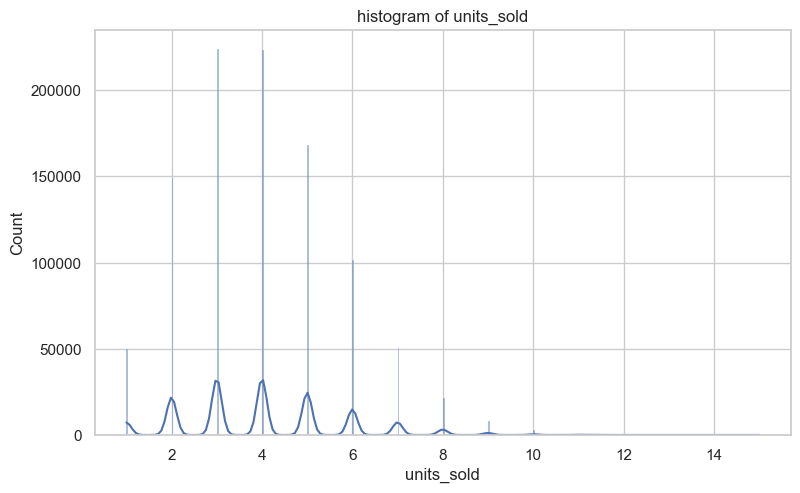

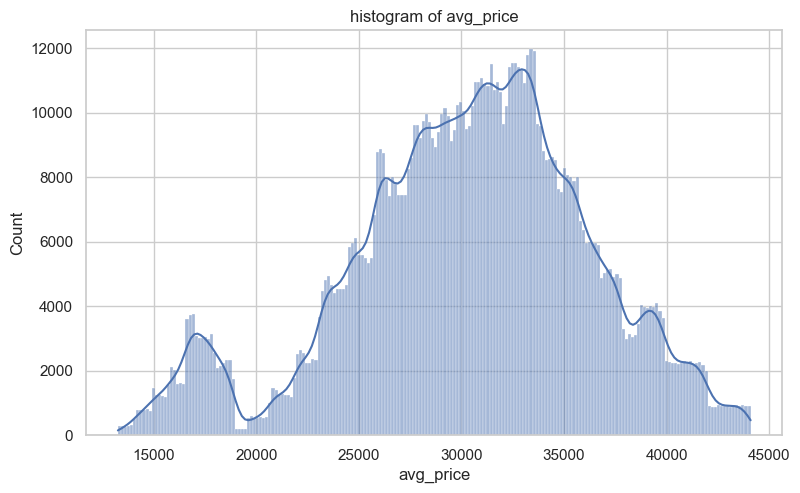

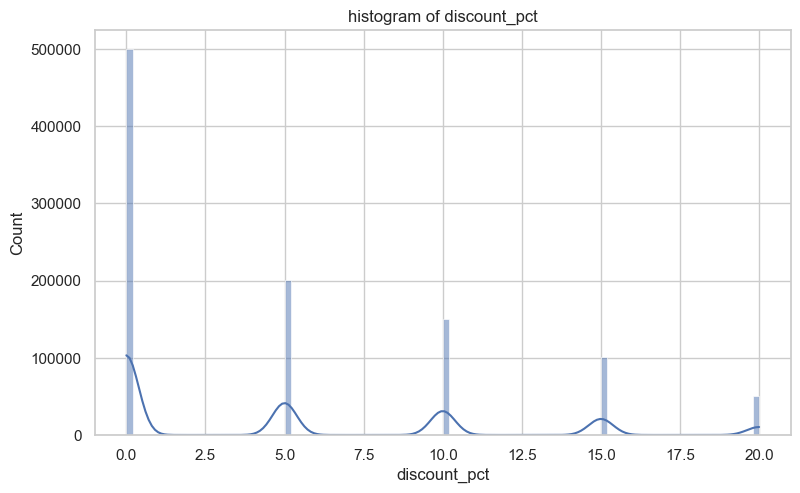

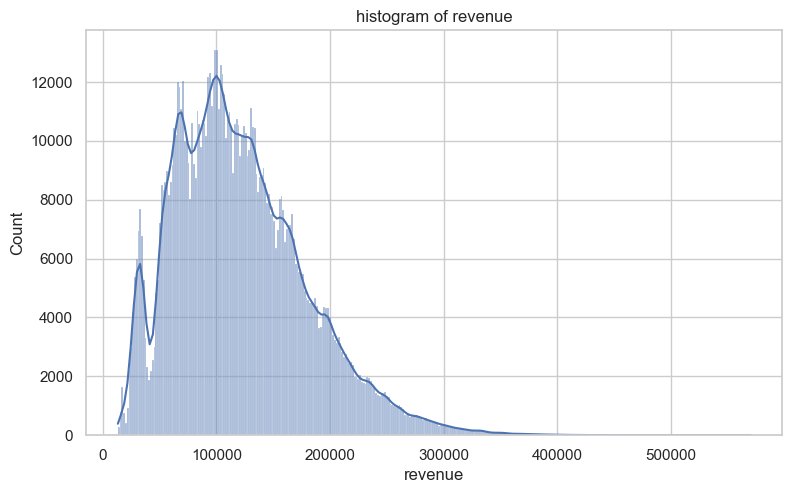

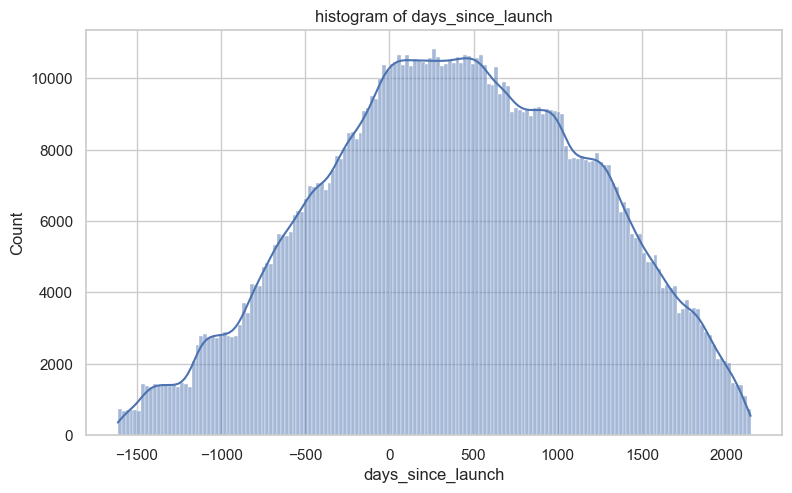

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols_sales:
  plt.figure(figsize=(8, 5))
  sns.histplot(sales_df[col] , kde=True)
  plt.title(f'histogram of {col}')
  plt.show()

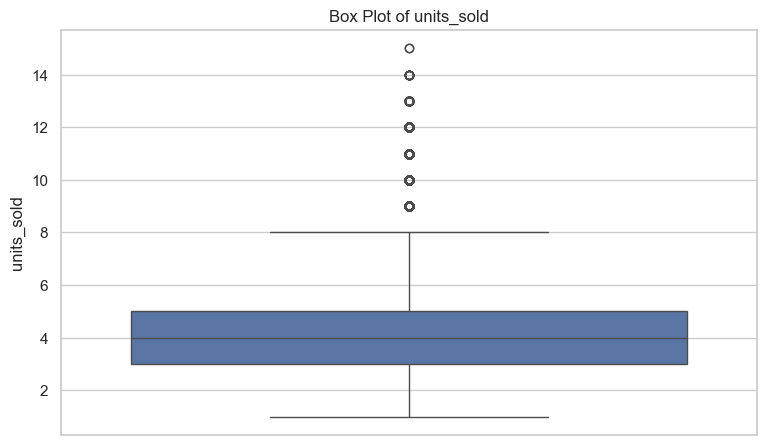

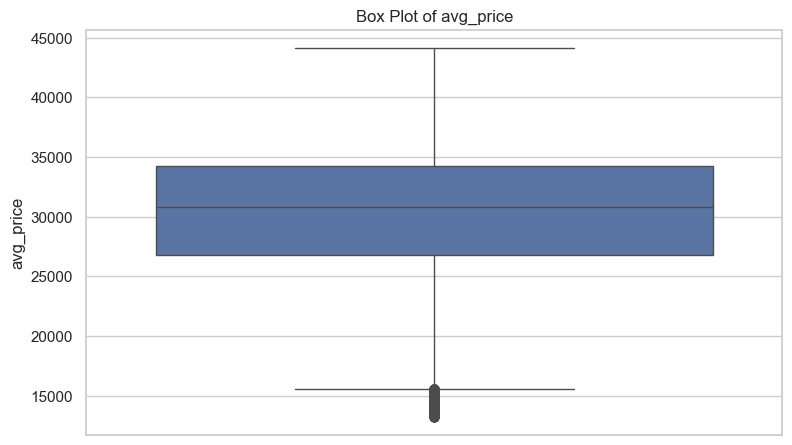

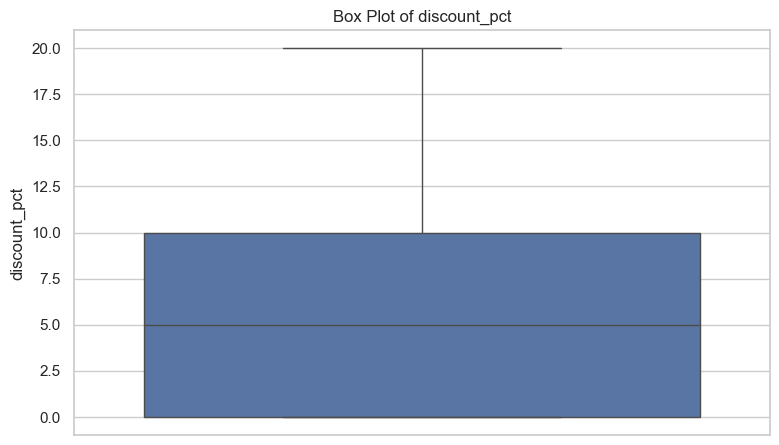

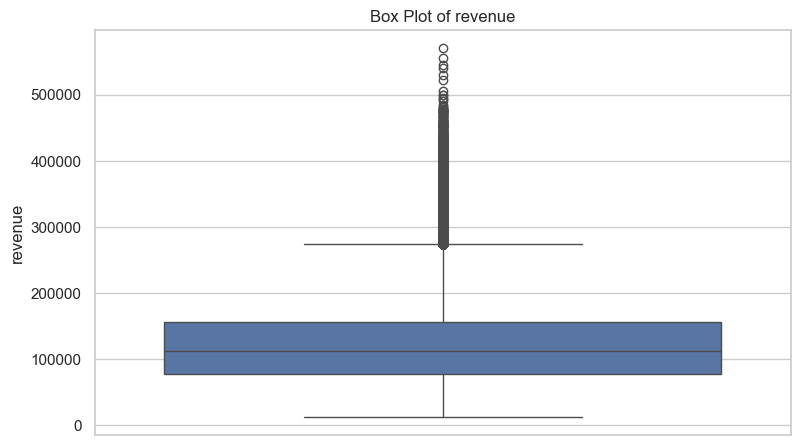

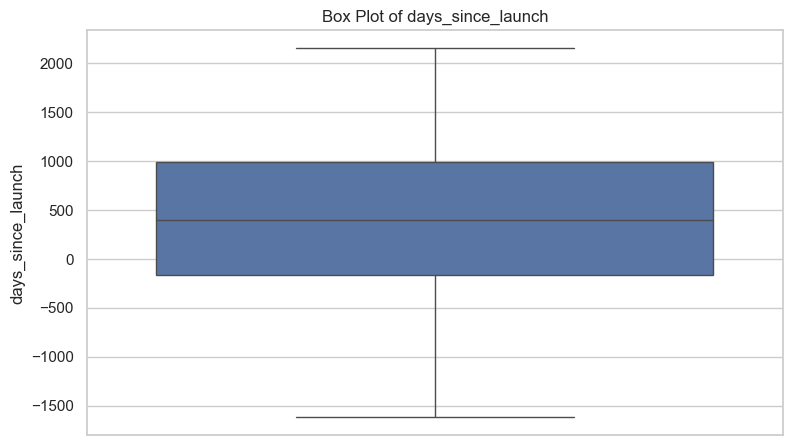

In [ ]:
for col in num_cols_sales:
  plt.figure(figsize=(8, 5))
  sns.boxplot(sales_df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

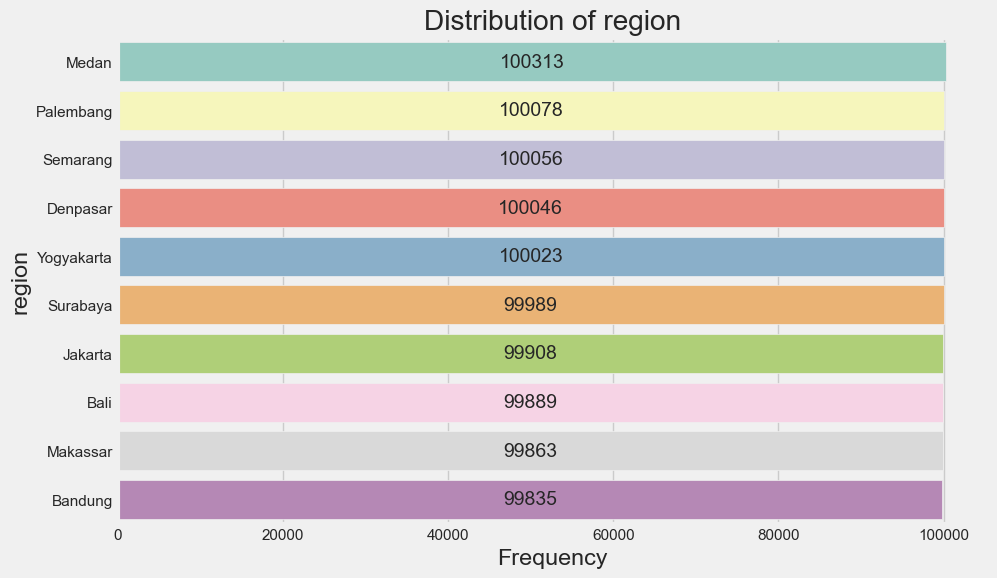

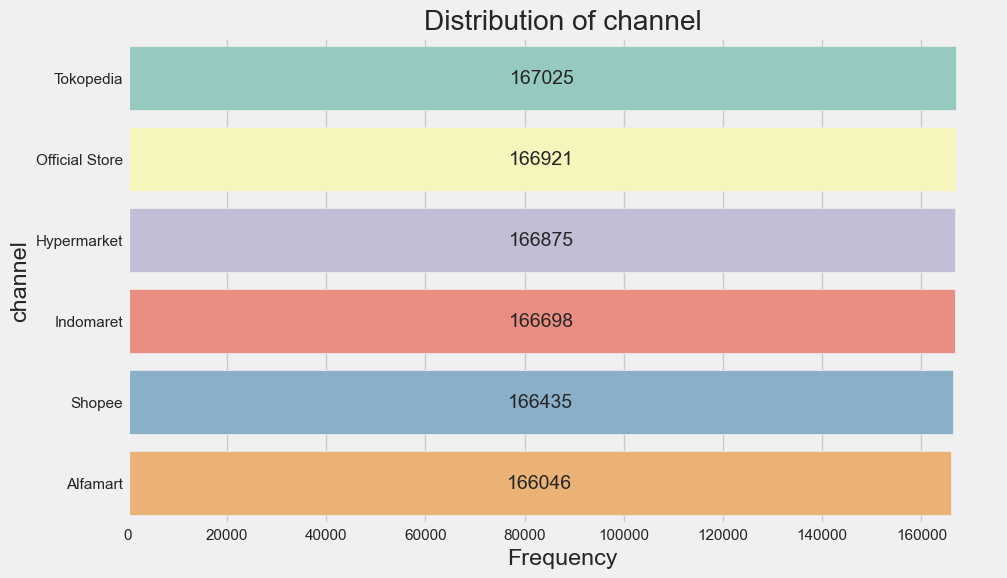

In [ ]:
for col in cat_cols_sales :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = sales_df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

### B. reviews data

In [ ]:
reviews_df.head()

review_id product_id       date       rating sentiment   platform                                       comment
0   R100000      PC014 2024-10-16 4.600000e+00  Positive  Instagram   Packaging bocor saat diterima, kurang aman.
1   R100001      PC012 2023-06-27 2.800000e+00  Negative  Instagram     Mudah dibeli saat promo, value for money.
2   R100002      PC003 2022-10-21 3.200000e+00   Neutral     Shopee     Mudah dibeli saat promo, value for money.
3   R100003      PC010 2025-03-07 2.000000e+00  Negative  Tokopedia     Mudah dibeli saat promo, value for money.
4   R100004      PC015 2022-03-03 1.500000e+00  Negative     Shopee  Memberikan hasil sesuai klaim after 2 weeks.

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   review_id   10000 non-null  object        
 1   product_id  10000 non-null  object        
 2   date        10000 non-null  datetime64[ns]
 3   rating      10000 non-null  float64       
 4   sentiment   10000 non-null  object        
 5   platform    10000 non-null  object        
 6   comment     10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 547.0+ KB


In [ ]:
reviews_df.describe()

date       rating
count                10000 1.000000e+04
mean   2023-01-12 14:31:12 2.989770e+00
min    2020-01-01 00:00:00 1.000000e+00
25%    2021-07-19 00:00:00 2.000000e+00
50%    2023-01-12 00:00:00 3.000000e+00
75%    2024-07-07 00:00:00 4.000000e+00
max    2026-01-08 00:00:00 5.000000e+00
std                    NaN 1.154366e+00

In [ ]:
num_cols_reviews = reviews_df.select_dtypes(include=np.number).columns
cat_cols_reviews = reviews_df[['platform', 'sentiment']]
num_cols_reviews

Index(['rating'], dtype='object')

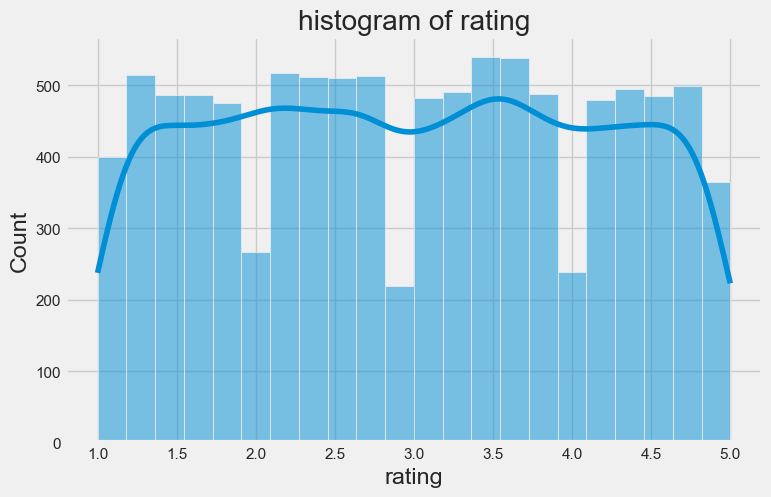

In [ ]:
for col in num_cols_reviews:
  plt.figure(figsize=(8, 5))
  sns.histplot(reviews_df[col] , kde=True)
  plt.title(f'histogram of {col}')
  plt.show()

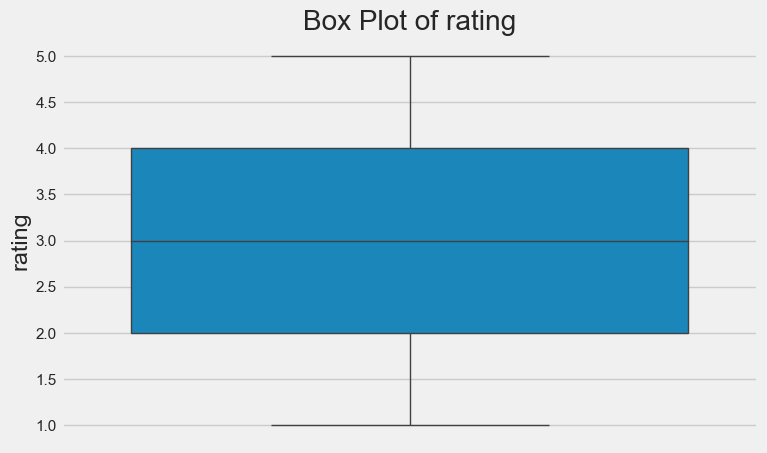

In [ ]:
for col in num_cols_reviews:
  plt.figure(figsize=(8, 5))
  sns.boxplot(reviews_df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

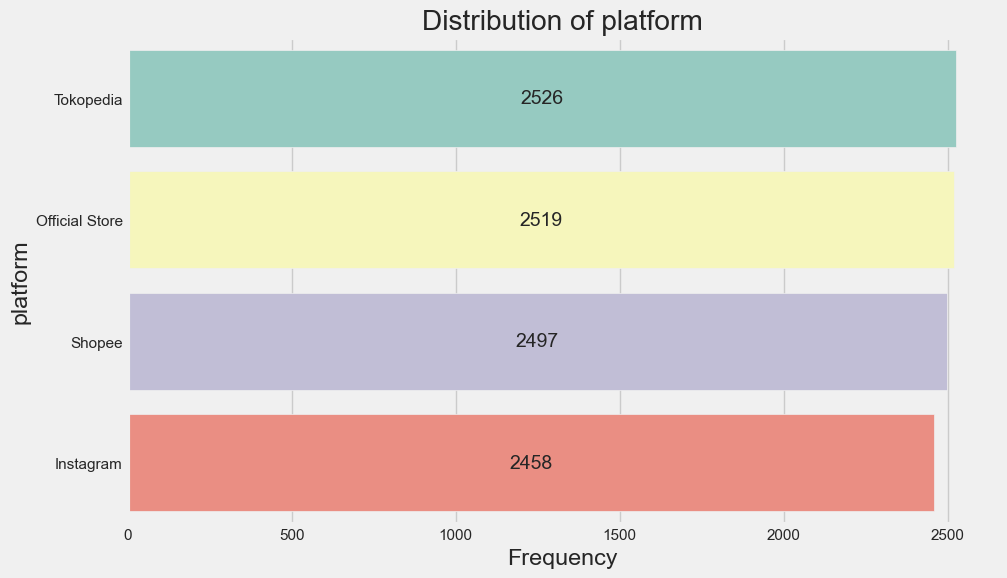

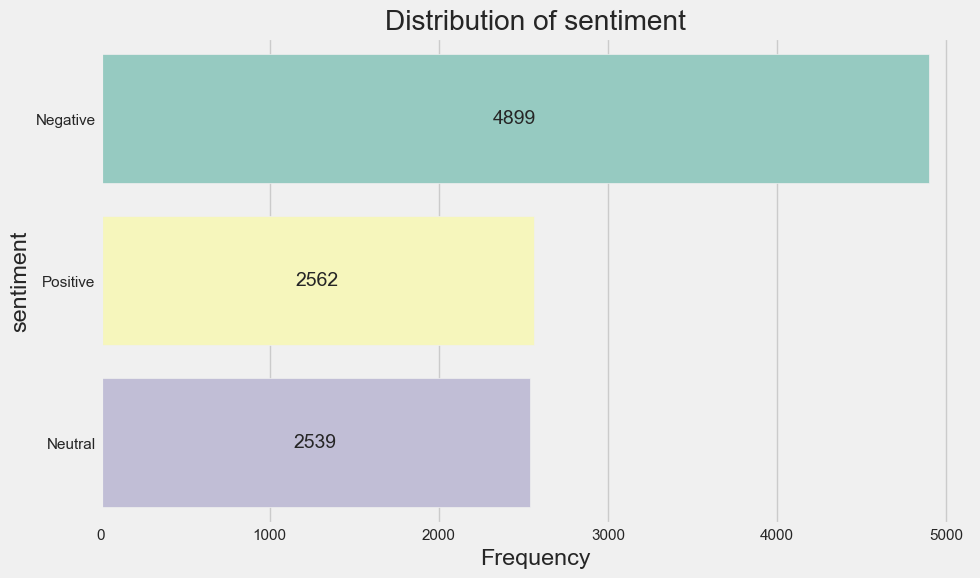

In [ ]:
for col in cat_cols_reviews :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = reviews_df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

### C. Marketing data

In [ ]:
marketing_df = pd.read_csv("C:/Users/user/Downloads/fmcg_personalcare/fmcg_personalcare/marketing.csv")
marketing_df

campaign_id product_id      campaign_name  start_date    end_date   spend_idr     channel  engagement_rate
0       MKT001      PC010   Campaign_1_PC010  2020-10-12  2020-12-14   256411579          TV     5.660000e-01
1       MKT002      PC008   Campaign_2_PC008  2020-06-30  2020-08-29   582461991          TV     3.760000e-01
2       MKT003      PC006   Campaign_3_PC006  2021-09-01  2021-09-22   884233026          TV     1.170000e-01
3       MKT004      PC015   Campaign_4_PC015  2025-04-23  2025-07-04  1139498941  Influencer     5.600000e-01
4       MKT005      PC003   Campaign_5_PC003  2021-07-15  2021-09-08   340924224   Billboard     9.100000e-02
5       MKT006      PC004   Campaign_6_PC004  2021-12-17  2022-01-08  1063103425          TV     2.320000e-01
6       MKT007      PC004   Campaign_7_PC004  2024-08-24  2024-10-31   435984919  Influencer     3.220000e-01
7       MKT008      PC002   Campaign_8_PC002  2022-12-15  2023-01-13  1142853570     YouTube     4.320000e-01
8       MKT009      PC011   Campaign_9_PC011  2024-12-18  2025-01-21   847690120   Instagram     5.000000e-01
9       MKT010      PC012  Campaign_10_PC012  2021-10-08  2021-11-30   903018958   Instagram     8.600000e-02
10      MKT011      PC014  Campaign_11_PC014  2022-04-02  2022-04-18   545071248   Instagram     1.820000e-01
11      MKT012      PC014  Campaign_12_PC014  2022-07-29  2022-10-25   598824442   Instagram     1.330000e-01
12      MKT013      PC001  Campaign_13_PC001  2025-02-24  2025-04-09   717751350   Instagram     4.220000e-01
13      MKT014      PC011  Campaign_14_PC011  2025-06-15  2025-09-10   758293453     YouTube     1.540000e-01
14      MKT015      PC015  Campaign_15_PC015  2023-04-27  2023-05-11   301471542     YouTube     5.860000e-01
15      MKT016      PC010  Campaign_16_PC010  2024-02-01  2024-04-04  1049223410   Instagram     2.190000e-01
16      MKT017      PC004  Campaign_17_PC004  2022-10-02  2022-11-28   692517693   Billboard     1.770000e-01
17      MKT018      PC002  Campaign_18_PC002  2023-01-10  2023-03-08  1180331583          TV     2.120000e-01
18      MKT019      PC013  Campaign_19_PC013  2021-12-18  2022-01-20   495290588      TikTok     4.570000e-01
19      MKT020      PC014  Campaign_20_PC014  2022-10-19  2022-12-10   998295178   Instagram     8.900000e-02

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 non-null     object 
 2   campaign_name    20 non-null     object 
 3   start_date       20 non-null     object 
 4   end_date         20 non-null     object 
 5   spend_idr        20 non-null     int64  
 6   channel          20 non-null     object 
 7   engagement_rate  20 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ KB


In [ ]:
marketing_df.sort_values(by='engagement_rate', ascending=False)
    

campaign_id product_id      campaign_name  start_date    end_date   spend_idr     channel  engagement_rate
14      MKT015      PC015  Campaign_15_PC015  2023-04-27  2023-05-11   301471542     YouTube     5.860000e-01
0       MKT001      PC010   Campaign_1_PC010  2020-10-12  2020-12-14   256411579          TV     5.660000e-01
3       MKT004      PC015   Campaign_4_PC015  2025-04-23  2025-07-04  1139498941  Influencer     5.600000e-01
8       MKT009      PC011   Campaign_9_PC011  2024-12-18  2025-01-21   847690120   Instagram     5.000000e-01
18      MKT019      PC013  Campaign_19_PC013  2021-12-18  2022-01-20   495290588      TikTok     4.570000e-01
7       MKT008      PC002   Campaign_8_PC002  2022-12-15  2023-01-13  1142853570     YouTube     4.320000e-01
12      MKT013      PC001  Campaign_13_PC001  2025-02-24  2025-04-09   717751350   Instagram     4.220000e-01
1       MKT002      PC008   Campaign_2_PC008  2020-06-30  2020-08-29   582461991          TV     3.760000e-01
6       MKT007      PC004   Campaign_7_PC004  2024-08-24  2024-10-31   435984919  Influencer     3.220000e-01
5       MKT006      PC004   Campaign_6_PC004  2021-12-17  2022-01-08  1063103425          TV     2.320000e-01
15      MKT016      PC010  Campaign_16_PC010  2024-02-01  2024-04-04  1049223410   Instagram     2.190000e-01
17      MKT018      PC002  Campaign_18_PC002  2023-01-10  2023-03-08  1180331583          TV     2.120000e-01
10      MKT011      PC014  Campaign_11_PC014  2022-04-02  2022-04-18   545071248   Instagram     1.820000e-01
16      MKT017      PC004  Campaign_17_PC004  2022-10-02  2022-11-28   692517693   Billboard     1.770000e-01
13      MKT014      PC011  Campaign_14_PC011  2025-06-15  2025-09-10   758293453     YouTube     1.540000e-01
11      MKT012      PC014  Campaign_12_PC014  2022-07-29  2022-10-25   598824442   Instagram     1.330000e-01
2       MKT003      PC006   Campaign_3_PC006  2021-09-01  2021-09-22   884233026          TV     1.170000e-01
4       MKT005      PC003   Campaign_5_PC003  2021-07-15  2021-09-08   340924224   Billboard     9.100000e-02
19      MKT020      PC014  Campaign_20_PC014  2022-10-19  2022-12-10   998295178   Instagram     8.900000e-02
9       MKT010      PC012  Campaign_10_PC012  2021-10-08  2021-11-30   903018958   Instagram     8.600000e-02

In [ ]:
num_cols_marketing = marketing_df.select_dtypes(include=np.number).columns
cat_cols_marketing = marketing_df[['channel']]
num_cols_marketing

Index(['spend_idr', 'engagement_rate'], dtype='object')

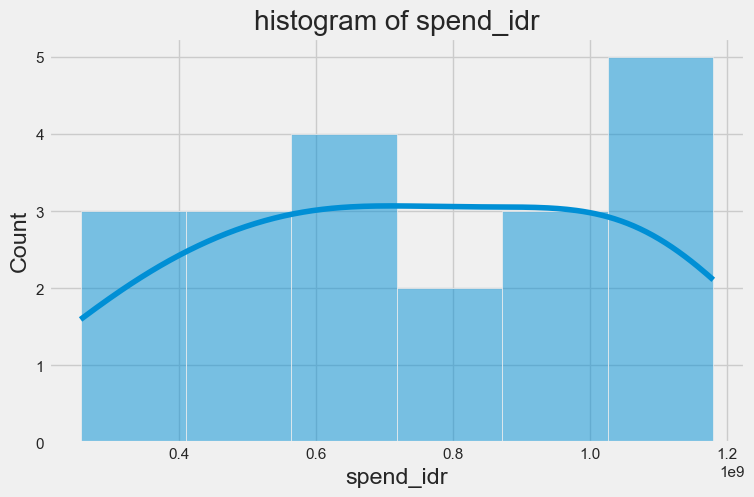

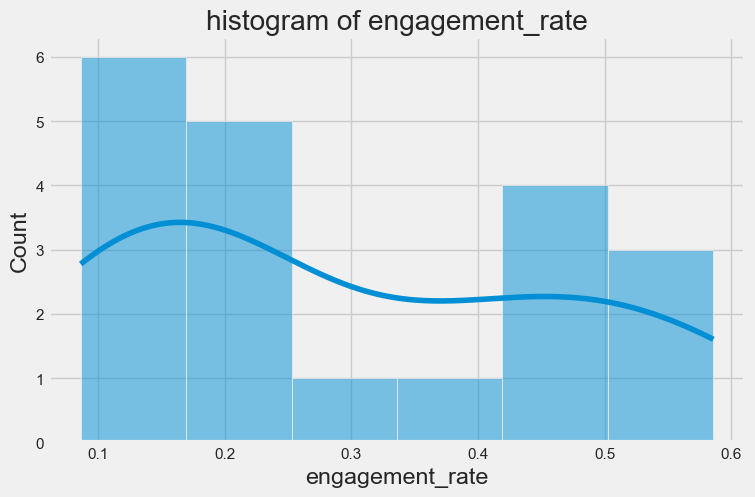

In [ ]:
for col in num_cols_marketing:
  plt.figure(figsize=(8, 5))
  sns.histplot(marketing_df[col] , kde=True)
  plt.title(f'histogram of {col}')
  plt.show()

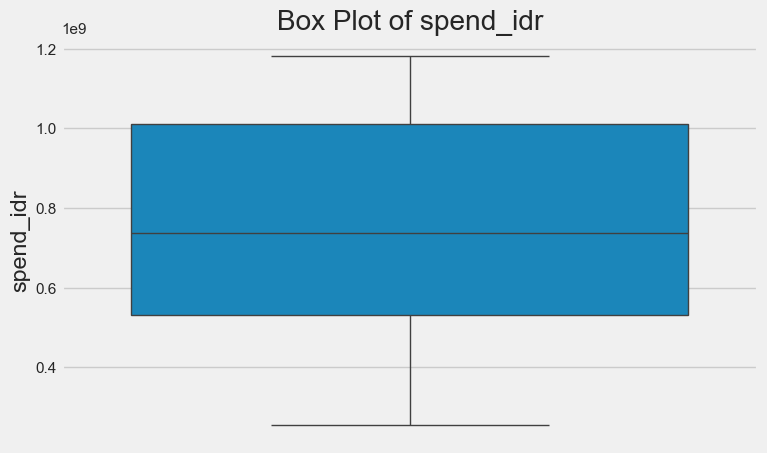

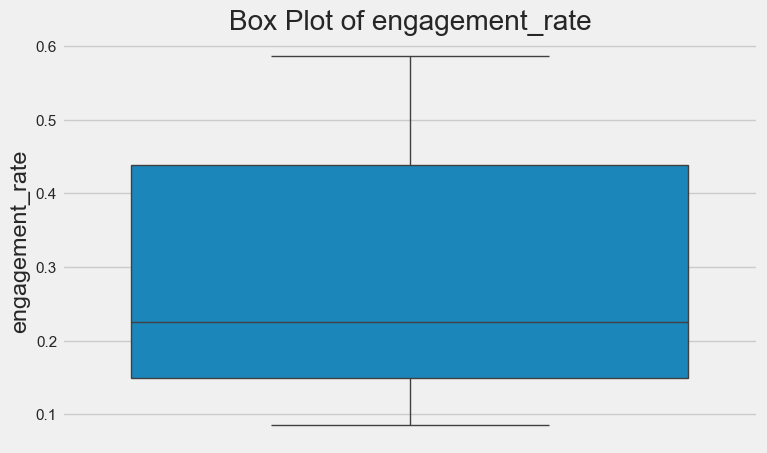

In [ ]:
for col in num_cols_marketing:
  plt.figure(figsize=(8, 5))
  sns.boxplot(marketing_df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

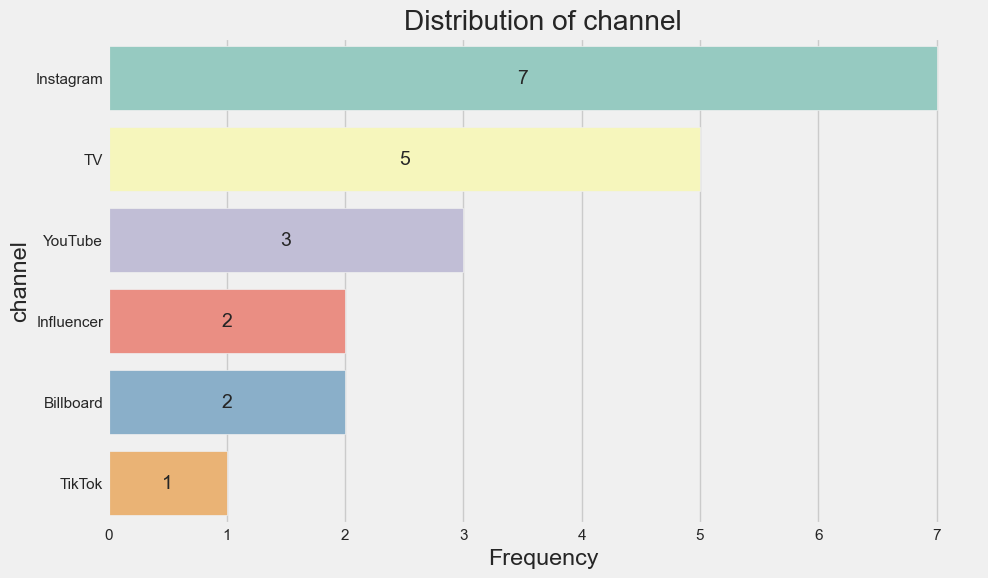

In [ ]:
for col in cat_cols_marketing :
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10,6))
    count_prim = marketing_df[col].value_counts()
    ax = sns.barplot(y=count_prim.index, x=count_prim.values, palette="Set3")
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Frequency')

    for p in ax.patches:
      width = p.get_width()
      ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center")

## Cleaning the data

### B. reviews data

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200) 

POSITIVE_KEYWORDS = [
    'suka', 'harum', 'tahan lama', 'lembut', 'cocok', 'puas', 'terbaik',
    'value for money', 'value', 'sesuai', 'kualitas oke', 'ramah', 'mudah'
]

NEGATIVE_KEYWORDS = [
    'bocor', 'kering', 'kurang cocok', 'kecewa', 'tidak', 'wangi terlalu kuat',
    'terlalu kuat', 'mahal', 'susah', 'gatal', 'iritasi', 'lengket', 'agak kering'
]

def score_sentiment_by_keyword(comment):
    if not isinstance(comment, str):
        return 'Neutral' 
    
    comment_lower = comment.lower() 
    
    pos_score = 0
    neg_score = 0
    
    for word in POSITIVE_KEYWORDS:
        if word in comment_lower:
            pos_score += 1
            
    for word in NEGATIVE_KEYWORDS:
        if word in comment_lower:
            neg_score += 1
            
    if pos_score > neg_score:
        return 'Positive'
    elif neg_score > pos_score:
        return 'Negative'
    else:
        return 'Neutral' 

try:
    reviews_df['new_sentiment'] = reviews_df['comment'].apply(score_sentiment_by_keyword)
    print("\nOld Sentiment vs. New Sentiment (Sample)")
    
    problem_ids = ['R100000', 'R100001', 'R100004', 'R109985', 'R109984', 'R100010']
    problem_df = reviews_df[reviews_df['review_id'].isin(problem_ids)]
    
    comparison_cols = ['review_id', 'comment', 'rating', 'sentiment', 'new_sentiment']
    print(problem_df[comparison_cols].to_markdown(index=False, numalign="left", stralign="left"))
    
    print("\nSummary of New Sentiment")
    print(reviews_df['new_sentiment'].value_counts())

except FileNotFoundError:
    print("Error: reviews.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Old Sentiment vs. New Sentiment (Sample)
| review_id   | comment                                      | rating   | sentiment   | new_sentiment   |
|:------------|:---------------------------------------------|:---------|:------------|:----------------|
| R100000     | Packaging bocor saat diterima, kurang aman.  | 4.6      | Positive    | Negative        |
| R100001     | Mudah dibeli saat promo, value for money.    | 2.8      | Negative    | Positive        |
| R100004     | Memberikan hasil sesuai klaim after 2 weeks. | 1.5      | Negative    | Positive        |
| R100010     | Harumnya tahan lama, suka banget!            | 3.8      | Neutral     | Positive        |
| R109984     | Harumnya tahan lama, suka banget!            | 4        | Positive    | Positive        |
| R109985     | Mudah dibeli saat promo, value for money.    | 1.2      | Negative    | Positive        |

Summary of New Sentiment
new_sentiment
Positive    6227
Negative    3773
Name: count, dtype: int64


## 1. Innovation Radar

### A. Merging data and calculating revenue growth YoY (2024-2025)

In [ ]:
sales_with_products_df = sales_df.merge(products_df, on='product_id')
sales_with_products_df.set_index('date', inplace=True)

monthly_sales = sales_with_products_df.groupby('product_id').resample('M')['revenue'].sum().reset_index()
monthly_sales['year'] = monthly_sales['date'].dt.year

yearly_sales = monthly_sales[monthly_sales['year'].isin([2024, 2025])]
yearly_sales_pivot = yearly_sales.pivot_table(
index='product_id',
columns='year',
values='revenue',
aggfunc='sum'
).fillna(0)

yearly_sales_pivot.columns = ['revenue_2024', 'revenue_2025']
yearly_sales_pivot['yoy_growth_pct'] = (
(yearly_sales_pivot['revenue_2025'] - yearly_sales_pivot['revenue_2024']) /
(yearly_sales_pivot['revenue_2024'] + 1)
) * 100

growth_df = yearly_sales_pivot.reset_index()
growth_df_sorted = growth_df.sort_values(by='yoy_growth_pct', ascending=False)
growth_df_sorted = growth_df_sorted.reset_index(drop=True)

print("\nYoY Growth Revenue (2024 vs 2025)")
print(growth_df_sorted.to_markdown(index=True, numalign="left", stralign="left"))


YoY Growth Revenue (2024 vs 2025)
|    | product_id   | revenue_2024   | revenue_2025   | yoy_growth_pct   |
|:---|:-------------|:---------------|:---------------|:-----------------|
| 0  | PC011        | 1.42812e+09    | 1.49245e+09    | 4.5048           |
| 1  | PC014        | 1.57129e+09    | 1.59668e+09    | 1.61631          |
| 2  | PC007        | 1.66182e+09    | 1.68384e+09    | 1.32486          |
| 3  | PC001        | 1.32751e+09    | 1.34352e+09    | 1.20648          |
| 4  | PC002        | 1.36897e+09    | 1.38241e+09    | 0.981876         |
| 5  | PC003        | 1.16574e+09    | 1.1719e+09     | 0.528655         |
| 6  | PC013        | 1.33238e+09    | 1.33864e+09    | 0.470116         |
| 7  | PC004        | 1.05137e+09    | 1.05111e+09    | -0.0249747       |
| 8  | PC006        | 1.50803e+09    | 1.50683e+09    | -0.0798103       |
| 9  | PC012        | 1.24998e+09    | 1.24775e+09    | -0.178397        |
| 10 | PC005        | 1.45508e+09    | 1.44205e+09    | -0.895311

### B. Analyze Customer Attraction (rating and sentiment)

In [ ]:
try:
    grouped_reviews = reviews_df.groupby('product_id')
    avg_rating = grouped_reviews['rating'].mean()
    total_reviews = grouped_reviews.size()
    
    positive_reviews = reviews_df[reviews_df['new_sentiment'] == 'Positive'].groupby('product_id').size()
    positive_sentiment_pct = (positive_reviews / total_reviews * 100).fillna(0)

    sentiment_df = pd.DataFrame({
        'avg_rating': avg_rating,
        'positive_sentiment_pct': positive_sentiment_pct
    }).reset_index()

    print("\nSentiment DataFrame (sentiment_df) Head")
    sentiment_df_sorted = sentiment_df.sort_values(by='positive_sentiment_pct', ascending=False).head(15)
    sentiment_df_sorted = sentiment_df_sorted.reset_index(drop=True)
    print(sentiment_df_sorted.to_markdown(index=True, numalign="left", stralign="left"))

except Exception as e:
    print(f"An error occurred: {e}")


Sentiment DataFrame (sentiment_df) Head
|    | product_id   | avg_rating   | positive_sentiment_pct   |
|:---|:-------------|:-------------|:-------------------------|
| 0  | PC001        | 3.03263      | 63.7329                  |
| 1  | PC008        | 2.96119      | 63.7313                  |
| 2  | PC006        | 2.96784      | 63.3041                  |
| 3  | PC014        | 3.03395      | 63.1805                  |
| 4  | PC013        | 3.03367      | 62.8447                  |
| 5  | PC011        | 3.00766      | 62.8389                  |
| 6  | PC005        | 3.00319      | 62.766                   |
| 7  | PC004        | 2.98362      | 62.5585                  |
| 8  | PC007        | 2.937        | 62.4082                  |
| 9  | PC015        | 3.03066      | 62.3358                  |
| 10 | PC012        | 2.96837      | 62.3256                  |
| 11 | PC010        | 2.95322      | 61.8421                  |
| 12 | PC002        | 2.90776      | 60.7463                  |

### C. Making the average engagement per idr

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.10e}'.format) 

try:
    marketing_df['engagement_per_idr'] = (
        marketing_df['engagement_rate'] / (marketing_df['spend_idr'] + 1)
    )

    hype_df = marketing_df.groupby('product_id')['engagement_per_idr'].mean().reset_index()
    hype_df = hype_df.rename(columns={'engagement_per_idr': 'avg_engagement_per_idr'})

    final_report_df = products_df[['product_id', 'product_name', 'brand']].merge(
        hype_df, on='product_id', how='left'
    )
    
    final_report_df['avg_engagement_per_idr'] = final_report_df['avg_engagement_per_idr'].fillna(0)
    final_report_df = final_report_df.sort_values(by='avg_engagement_per_idr', ascending=False)
    
    print("\nFinal Report: Product 'Attraction' Score (Avg. Engagement per IDR)")
    print(final_report_df.to_markdown(index=False, numalign="left", stralign="left"))

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure marketing.csv and products.csv are available.")
except Exception as e:
    print(f"An error occurred: {e}")


Final Report: Product 'Attraction' Score (Avg. Engagement per IDR)
| product_id   | product_name                                     | brand                | avg_engagement_per_idr   |
|:-------------|:-------------------------------------------------|:---------------------|:-------------------------|
| PC015        | Lifebuoy Hand Sanitizer Gel 50ml                 | Lifebuoy             | 1.21762e-09              |
| PC010        | Love Beauty & Planet Coconut Water Shampoo 400ml | Love Beauty & Planet | 1.20806e-09              |
| PC013        | Sunsilk Anti Hairfall Shampoo 340ml              | Sunsilk              | 9.22691e-10              |
| PC008        | Rexona Women Shower Clean Roll-on 50ml           | Rexona               | 6.45536e-10              |
| PC001        | Sunsilk Smooth & Shine Shampoo 340ml             | Sunsilk              | 5.87947e-10              |
| PC004        | Lifebuoy Mild Care Handwash 200ml                | Lifebuoy             | 4.04125e-10    

### D. Combining the yoy growth and average engagement per idr into one plot


 Final 2-Metric Innovation Data 
| product_id   | product_name                                     | brand                | revenue_2024   | revenue_2025   | yoy_growth_pct   | avg_engagement_per_idr   |
|:-------------|:-------------------------------------------------|:---------------------|:---------------|:---------------|:-----------------|:-------------------------|
| PC001        | Sunsilk Smooth & Shine Shampoo 340ml             | Sunsilk              | 1.32751e+09    | 1.34352e+09    | 1.20648          | 5.87947e-10              |
| PC002        | Sunsilk Black Shine Conditioner 340ml            | Sunsilk              | 1.36897e+09    | 1.38241e+09    | 0.981876         | 2.78806e-10              |
| PC003        | Lifebuoy Total10 Body Wash 400ml                 | Lifebuoy             | 1.16574e+09    | 1.1719e+09     | 0.528655         | 2.66921e-10              |
| PC004        | Lifebuoy Mild Care Handwash 200ml                | Lifebuoy             | 1.05137e+09    | 1.0

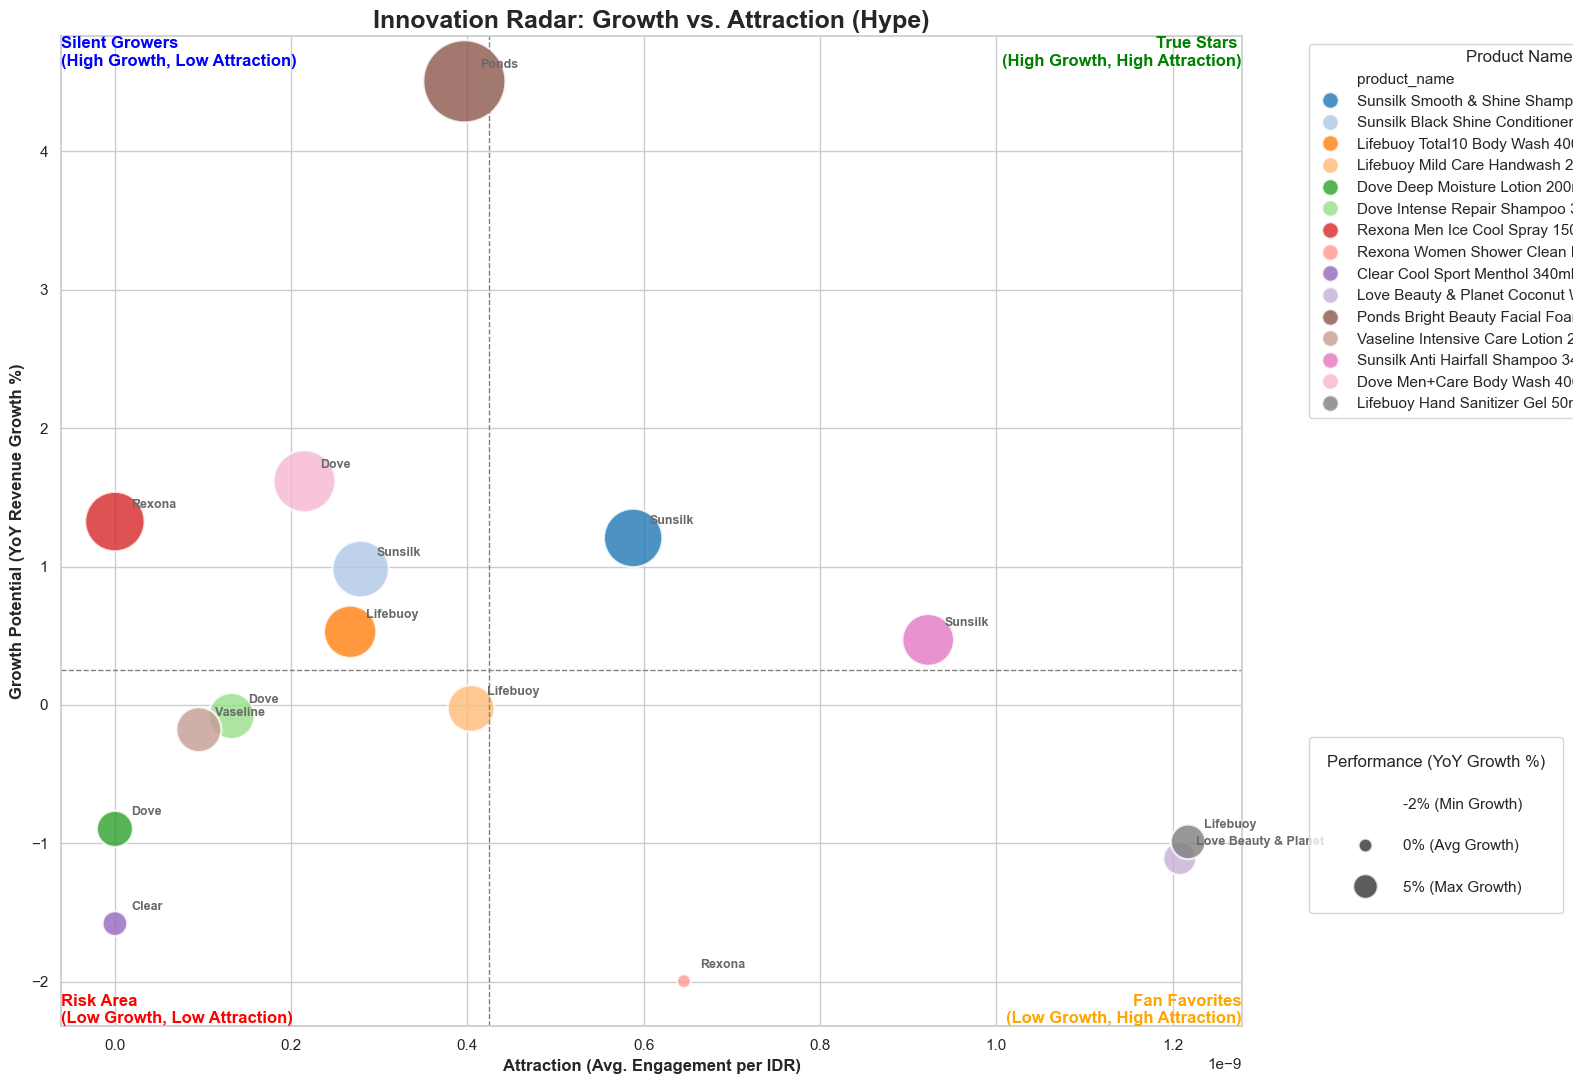

In [ ]:
def normalize_size(value, data, min_size=100, max_size=3500):
    s_min = data.min()
    s_max = data.max()
    if s_max == s_min:
        return min_size
    scaled_val = (value - s_min) / (s_max - s_min)
    return min_size + scaled_val * (max_size - min_size)

try:
    final_radar_df = products_df[['product_id', 'product_name', 'brand']].merge(
        growth_df, on='product_id', how='left'
    ).merge(
        hype_df, on='product_id', how='left'
    )
    
    final_radar_df['yoy_growth_pct'] = final_radar_df['yoy_growth_pct'].fillna(0)
    final_radar_df['avg_engagement_per_idr'] = final_radar_df['avg_engagement_per_idr'].fillna(0)
    
    print("\n Final 2-Metric Innovation Data ")
    pd.set_option('display.float_format', '{:.6e}'.format)
    print(final_radar_df.to_markdown(index=False, numalign="left", stralign="left"))
    
    plt.figure(figsize=(16, 11))
    sns.set_theme(style="whitegrid")

    plot = sns.scatterplot(
        data=final_radar_df,
        x='avg_engagement_per_idr',
        y='yoy_growth_pct',         
        size='yoy_growth_pct',      
        sizes=(100, 3500),
        hue='product_name',         
        palette='tab20',            
        alpha=0.8,
        legend='full'               
    )
    
    x_range = final_radar_df['avg_engagement_per_idr'].max() - final_radar_df['avg_engagement_per_idr'].min()
    y_range = final_radar_df['yoy_growth_pct'].max() - final_radar_df['yoy_growth_pct'].min()

    for index, row in final_radar_df.iterrows():
        x_offset = x_range * 0.015 
        y_offset = y_range * 0.015 
        
        plt.text(
            row['avg_engagement_per_idr'] + x_offset,
            row['yoy_growth_pct'] + y_offset,
            row['brand'],  
            fontdict={'size': 9, 'weight': 'bold', 'color': 'dimgray'} 
        )
        
    avg_hype = final_radar_df['avg_engagement_per_idr'].mean()
    avg_growth = final_radar_df['yoy_growth_pct'].mean()
    
    plt.axhline(avg_growth, color='grey', linestyle='--', linewidth=1.0)
    plt.axvline(avg_hype, color='grey', linestyle='--', linewidth=1.0)
    
    plt.title('Innovation Radar: Growth vs. Attraction (Hype)', fontsize=18, weight='bold')
    plt.xlabel('Attraction (Avg. Engagement per IDR)', fontsize=12, weight='bold')
    plt.ylabel('Growth Potential (YoY Revenue Growth %)', fontsize=12, weight='bold')
    
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    plt.text(x_max, y_max, 'True Stars \n(High Growth, High Attraction)', horizontalalignment='right', verticalalignment='top', color='green', weight='bold')
    plt.text(x_min, y_max, 'Silent Growers\n(High Growth, Low Attraction)', horizontalalignment='left', verticalalignment='top', color='blue', weight='bold')
    plt.text(x_min, y_min, 'Risk Area\n(Low Growth, Low Attraction)', horizontalalignment='left', verticalalignment='bottom', color='red', weight='bold')
    plt.text(x_max, y_min, 'Fan Favorites\n(Low Growth, High Attraction)', horizontalalignment='right', verticalalignment='bottom', color='orange', weight='bold')
    
    handles, labels = plot.get_legend_handles_labels()

    product_legend_handles = []
    product_legend_labels = []
    
    first_size_label_index = next((i for i, label in enumerate(labels) if 'yoy_growth_pct' in label), len(labels))

    product_legend_handles = handles[0:first_size_label_index]
    product_legend_labels = labels[0:first_size_label_index]

    product_legend = plt.legend(
        product_legend_handles,
        product_legend_labels,
        title='Product Name', 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left',
        markerscale=2.0 
    )
    plt.gca().add_artist(product_legend)

    size_legend_handles = handles[first_size_label_index:]
    size_legend_labels = labels[first_size_label_index:]
    
    min_val = final_radar_df['yoy_growth_pct'].min()
    max_val = final_radar_df['yoy_growth_pct'].max()
    avg_val = final_radar_df['yoy_growth_pct'].mean()
    
    custom_size_labels = [
        f'{min_val:.0f}% (Min Growth)',
        f'{avg_val:.0f}% (Avg Growth)',
        f'{max_val:.0f}% (Max Growth)'
    ]

    size_legend = plt.legend(
        size_legend_handles,
        custom_size_labels,
        title='Performance (YoY Growth %)',
        bbox_to_anchor=(1.05, 0.3),
        loc='upper left',
        labelspacing=1.8,
        borderpad=1.2,
        handletextpad=1.5
    )
    
    plt.tight_layout()
    
    plot_filename = 'growth_vs_attraction_with_brand_labels.png'
    plt.savefig(plot_filename, bbox_extra_artists=(product_legend, size_legend), bbox_inches='tight')
    
    print(f"\nNew visualization with brand labels saved as '{plot_filename}'")

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all 3 CSV files are available.")
except Exception as e:
    print(f"An error occurred: {e}")

#### **Interpretasi**

#### Kuadran 1: Silent Growers (Pertumbuhan Senyap)  
*(High Growth, Low Attraction)*

Ini adalah produk-produk yang tumbuh sangat cepat (penjualan bagus), tetapi tidak menghasilkan banyak "hype" atau engagement online. **Efisiensi engagement per IDR rendah**, namun produk ini tetap laku keras.

- **Ponds (Bright Beauty Facial Foam)**  
  Ini adalah *bintang tersembunyi* Anda. Produk ini memiliki pertumbuhan tertinggi di seluruh portofolio (di atas 4%), ditandai dengan posisi dan ukuran gelembungnya yang paling besar. Namun, nilai *Attraction*-nya berada di bawah rata-rata.

- **Dove (Intense Repair Shampoo)**  
  Menunjukkan pertumbuhan kuat (sekitar 2.2%), tetapi *Attraction*-nya rendah.

- **Rexona (Men Ice Cool Spray)**  
  Pertumbuhan solid (sekitar 1.5%), tetapi *Attraction*-nya paling rendah dari semua produk di kuadran ini.

- **Sunsilk (Black Shine Conditioner)** & **Lifebuoy (Mild Care Handwash)**  
  Keduanya merupakan *Silent Growers* yang solid, dengan pertumbuhan di atas rata-rata dan *Attraction* di bawah rata-rata.

**Implikasi Strategis:**  
Ini adalah **peluang besar**. Produknya sudah terbukti laku. Pertanyaannya: *Apa yang akan terjadi jika Anda bisa meningkatkan “hype”-nya?*  
Investasi dalam strategi **brand awareness** atau **engagement** untuk produk-produk ini berpotensi memindahkan mereka ke kuadran **True Stars** dan menghasilkan pertumbuhan yang lebih eksplosif.


#### Kuadran 2: True Stars (Bintang Sejati)  
*(High Growth, High Attraction)*

Produk di kuadran ini adalah yang **terbaik dari yang terbaik**. Mereka tumbuh cepat **dan** sangat efisien dalam menghasilkan "hype".

- **Sunsilk (Smooth & Shine Shampoo)**  
  Ini adalah satu-satunya produk yang dengan jelas berada di kuadran **True Star**. Produk ini memiliki pertumbuhan di atas rata-rata (sekitar 0.5%–1%) dan tingkat *Attraction* yang sangat tinggi (efisien).

**Implikasi Strategis:**  
Ini adalah **pemenang utama**. Strateginya adalah:
- melindungi,
- berinvestasi lebih jauh,
- dan memperkuat posisi produk ini.  

Pastikan produk ini mendapatkan sumber daya yang cukup untuk terus mendominasi.


#### Kuadran 3: Fan Favorites (Favorit Penggemar)  
*(Low Growth, High Attraction)*

Orang-orang suka **membicarakan** produk di kuadran ini (engagement tinggi dan efisien), tetapi hal tersebut **tidak (atau belum) terkonversi menjadi pertumbuhan penjualan**.

- **Lifebuoy & Love Beauty & Planet (Hand Sanitizer & Coconut Water Shampoo)**  
  Ini adalah kasus yang paling menarik. Keduanya memiliki *Attraction* tertinggi di seluruh portofolio, namun pertumbuhan penjualannya **negatif** (sekitar -1%).

- **Rexona (Women Shower Clean Roll-on)**  
  Memiliki *Attraction* di atas rata-rata, tetapi pertumbuhan penjualannya negatif dan merupakan yang terendah (sekitar -1.8%).

**Implikasi Strategis:**  
Ini adalah **teka-teki pemasaran**. Anda memiliki **brand equity** dan **engagement** yang kuat, tetapi penjualan justru turun.  
Pertanyaan kuncinya:
- Apakah ini masalah **harga**?
- **Distribusi** / ketersediaan di rak?
- Ada **pesaing baru** yang mengambil alih permintaan?  

Anda perlu segera mencari cara untuk **memonetisasi “hype” ini** sebelum para penggemar beralih ke produk lain.


#### Kuadran 4: Risk Area (Area Berisiko)  
*(Low Growth, Low Attraction)*

Ini adalah produk yang paling **rentan**. Penjualannya stagnan atau menurun, dan produk ini juga tidak menghasilkan "hype" (engagement rendah dan tidak efisien).

- **Dove (Deep Moisture Lotion)** & **Vaseline (Intensive Care Lotion)**  
  Keduanya berada di sekitar 0% pertumbuhan dengan *Attraction* yang rendah. Kondisinya **stagnan**.

- **Dove (Men+Care Body Wash)**  
  Pertumbuhannya sedikit negatif dengan *Attraction* yang sangat rendah.

- **Clear (Cool Sport Menthol)**  
  Menunjukkan pertumbuhan negatif (sekitar -1.2%) dan *Attraction* yang sangat rendah.

**Implikasi Strategis:**  
Produk-produk di area ini berpotensi **“menguras” sumber daya**. Anda perlu mengambil keputusan sulit:

- Apakah produk ini perlu di-**relaunch** / diformulasi ulang?
- Apakah perlu diberi **strategi pemasaran baru** untuk meningkatkan *Attraction*?
- Atau justru sudah waktunya untuk **menghentikan produksi (divestasi)** dan mengalihkan fokus ke **Silent Growers** atau **True Stars** yang lebih menjanjikan?
---

In [ ]:
target_product_ids = ['PC001', 'PC013', 'PC011']

try:
    target_campaigns = marketing_df[marketing_df['product_id'].isin(target_product_ids)].copy()

    if target_campaigns.empty:
        print("\n=======================================================")
        print(">>> ANALYSIS COMPLETE: Hypothesis B (Non-Existent)")
        print("=======================================================")
        print("No marketing campaigns were found for these 3 products in marketing.csv.")
        print("This confirms their 'avg_engagement_per_idr' score is 0.0 because they are unmarketed 'Silent Growers'.")
        print("Their growth is coming from other factors.")
    
    else:
        print("\n=======================================================")
        print(">>> ANALYSIS COMPLETE: Hypothesis A (Inefficient)")
        print("=======================================================")
        print("Campaigns *were* found for these products.")
        
        target_campaigns = target_campaigns.merge(
            products_df[['product_id', 'product_name']], 
            on='product_id', 
            how='left'
        )
        
        target_campaigns['engagement_per_idr'] = (
            target_campaigns['engagement_rate'] / (target_campaigns['spend_idr'] + 1)
        )
        
        print("\n Campaign Details ")
        cols_to_show = [
            'product_name', 
            'campaign_name', 
            'channel', 
            'spend_idr', 
            'engagement_rate', 
            'engagement_per_idr'
        ]
        
        pd.set_option('display.float_format', '{:.6e}'.format)
        print(target_campaigns[cols_to_show].sort_values(by='engagement_per_idr', ascending=False).to_markdown(index=False))
        
        print("\n Summary ")
        total_spend = target_campaigns['spend_idr'].sum()
        num_campaigns = len(target_campaigns)
        avg_engagement = target_campaigns['engagement_rate'].mean()
        avg_efficiency = target_campaigns['engagement_per_idr'].mean()

        pd.set_option('display.float_format', '{:,.0f}'.format) 
        print(f"Total Campaigns Found: {num_campaigns}")
        print(f"Total Spend (IDR): {total_spend:,.0f}")
        
        pd.set_option('display.float_format', '{:.2%}'.format) 
        print(f"Average Engagement Rate: {avg_engagement}")
        
        pd.set_option('display.float_format', '{:.6e}'.format) 
        print(f"Average Efficiency (avg_engagement_per_idr): {avg_efficiency}")
        
        print("\n>>> This confirms their low 'Attraction' score is due to these inefficient campaigns.")


except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure marketing.csv and products.csv are available.")
except Exception as e:
    print(f"An error occurred: {e}")


>>> ANALYSIS COMPLETE: Hypothesis A (Inefficient)
Campaigns *were* found for these products.

 Campaign Details 
| product_name                         | campaign_name     | channel   |   spend_idr |   engagement_rate |   engagement_per_idr |
|:-------------------------------------|:------------------|:----------|------------:|------------------:|---------------------:|
| Sunsilk Anti Hairfall Shampoo 340ml  | Campaign_19_PC013 | TikTok    |   495290588 |             0.457 |          9.22691e-10 |
| Ponds Bright Beauty Facial Foam 100g | Campaign_9_PC011  | Instagram |   847690120 |             0.5   |          5.89838e-10 |
| Sunsilk Smooth & Shine Shampoo 340ml | Campaign_13_PC001 | Instagram |   717751350 |             0.422 |          5.87947e-10 |
| Ponds Bright Beauty Facial Foam 100g | Campaign_14_PC011 | YouTube   |   758293453 |             0.154 |          2.03088e-10 |

 Summary 
Total Campaigns Found: 4
Total Spend (IDR): 2,819,025,511
Average Engagement Rate: 0.38325
Aver

## 2. Trend Forecasting

### ARIMA (Autoregressive Integrated Moving Average)

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                   SARIMAX Results                                   
Dep. Variable:                             y   No. Observations:                   60
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood               -1029.193
Date:                       Sat, 15 Nov 2025   AIC                           2066.387
Time:                               21:22:33   BIC                           2074.764
Sample:                           01-31-2020   HQIC                          2069.663
                                - 12-31-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.283e+08   1.62e+06    141.195      0.000    2.25e+08  

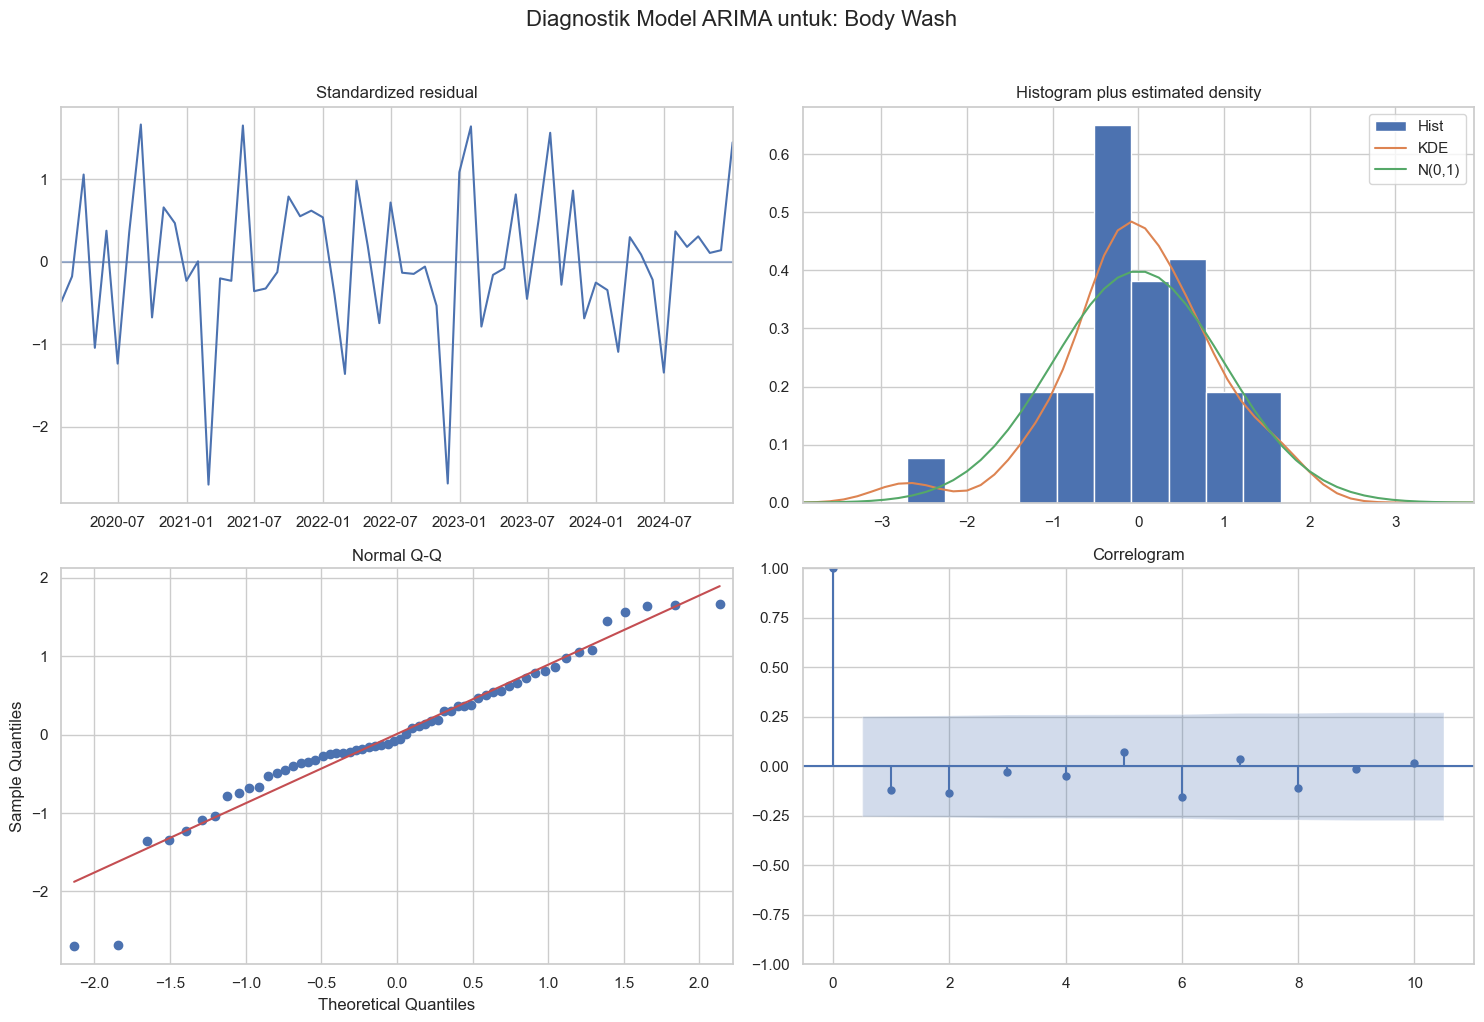


--- Menampilkan Plot Prediksi vs Aktual untuk Body Wash ---


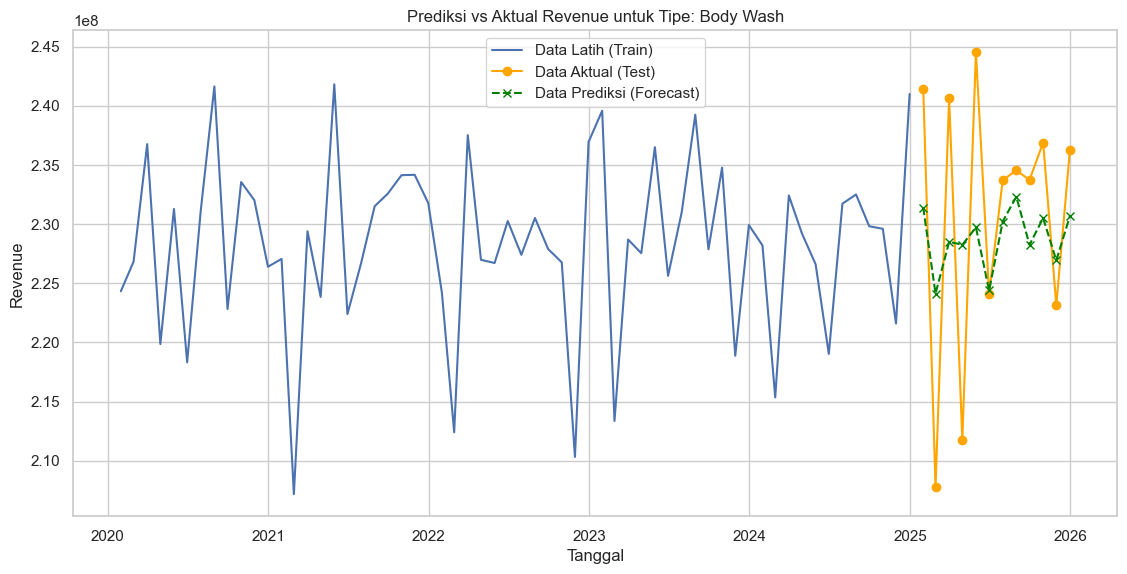

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   60
Model:             SARIMAX(0, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1010.537
Date:                                 Sat, 15 Nov 2025   AIC                           2031.074
Time:                                         21:22:40   BIC                           2041.546
Sample:                                     01-31-2020   HQIC                          2035.170
                                          - 12-31-2024                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

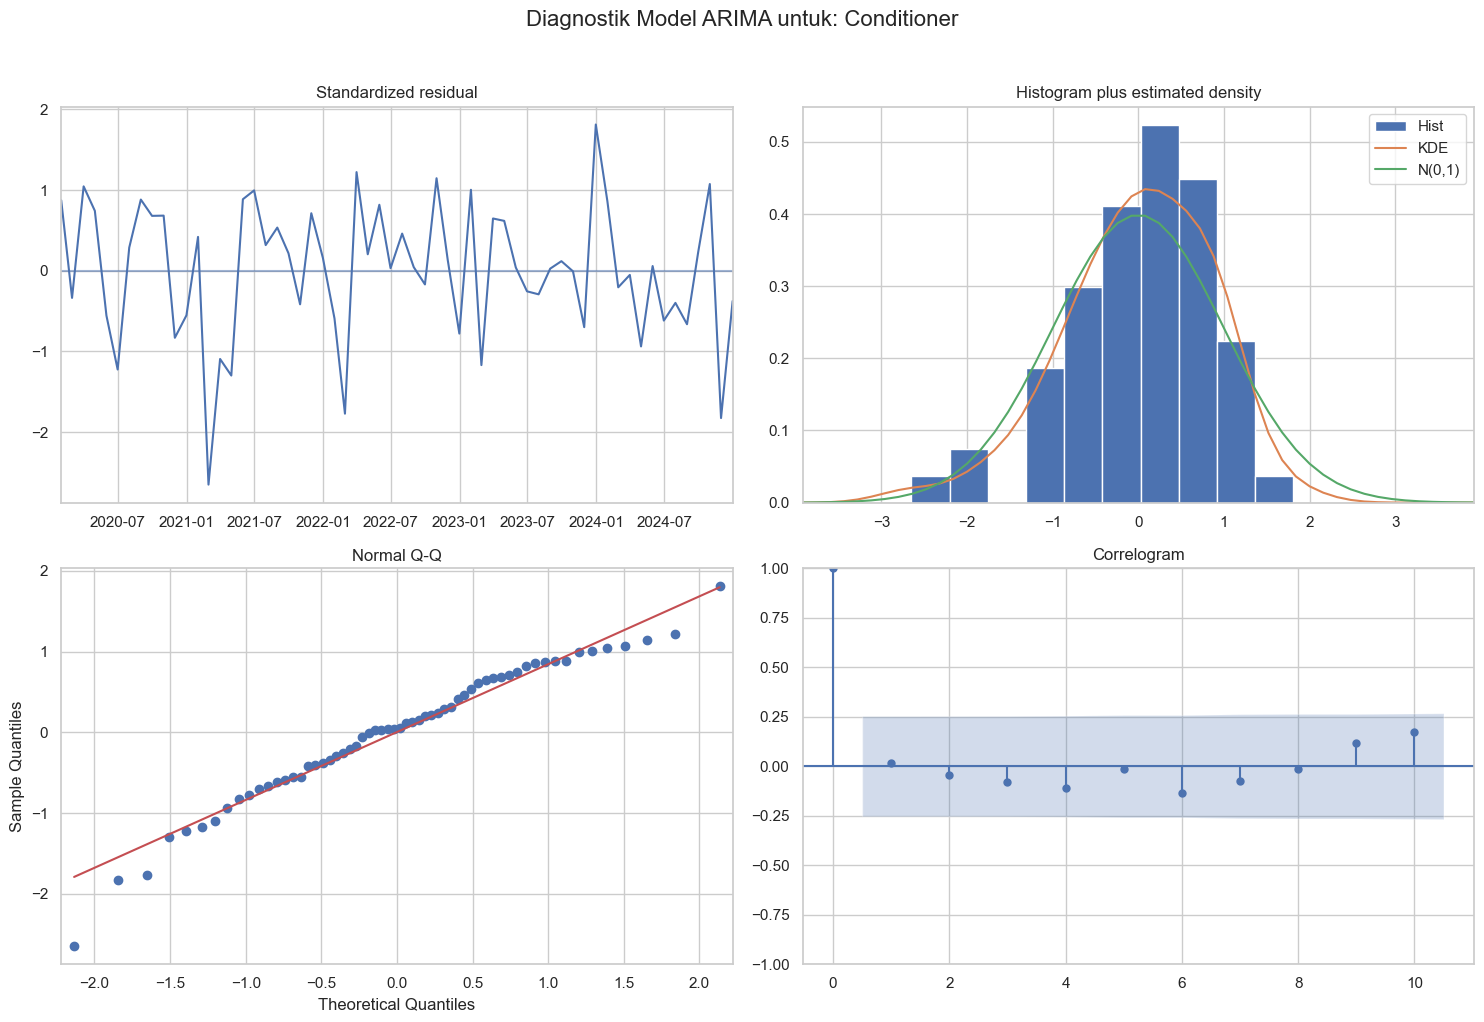


--- Menampilkan Plot Prediksi vs Aktual untuk Conditioner ---


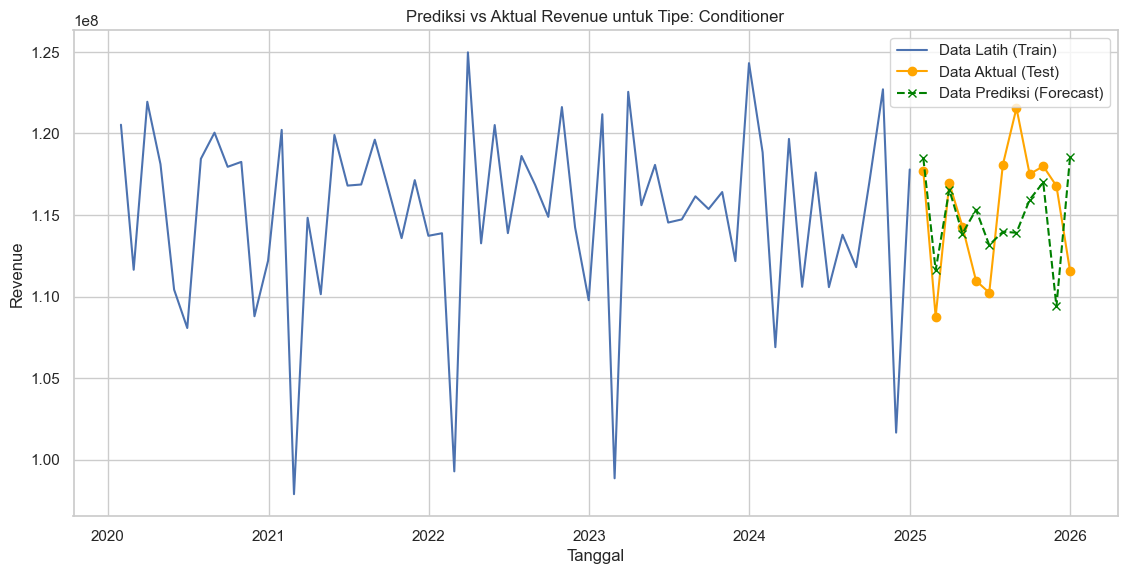

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1039.500
Date:                              Sat, 15 Nov 2025   AIC                           2087.001
Time:                                      21:22:51   BIC                           2095.378
Sample:                                  01-31-2020   HQIC                          2090.278
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

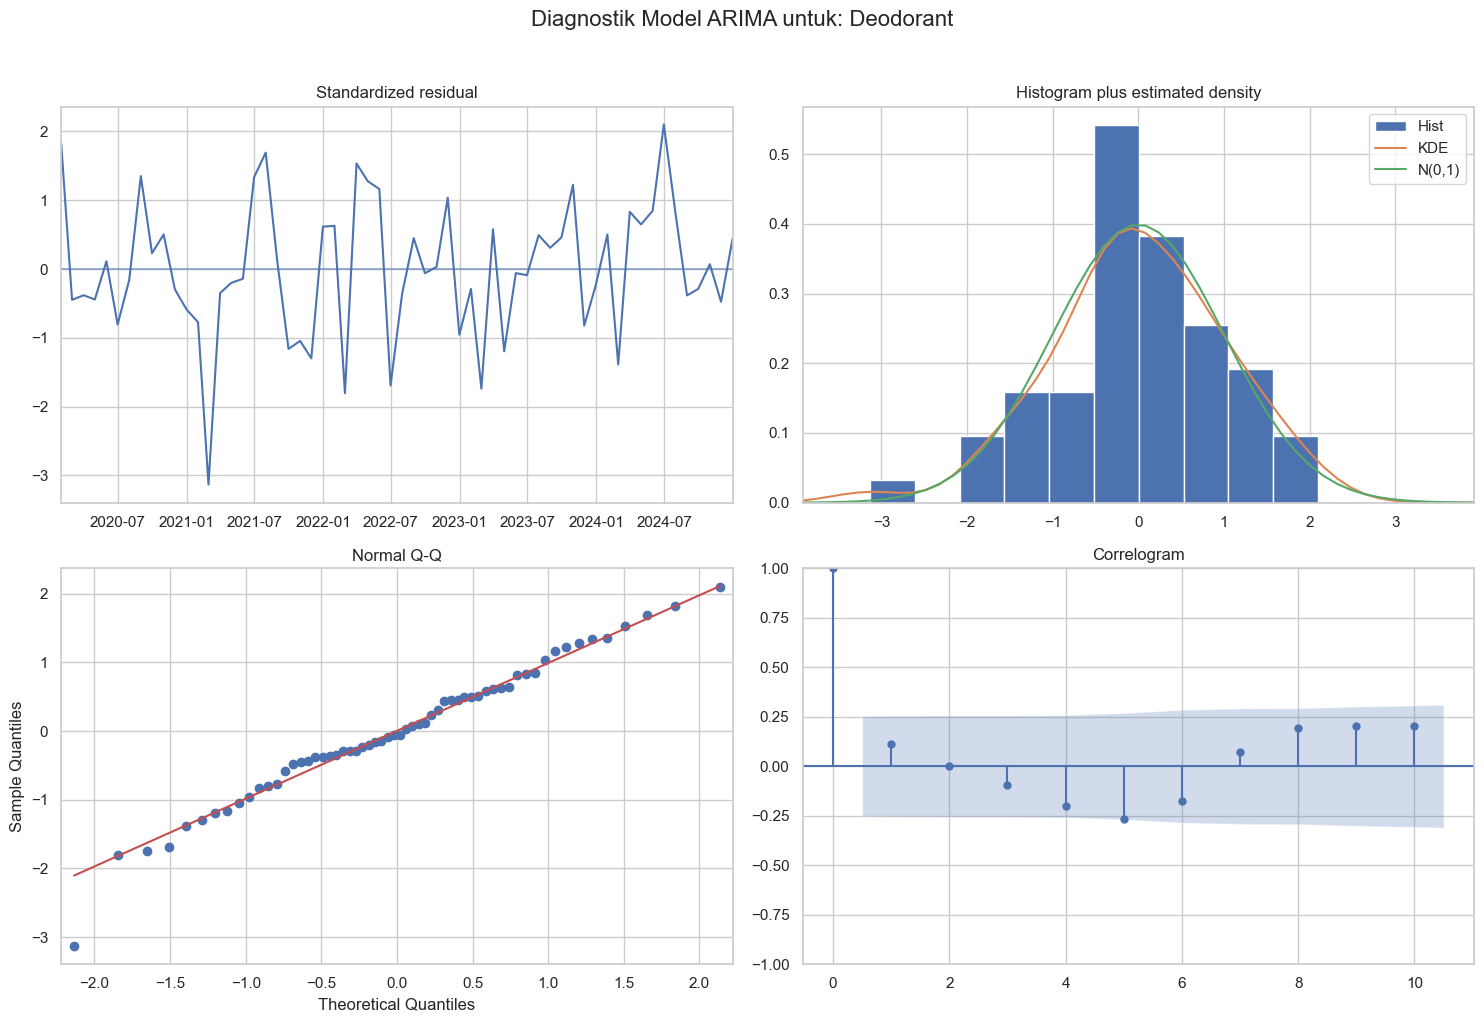


--- Menampilkan Plot Prediksi vs Aktual untuk Deodorant ---


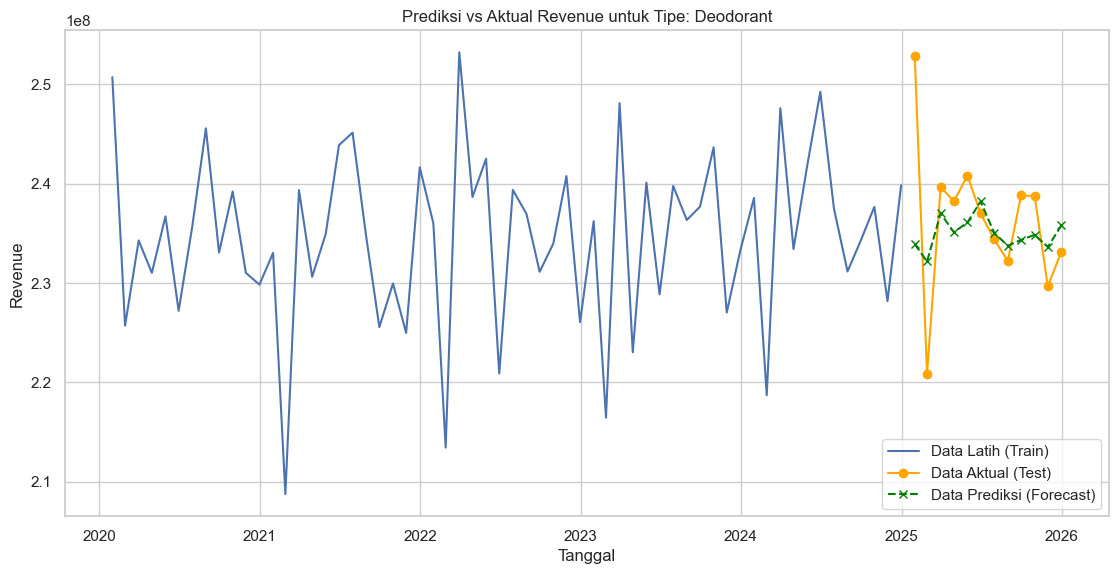

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1003.739
Date:                              Sat, 15 Nov 2025   AIC                           2015.478
Time:                                      21:23:03   BIC                           2023.855
Sample:                                  01-31-2020   HQIC                          2018.755
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

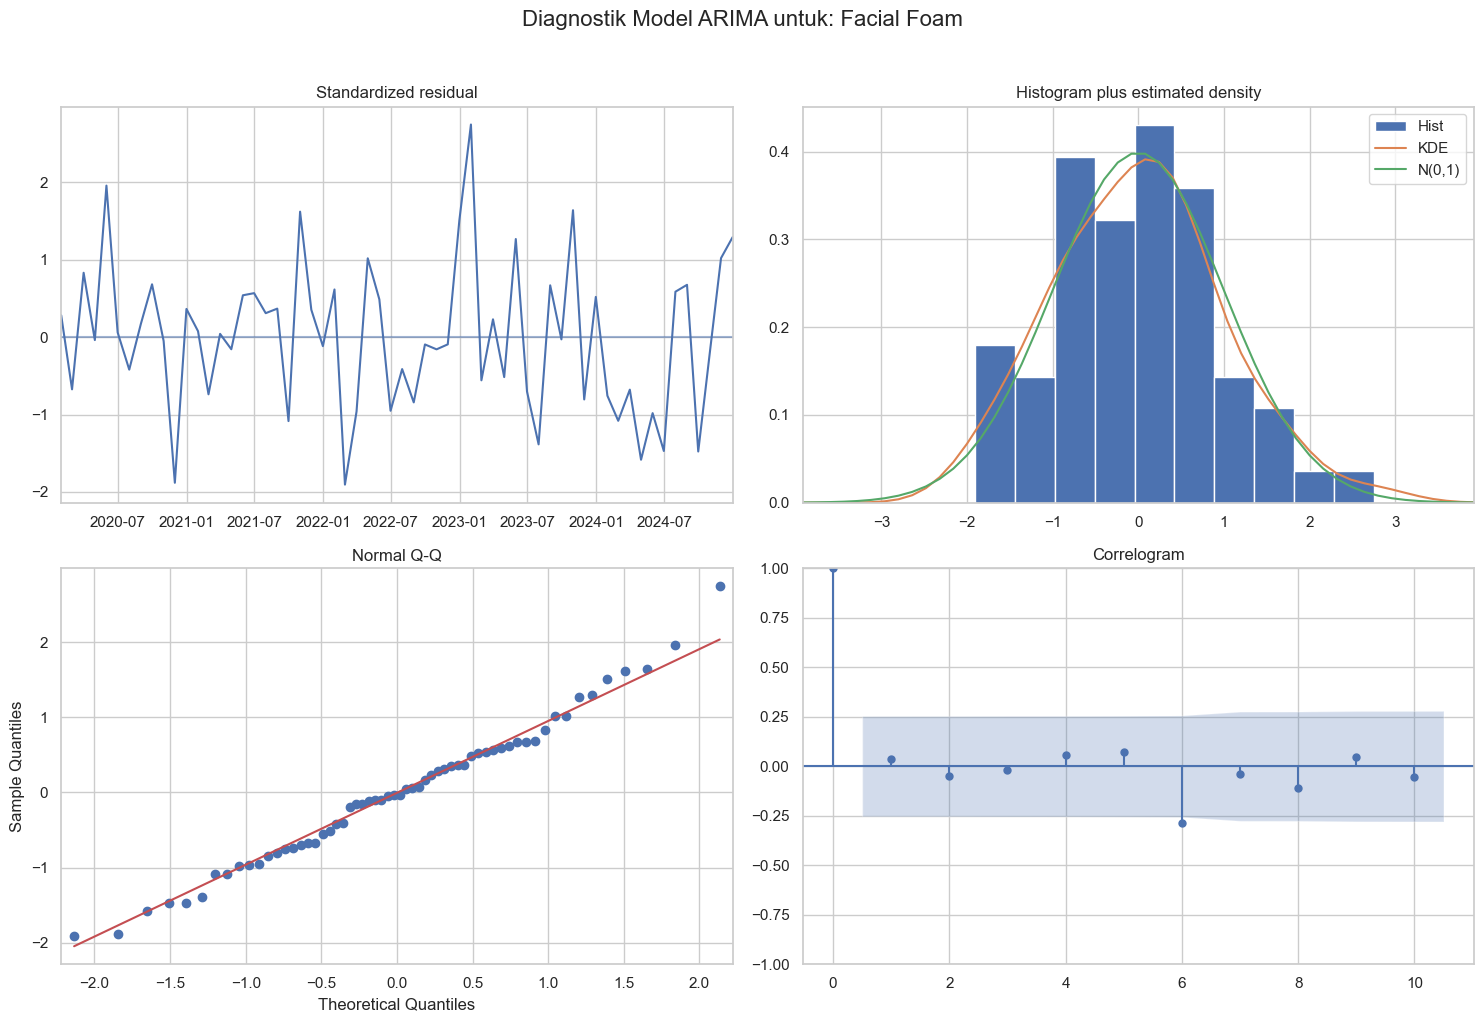


--- Menampilkan Plot Prediksi vs Aktual untuk Facial Foam ---


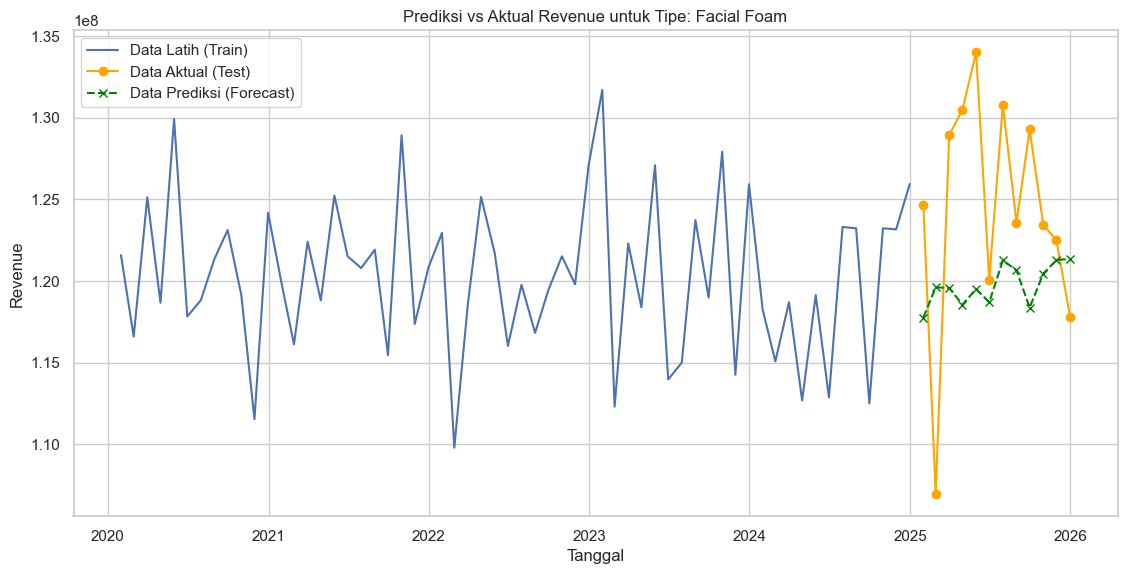

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -997.010
Date:                Sat, 15 Nov 2025   AIC                           2000.020
Time:                        21:23:12   BIC                           2006.303
Sample:                    01-31-2020   HQIC                          2002.478
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.053e+08   6.82e-11   1.54e+18      0.000    1.05e+08    1.05e+08
ar.L1         -0.2137      0.006    -36.041  

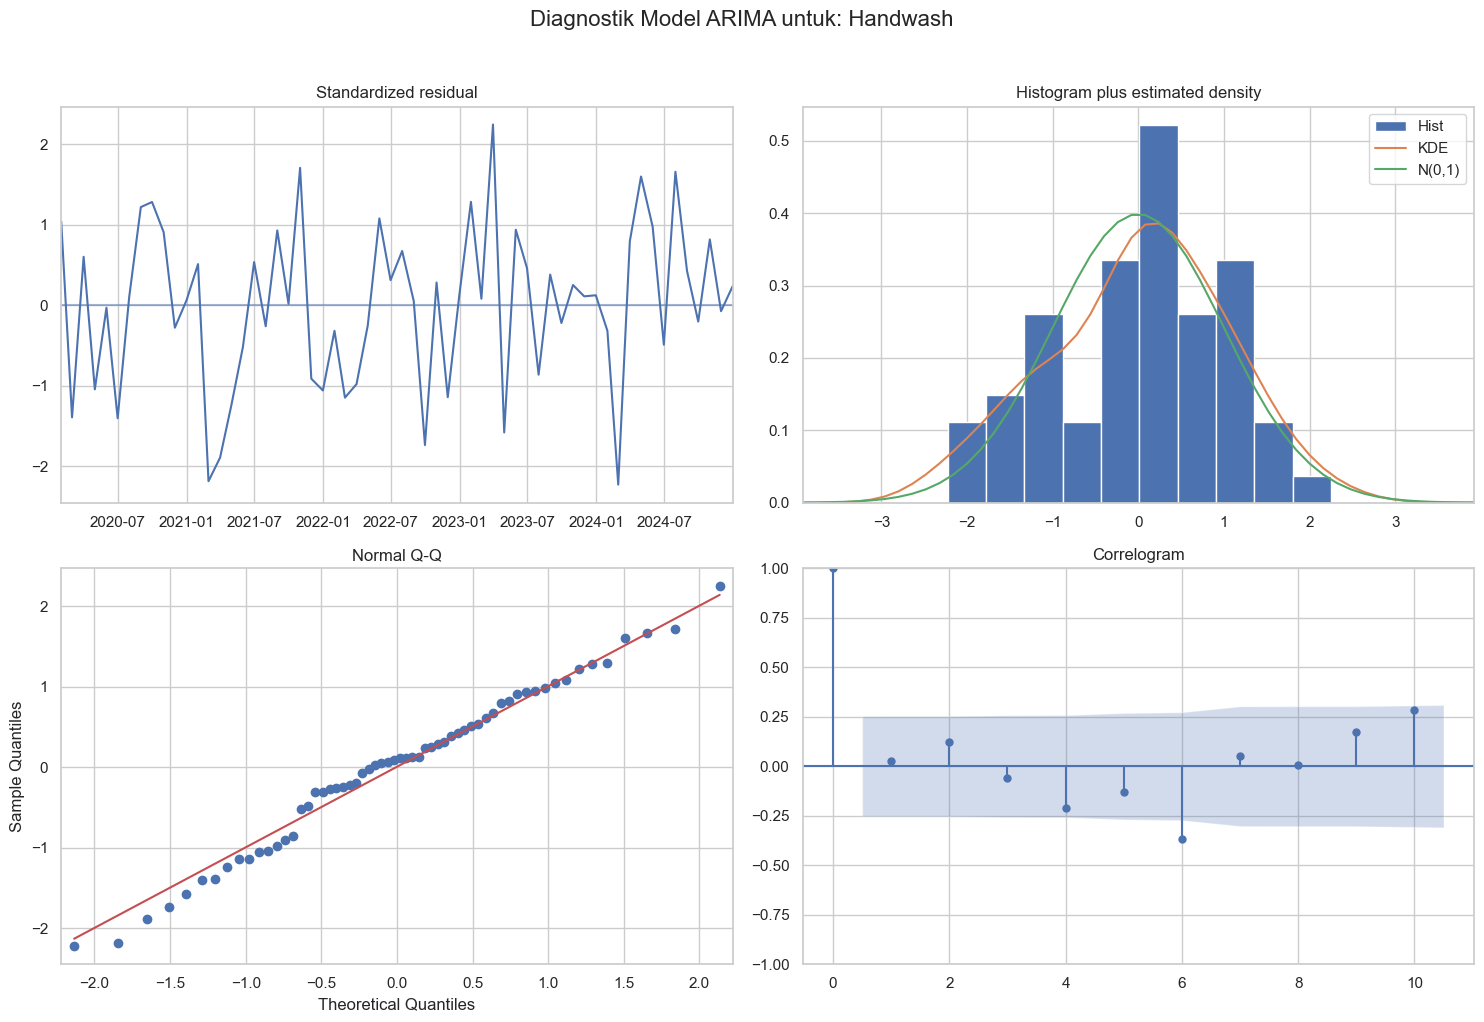


--- Menampilkan Plot Prediksi vs Aktual untuk Handwash ---


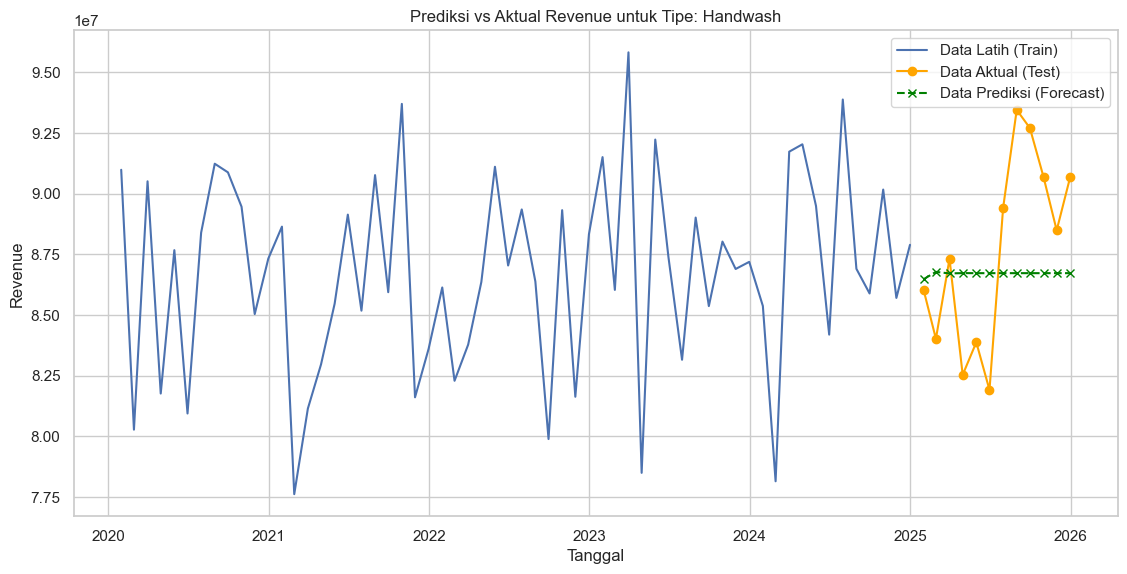

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                   60
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood               -1032.534
Date:                    Sat, 15 Nov 2025   AIC                           2071.067
Time:                            21:23:24   BIC                           2077.350
Sample:                        01-31-2020   HQIC                          2073.525
                             - 12-31-2024                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.263e+08   1.49e+06    152.201      0.000    2.23e+08    2.29e+08
ma.S.L12     

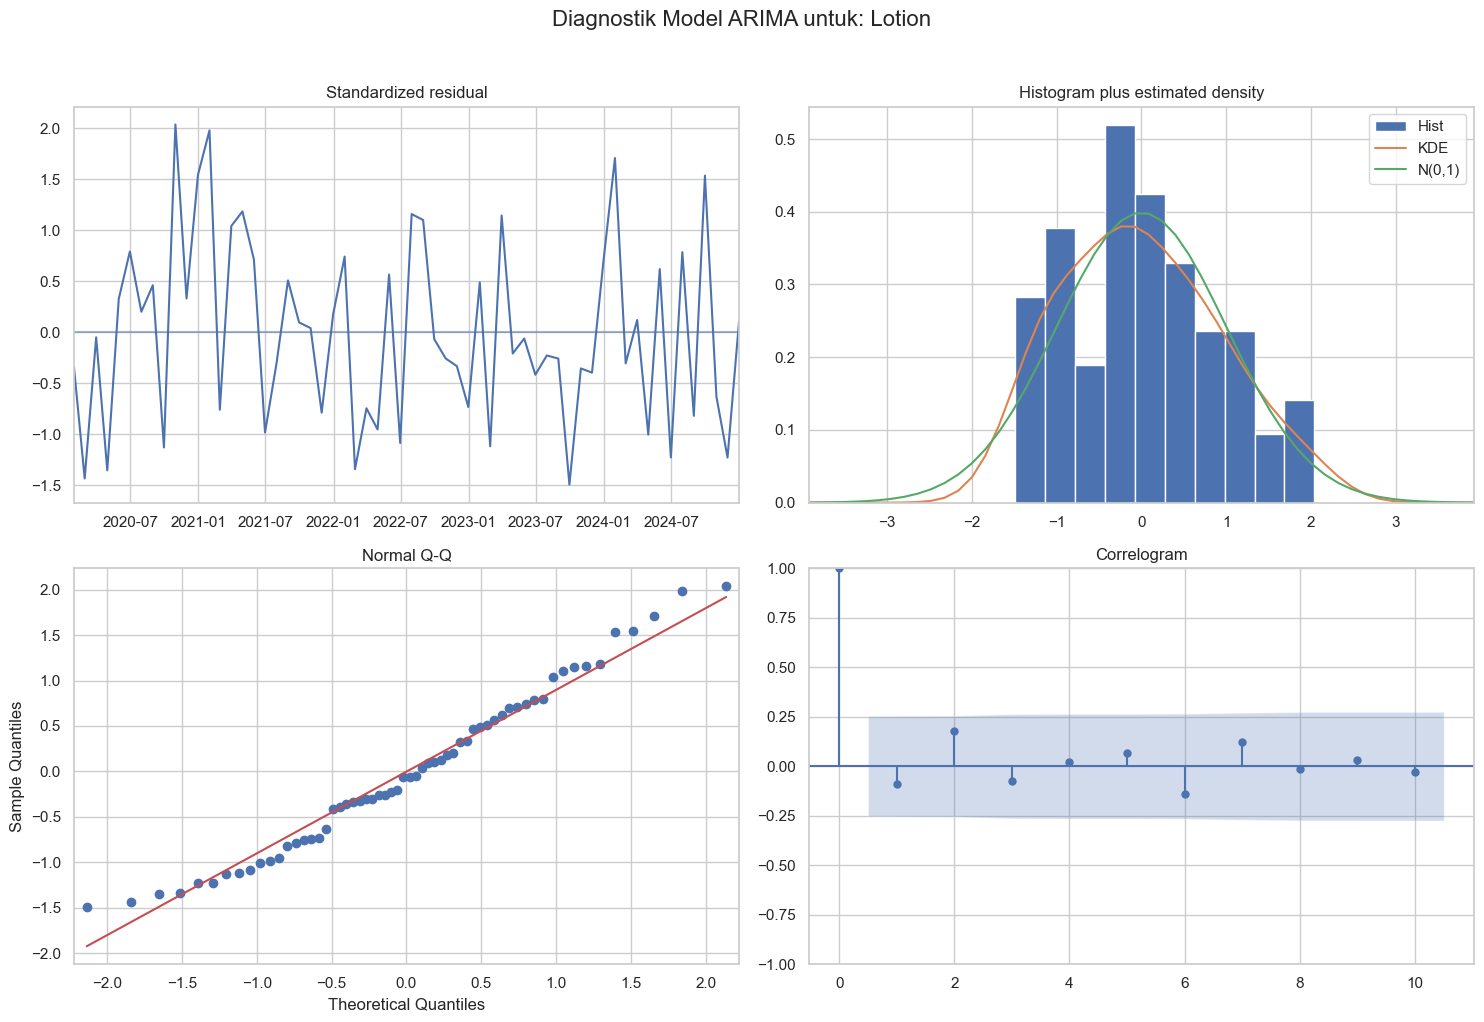


--- Menampilkan Plot Prediksi vs Aktual untuk Lotion ---


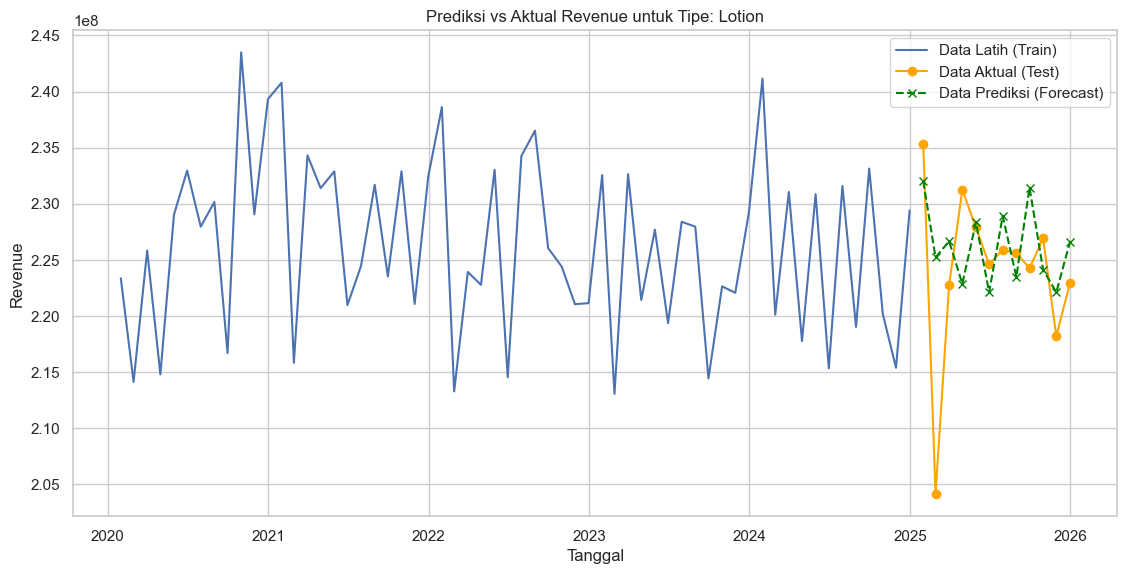

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -978.257
Date:                Sat, 15 Nov 2025   AIC                           1962.515
Time:                        21:23:32   BIC                           1968.798
Sample:                    01-31-2020   HQIC                          1964.973
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.272e+07   2.54e+05    247.257      0.000    6.22e+07    6.32e+07
ma.L1         -0.4004      0.151     -2.655  

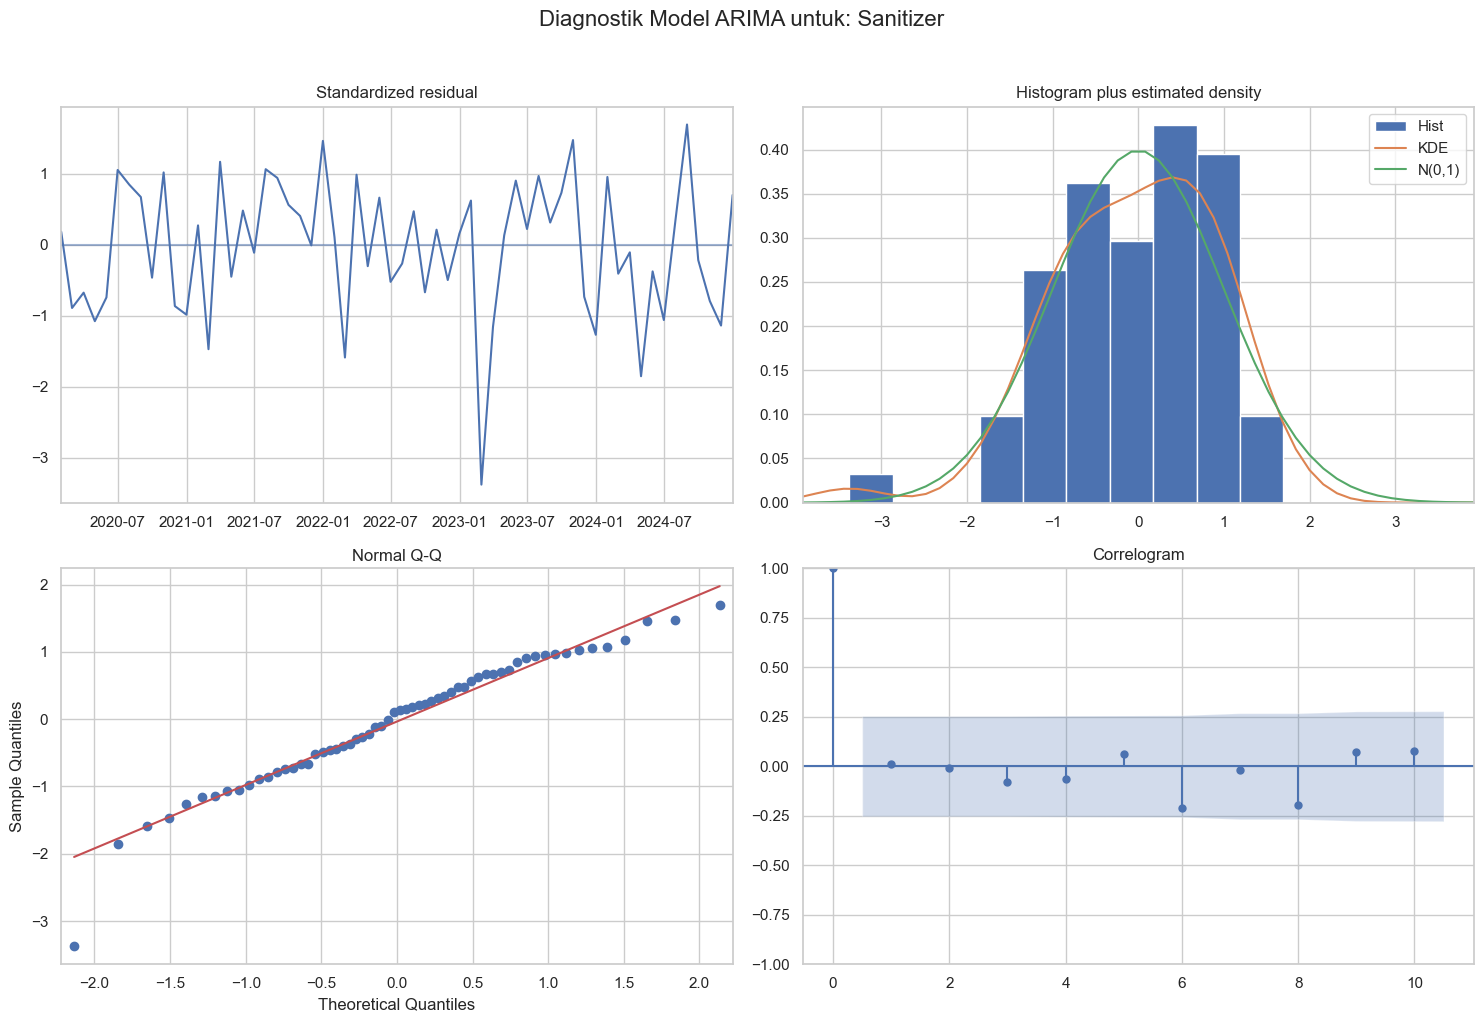


--- Menampilkan Plot Prediksi vs Aktual untuk Sanitizer ---


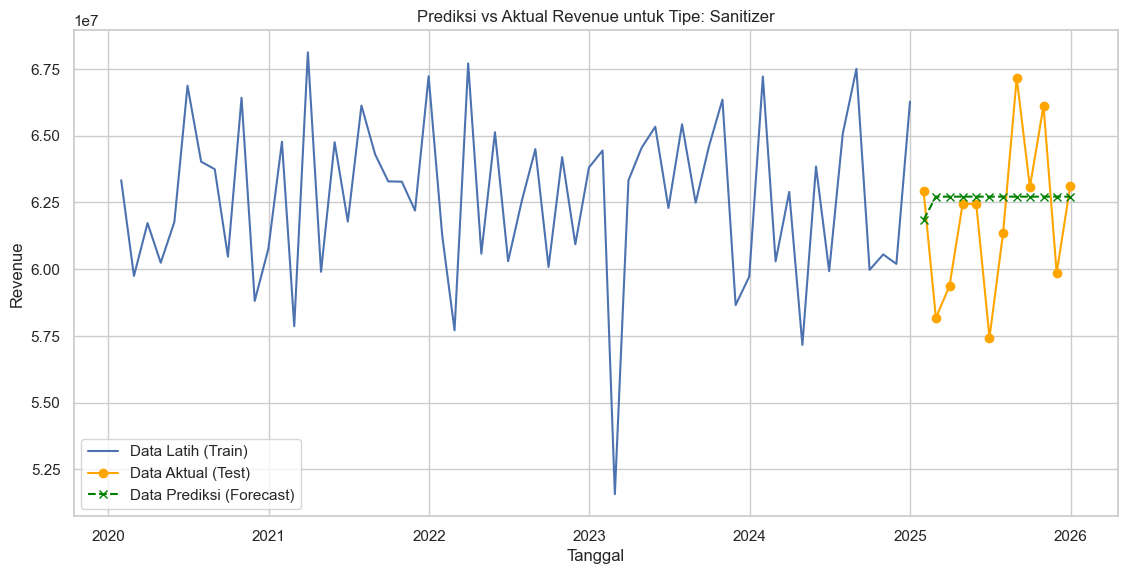

Total data: 72 bulan. Train: 60 bulan. Test: 12 bulan.

Ringkasan Model ARIMA Terbaik
                                   SARIMAX Results                                   
Dep. Variable:                             y   No. Observations:                   60
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood               -1077.364
Date:                       Sat, 15 Nov 2025   AIC                           2162.727
Time:                               21:23:44   BIC                           2171.105
Sample:                           01-31-2020   HQIC                          2166.004
                                - 12-31-2024                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.098e+08   6.03e+06    101.185      0.000    5.98e+08  

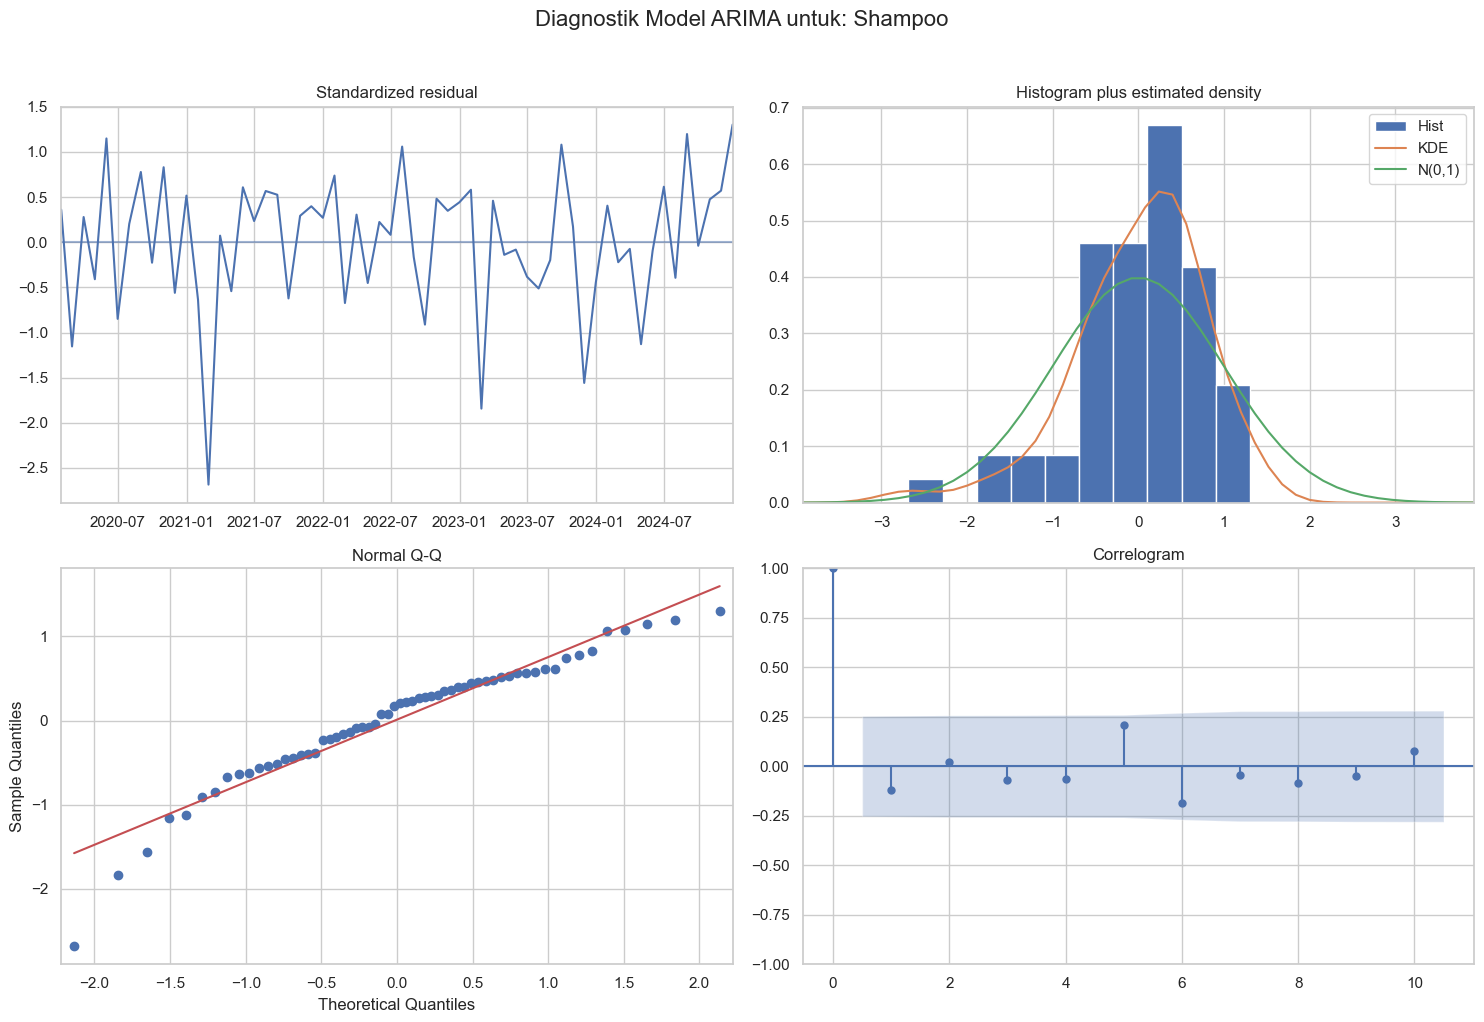


--- Menampilkan Plot Prediksi vs Aktual untuk Shampoo ---


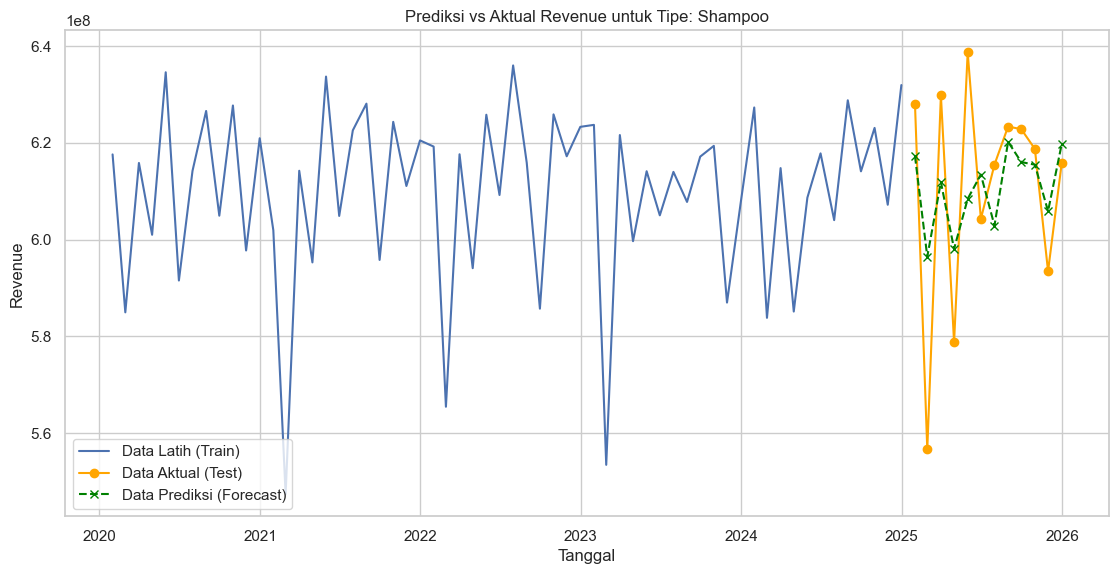

RINGKASAN HASIL EVALUASI SEMUA TIPE PRODUK
            Model ARIMA Model Seasonal          MSE         RMSE     MAPE (%)
Tipe Produk                                                                  
Deodorant     (1, 0, 0)  (0, 0, 1, 12) 4.919782e+13 7.014115e+06 2.069582e+00
Shampoo       (0, 0, 0)  (0, 0, 2, 12) 3.158640e+14 1.777256e+07 2.350350e+00
Lotion        (0, 0, 0)  (0, 0, 1, 12) 5.407084e+13 7.353287e+06 2.378351e+00
Conditioner   (0, 0, 1)  (0, 0, 2, 12) 1.819623e+13 4.265704e+06 2.921633e+00
Body Wash     (0, 0, 0)  (0, 0, 2, 12) 9.481834e+13 9.737471e+06 3.546190e+00
Sanitizer     (0, 0, 1)  (0, 0, 0, 12) 8.561733e+12 2.926044e+06 3.764486e+00
Handwash      (1, 0, 0)  (0, 0, 0, 12) 1.497896e+13 3.870267e+06 3.851626e+00
Facial Foam   (1, 0, 0)  (0, 0, 1, 12) 7.416781e+13 8.612074e+06 5.849434e+00


In [171]:
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
import warnings

sales_df = sales_df.reset_index()
sales_with_type_df = sales_df.merge(
        products_df[['product_id', 'type']],
        on='product_id',
        how='left'
    )

sales_df['date'] = pd.to_datetime(sales_df['date'])
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'])
marketing_df['start_date'] = pd.to_datetime(marketing_df['start_date'])
marketing_df['end_date'] = pd.to_datetime(marketing_df['end_date'])
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

monthly_revenue_by_type = sales_with_type_df.set_index('date').groupby('type').resample('M')['revenue'].sum()
monthly_revenue_by_type = monthly_revenue_by_type.reset_index()

evaluation_results = []

N_TEST_MONTHS = 12

types_to_forecast = monthly_revenue_by_type['type'].unique()

for prod_type in types_to_forecast:
    ts_data = monthly_revenue_by_type[
        monthly_revenue_by_type['type'] == prod_type
    ][['date', 'revenue']].set_index('date')['revenue']

    if len(ts_data) < (N_TEST_MONTHS + 24): 
        print(f"Data tidak cukup untuk {prod_type}. Dilewati.")
        continue

    train_data = ts_data.iloc[:-N_TEST_MONTHS]
    test_data = ts_data.iloc[-N_TEST_MONTHS:]

    print(f"Total data: {len(ts_data)} bulan. Train: {len(train_data)} bulan. Test: {len(test_data)} bulan.")


    model_arima = pm.auto_arima(
        train_data,
        start_p=1, start_q=1,
        test='adf',     
        max_p=3, max_q=3,
        m=12,        
        d=None,          
        D=None,           
        seasonal=True,   
        stepwise=True,   
        suppress_warnings=True,
        error_action='ignore'
    )

    print("\nRingkasan Model ARIMA Terbaik")
    print(model_arima.summary())

    predictions = model_arima.predict(n_periods=len(test_data))
    predictions_series = pd.Series(predictions, index=test_data.index)

    print("\n1. Metrik Evaluasi Model")
    mse = mean_squared_error(test_data, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test_data, predictions)

    print(f"  MSE  : {mse:,.2f}")
    print(f"  RMSE : {rmse:,.2f}")
    print(f"  MAPE : {mape * 100:.2f} %")

    evaluation_results.append({
        'Tipe Produk': prod_type,
        'Model ARIMA': model_arima.order,
        'Model Seasonal': model_arima.seasonal_order,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE (%)': mape * 100
    })

    residuals = model_arima.resid()

    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"  Uji Normality (Shapiro-Wilk):")
    print(f"    Statistik = {shapiro_stat:.3f}, p-value = {shapiro_p:.3f}")
    if shapiro_p > 0.05:
        print("    Kesimpulan: Residual terdistribusi normal (p > 0.05). Asumsi TERPENUHI.")
    else:
        print("    Kesimpulan: Residual TIDAK terdistribusi normal (p <= 0.05). Asumsi TIDAK TERPENUHI.")

    lb_test = acorr_ljungbox(residuals, lags=min(10, len(residuals)//5), return_df=True)
    lb_p_value = lb_test['lb_pvalue'].iloc[-1]
    print(f"  Uji Autokorelasi (Ljung-Box):")
    print(f"    p-value pada lag {min(10, len(residuals)//5)} = {lb_p_value:.3f}")
    if lb_p_value > 0.05:
        print("    Kesimpulan: Tidak ada autokorelasi (p > 0.05). Asumsi TERPENUHI.")
    else:
        print("    Kesimpulan: Terdapat autokorelasi (p <= 0.05). Asumsi TIDAK TERPENUHI.")

    print("\n--- Menampilkan Plot Diagnostik Residual ---")
    fig = model_arima.plot_diagnostics(figsize=(15, 10))
    fig.suptitle(f"Diagnostik Model ARIMA untuk: {prod_type}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Menampilkan Plot Prediksi vs Aktual untuk {prod_type} ---")
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data, label='Data Latih (Train)')
    plt.plot(test_data.index, test_data, label='Data Aktual (Test)', color='orange', marker='o')
    plt.plot(predictions_series.index, predictions_series, label='Data Prediksi (Forecast)', color='green', linestyle='--', marker='x')
    plt.title(f"Prediksi vs Aktual Revenue untuk Tipe: {prod_type}")
    plt.xlabel("Tanggal")
    plt.ylabel("Revenue")
    plt.legend()
    plt.grid(True)
    plt.show()

print(f"RINGKASAN HASIL EVALUASI SEMUA TIPE PRODUK")

if evaluation_results:
    results_df = pd.DataFrame(evaluation_results)
    results_df = results_df.set_index('Tipe Produk')
    print(results_df.sort_values(by='MAPE (%)'))
else:
    print("Tidak ada hasil evaluasi untuk ditampilkan.")

#### **Interpretasi Trend Forecasting per Tipe Produk (ARIMA)**

Pada bagian ini, kami melakukan **peramalan (forecasting) revenue bulanan** untuk setiap *product type* menggunakan model **Seasonal ARIMA (SARIMA)**.

Secara singkat, langkah yang dilakukan adalah:
- Menggabungkan `sales` dan `products`, lalu mengubah data menjadi **total revenue bulanan per tipe produk**.
- Membagi data menjadi:
  - **Train**: seluruh bulan kecuali 12 bulan terakhir.
  - **Test**: 12 bulan terakhir (digunakan hanya untuk evaluasi).
- Menggunakan `auto_arima` untuk memilih kombinasi parameter ARIMA terbaik (termasuk komponen musiman dengan periode 12 bulan).
- Melakukan **forecast 12 bulan ke depan**, lalu membandingkan hasil forecast dengan data aktual pada periode *test*.

#### Akurasi Model (MSE, RMSE, MAPE)

Akurasi model pada data uji diukur dengan:
- **MSE** dan **RMSE** → menunjukkan besar error dalam satuan rupiah,
- **MAPE (%)** → menunjukkan rata-rata persentase error terhadap nilai aktual.

Dari tabel `results_df` di atas, dapat disimpulkan bahwa:
- **Sebagian besar tipe produk memiliki MAPE hanya beberapa persen dan berada di bawah 5%**,  
- Kategori dengan pola paling fluktuatif (misalnya **Facial Foam**) memiliki MAPE sedikit lebih tinggi, tetapi **masih di bawah 10%**.

Artinya, secara keseluruhan **model ARIMA musiman cukup presisi** untuk memprediksi revenue bulanan tiap tipe produk, dengan rata-rata kesalahan relatif yang masih sangat wajar untuk konteks bisnis.

#### Uji Asumsi Residual

Untuk memastikan model layak dipakai sebagai model deret waktu, residual model diuji dengan:

- **Uji normalitas Shapiro–Wilk**  
  - Pada beberapa tipe, p-value berada sedikit di bawah 0.05 → menunjukkan residual tidak sepenuhnya normal.  
  - Hal ini wajar pada data revenue yang mengandung promo dan outlier, dan dicatat sebagai keterbatasan.

- **Uji autokorelasi Ljung–Box**  
  - p-value pada beberapa lag utama > 0.05 → tidak ditemukan autokorelasi signifikan pada residual.  
  - Ini menunjukkan bahwa pola tren dan musiman sudah cukup tertangkap oleh model, dan residual dapat dianggap sebagai *noise* yang acak.

Dengan kombinasi **MAPE yang rendah** dan **residual tanpa autokorelasi signifikan**, model ARIMA musiman yang digunakan dapat dianggap **cukup baik dan stabil** sebagai dasar **trend forecasting revenue 12 bulan ke depan per tipe produk**.

#### Interpretasi Visualisasi Model

Selain metrik dan uji asumsi, kualitas model juga diperiksa secara visual melalui dua jenis plot:

1. **Plot diagnostik residual (per tipe produk)**  
   Untuk tiap tipe produk, ditampilkan empat panel diagnostik:
   - **Standardized residual vs waktu** → residual berfluktuasi acak di sekitar nol tanpa pola tertentu, menandakan tidak ada trend atau musiman yang tertinggal.
   - **Histogram + kurva normal** → bentuk distribusi residual mendekati lonceng (bell-shaped), konsisten dengan asumsi mendekati normal.
   - **Normal Q–Q plot** → mayoritas titik mengikuti garis diagonal, dengan sedikit deviasi di bagian ekor akibat beberapa bulan ekstrem (promo/outlier).
   - **Correlogram (ACF residual)** → hampir semua lag berada di dalam band kepercayaan, sejalan dengan hasil Ljung–Box bahwa tidak ada autokorelasi residual yang signifikan.

   Sebagai contoh, diagnostik untuk tipe **Sanitizer** menunjukkan pola residual yang acak, distribusi yang mendekati normal, dan ACF yang berada dalam batas kepercayaan. Pola visual yang serupa juga muncul pada tipe-tipe lain, sehingga menguatkan bahwa residual model dapat dianggap sebagai *white noise*.

2. **Plot Prediksi vs Aktual (Train/Test)**  
   Untuk setiap tipe produk, plot ini menampilkan:
   - Garis **Train** (data historis yang digunakan untuk melatih model),
   - Garis/titik **Test (Aktual)** untuk 12 bulan terakhir,
   - Garis **Forecast** (prediksi ARIMA untuk periode test).

   Secara umum, garis forecast mengikuti bentuk dan level data aktual pada periode test, dengan selisih yang konsisten dengan nilai MAPE yang rendah. Pada beberapa kategori yang lebih fluktuatif, deviasi tampak sedikit lebih besar, namun masih dalam batas error yang wajar (<10%).

Visualisasi ini memperkuat kesimpulan bahwa model ARIMA yang dibangun **mampu menangkap pola tren dan musiman** revenue per tipe produk, dan dapat diandalkan sebagai dasar pengambilan keputusan terkait proyeksi penjualan ke depan.

---

### Prophet

BAGIAN 1: Menjalankan Prediksi Produk Kunci
Total ditemukan 15 produk unik untuk diprediksi.


21:08:39 - cmdstanpy - INFO - Chain [1] start processing
21:08:41 - cmdstanpy - INFO - Chain [1] done processing


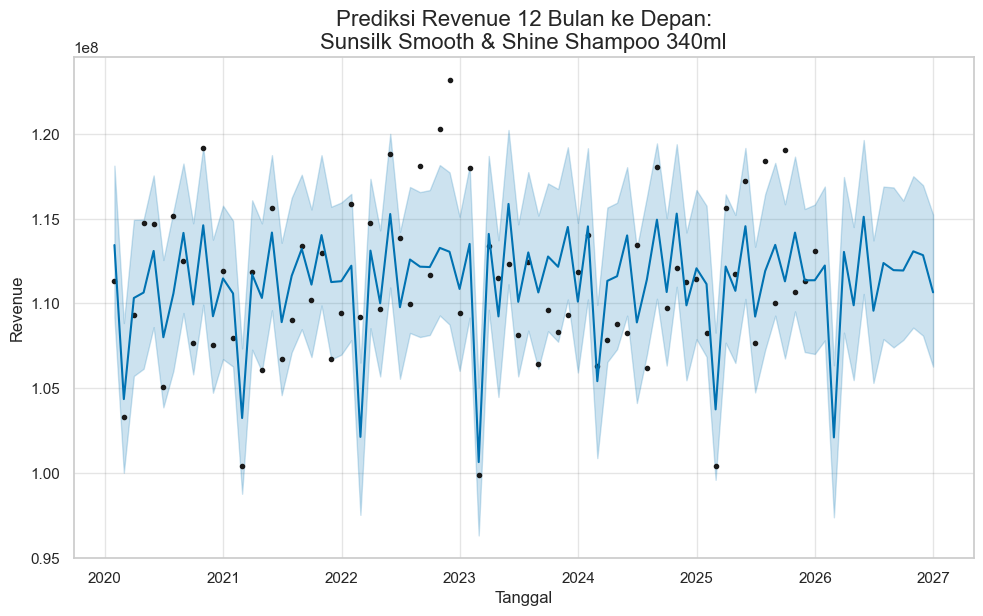

21:08:41 - cmdstanpy - INFO - Chain [1] start processing
21:08:42 - cmdstanpy - INFO - Chain [1] done processing


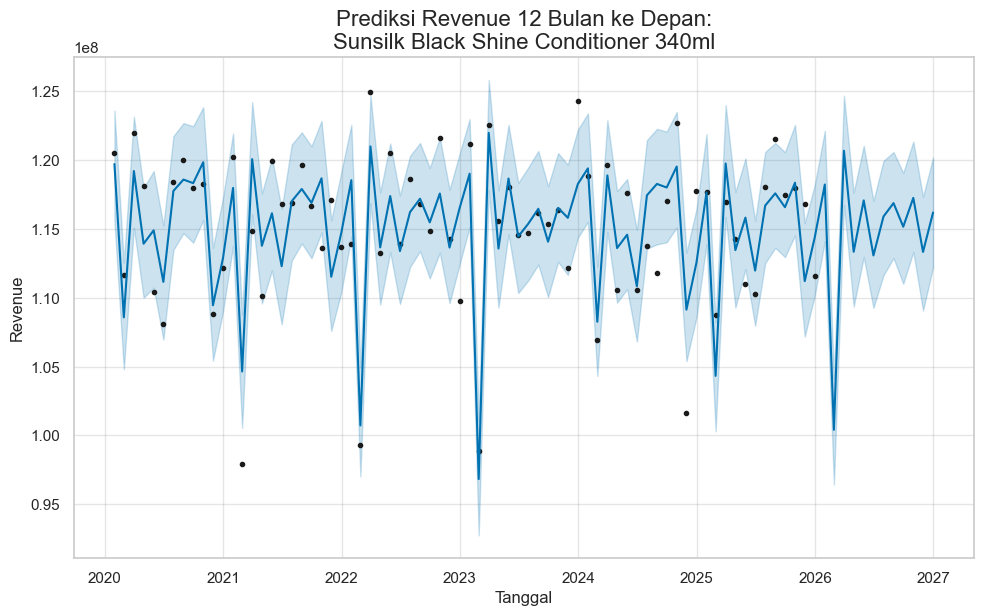

21:08:43 - cmdstanpy - INFO - Chain [1] start processing
21:08:43 - cmdstanpy - INFO - Chain [1] done processing


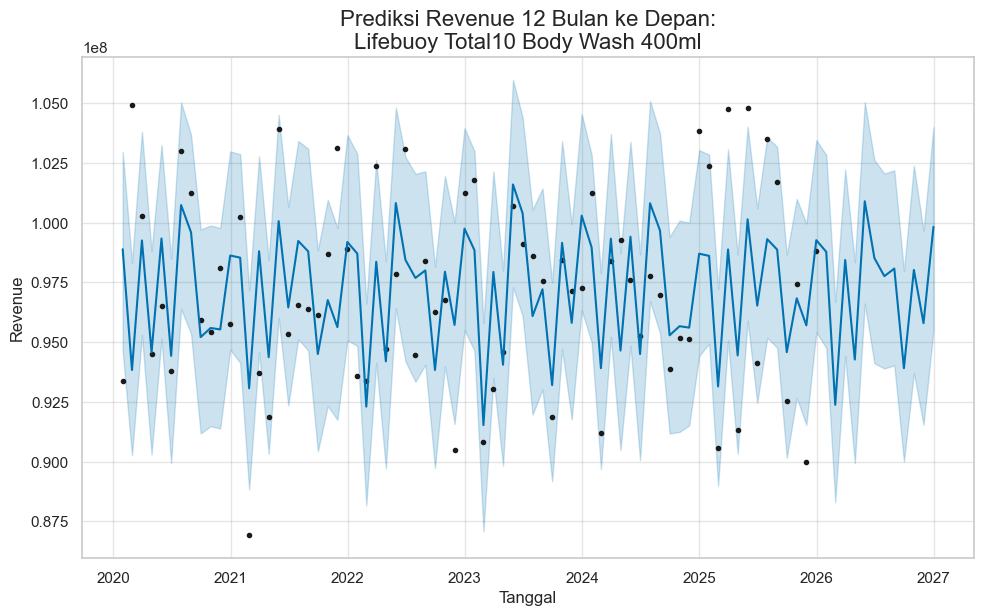

21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:45 - cmdstanpy - INFO - Chain [1] done processing


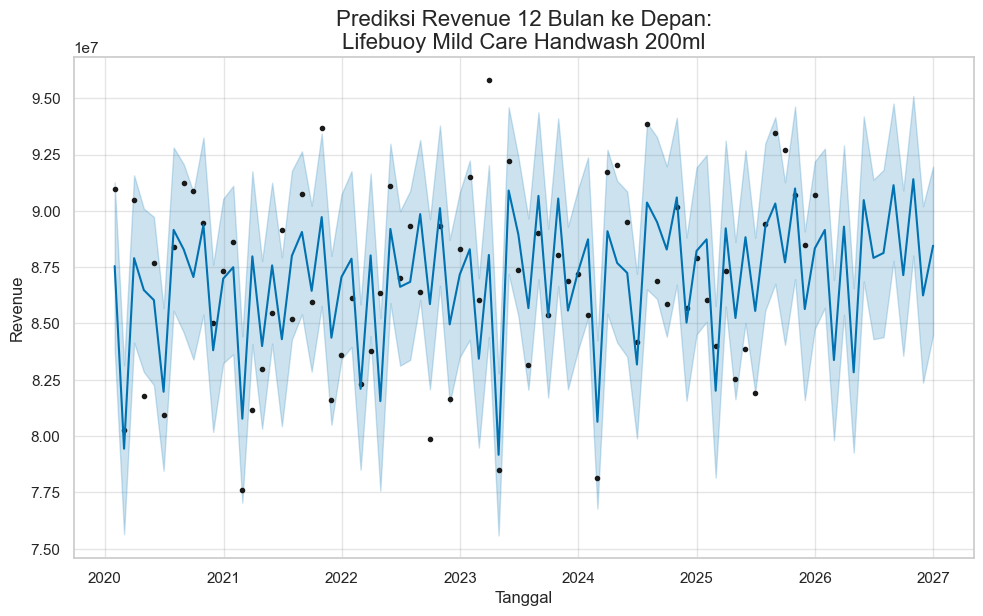

21:08:46 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing


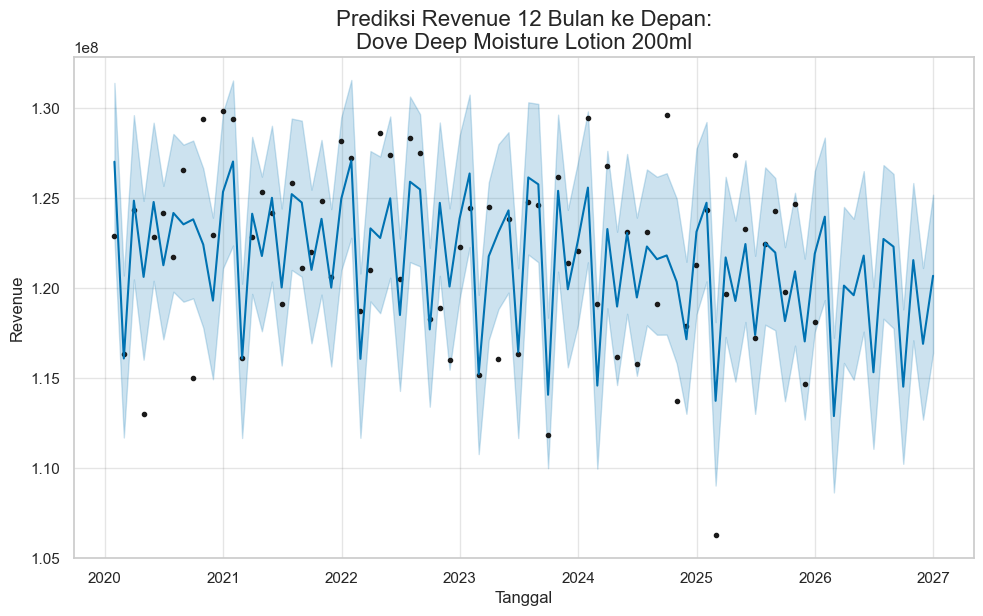

21:08:47 - cmdstanpy - INFO - Chain [1] start processing
21:08:48 - cmdstanpy - INFO - Chain [1] done processing


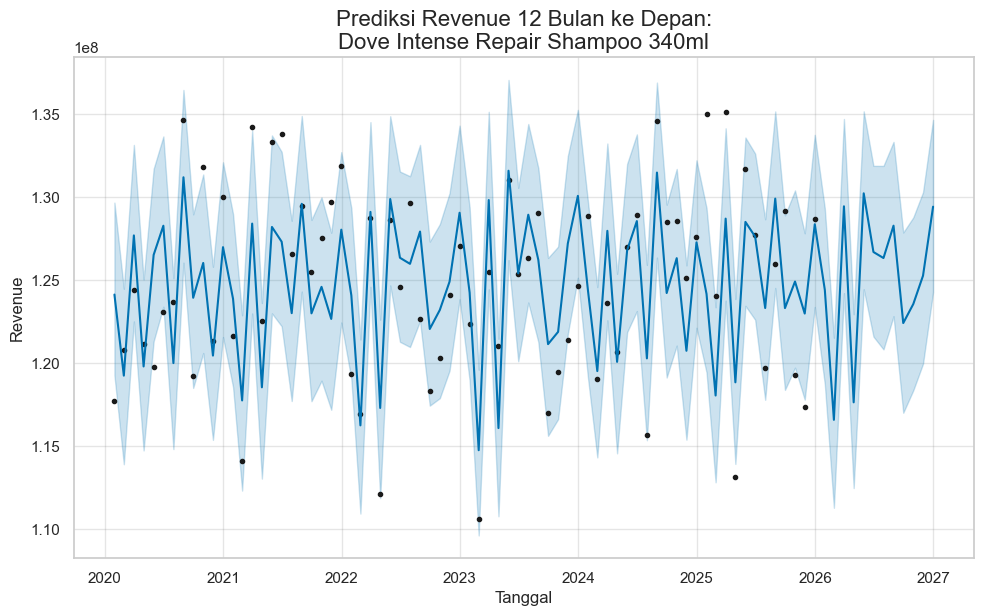

21:08:48 - cmdstanpy - INFO - Chain [1] start processing
21:08:49 - cmdstanpy - INFO - Chain [1] done processing


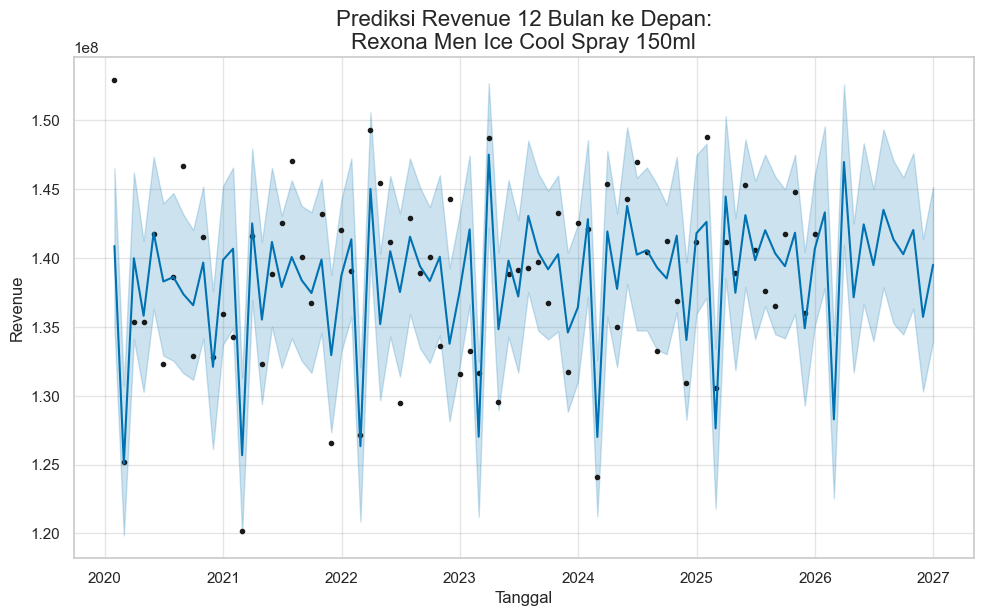

21:08:50 - cmdstanpy - INFO - Chain [1] start processing
21:08:50 - cmdstanpy - INFO - Chain [1] done processing


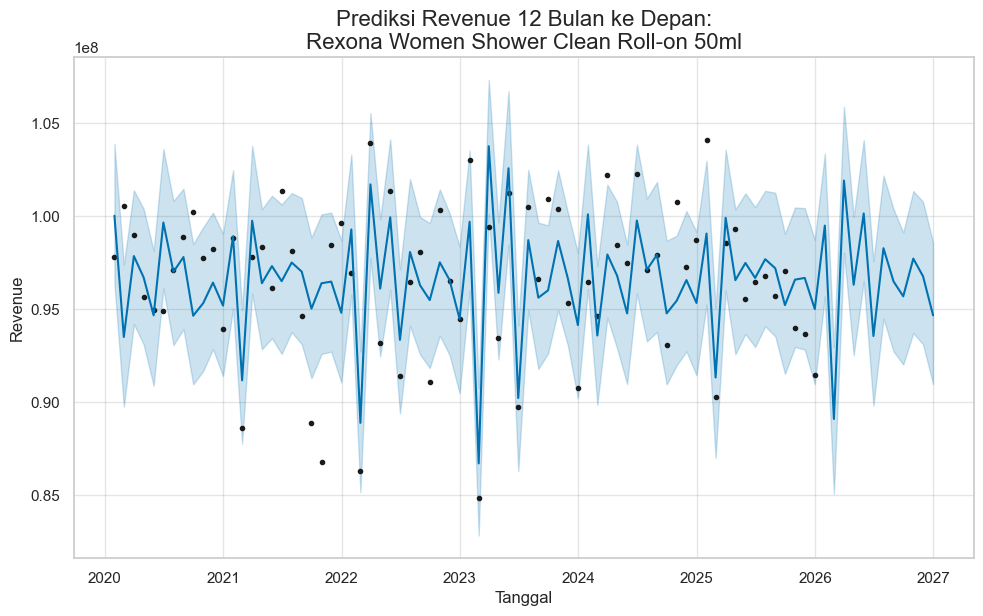

21:08:51 - cmdstanpy - INFO - Chain [1] start processing
21:08:52 - cmdstanpy - INFO - Chain [1] done processing


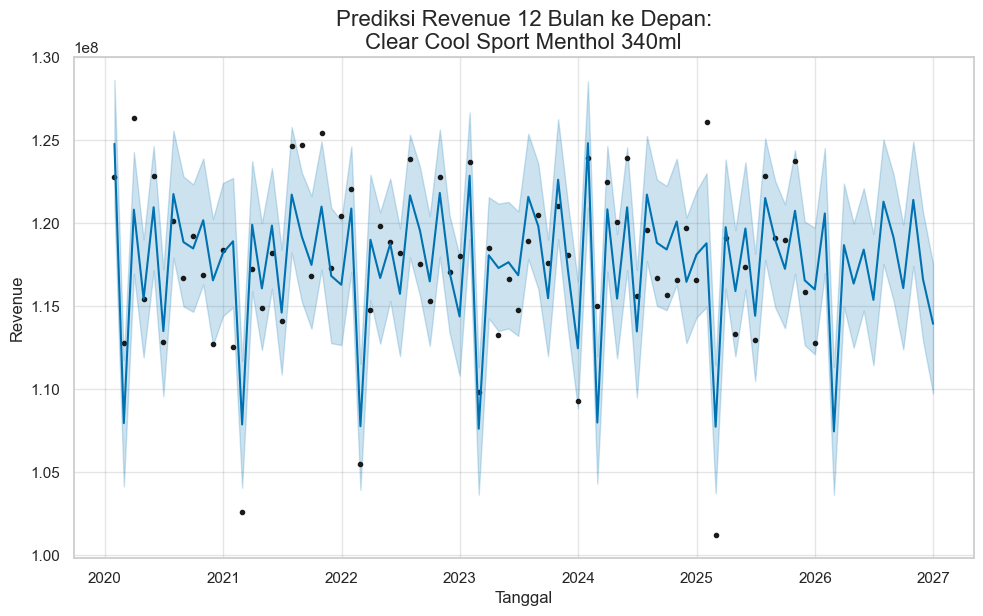

21:08:53 - cmdstanpy - INFO - Chain [1] start processing
21:08:54 - cmdstanpy - INFO - Chain [1] done processing


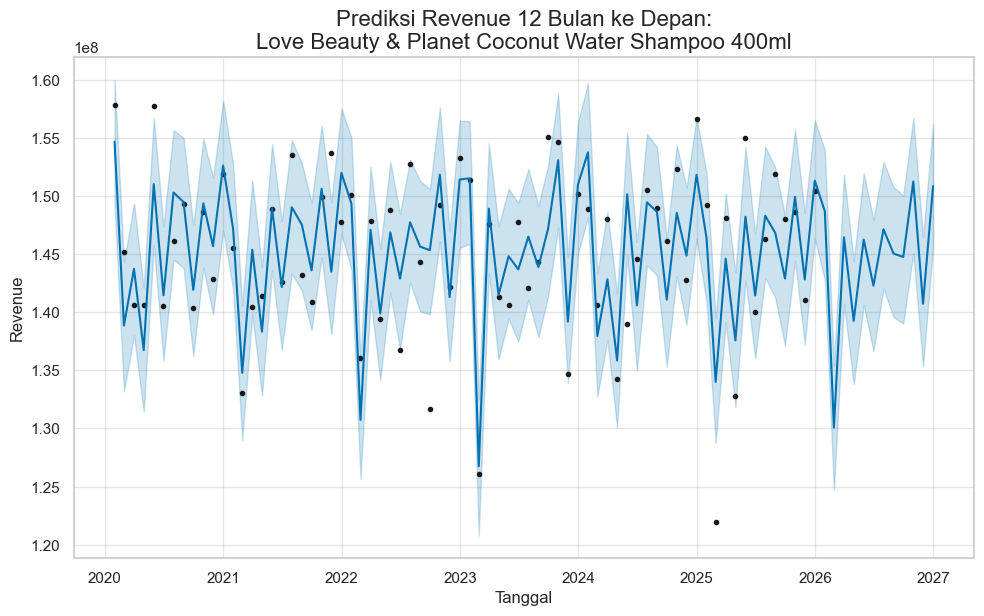

21:08:54 - cmdstanpy - INFO - Chain [1] start processing
21:08:55 - cmdstanpy - INFO - Chain [1] done processing


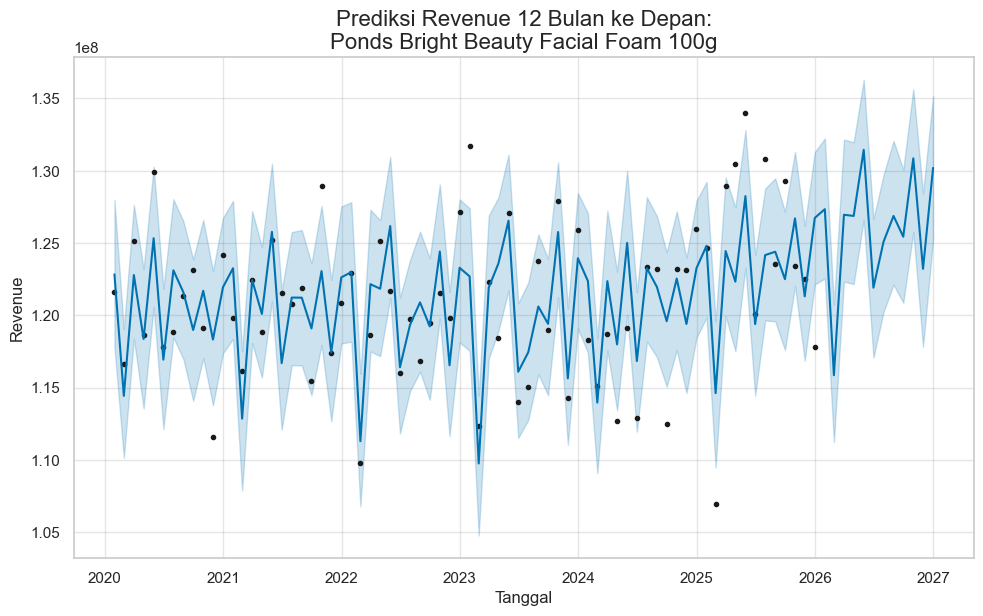

21:08:56 - cmdstanpy - INFO - Chain [1] start processing
21:08:56 - cmdstanpy - INFO - Chain [1] done processing


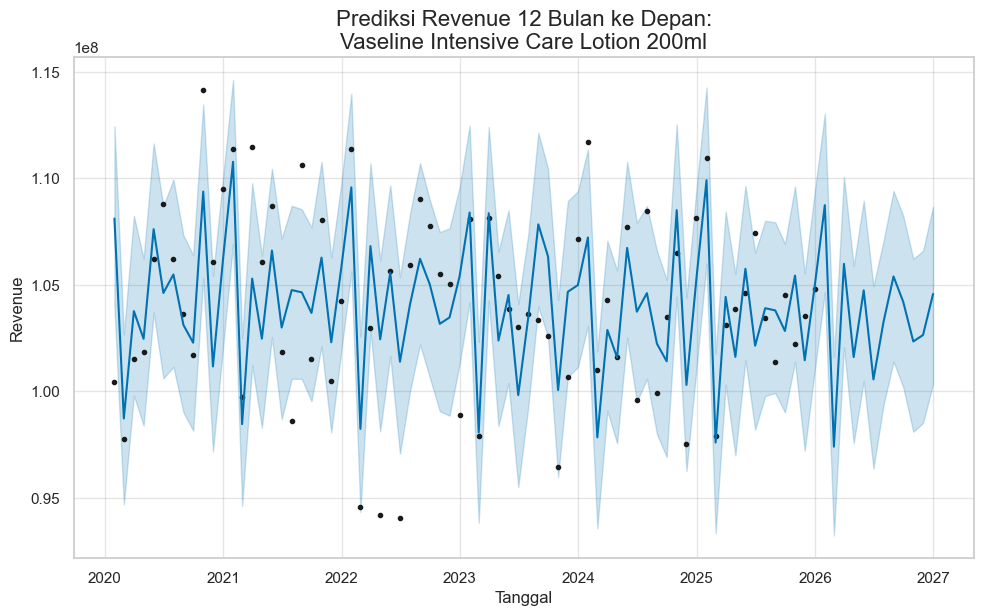

21:08:57 - cmdstanpy - INFO - Chain [1] start processing
21:08:58 - cmdstanpy - INFO - Chain [1] done processing


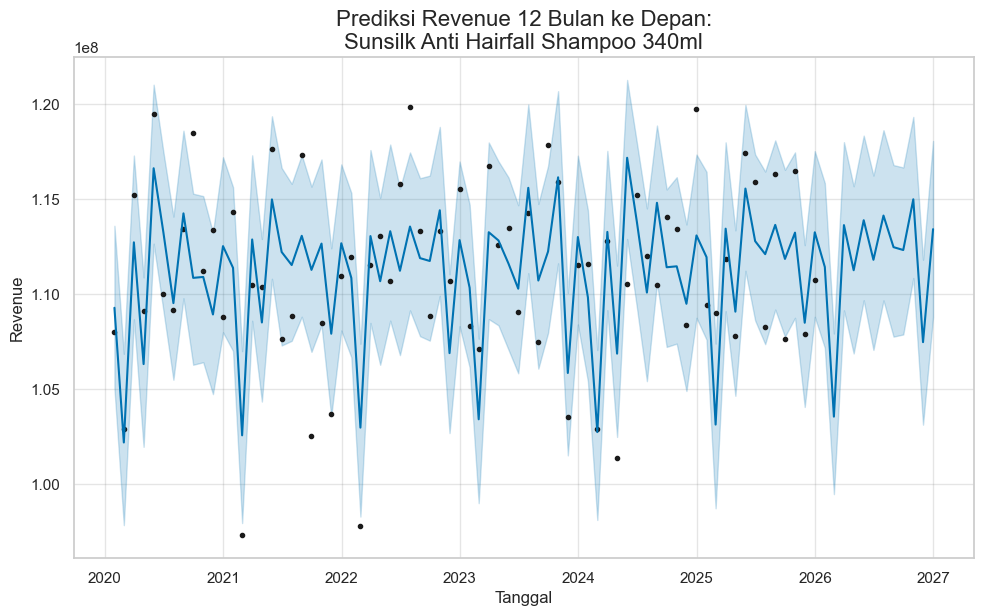

21:08:58 - cmdstanpy - INFO - Chain [1] start processing
21:08:59 - cmdstanpy - INFO - Chain [1] done processing


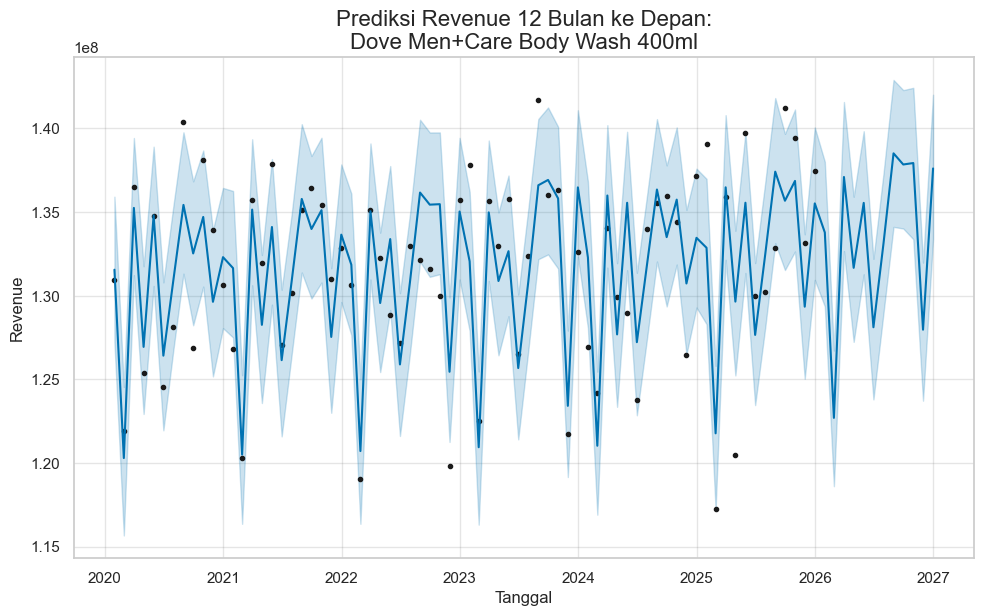

21:09:00 - cmdstanpy - INFO - Chain [1] start processing
21:09:00 - cmdstanpy - INFO - Chain [1] done processing


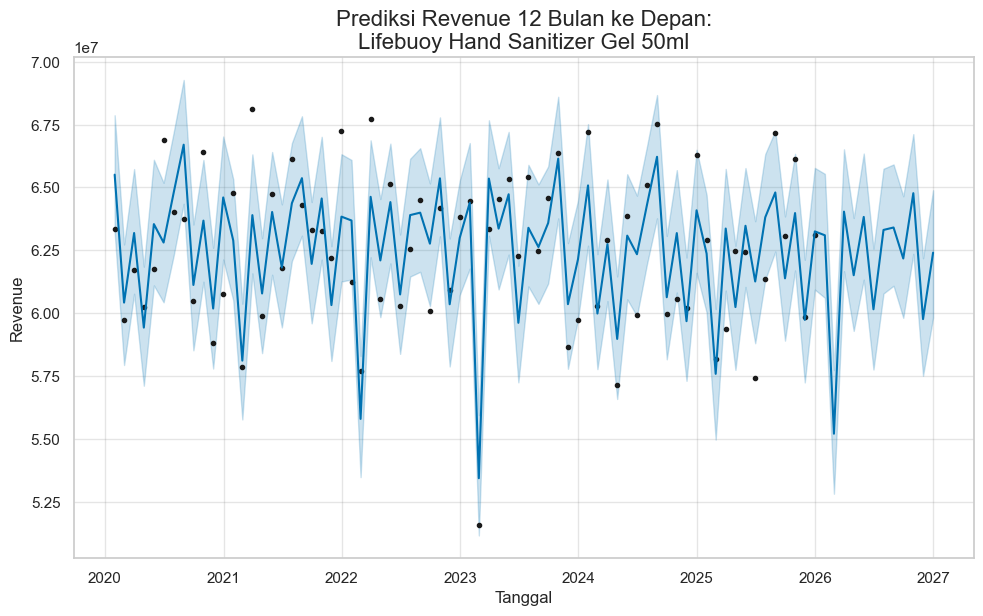



BAGIAN 2: Menganalisis Tren Persentase Sentimen Positif per Produk
--- Data Agregat Sentimen per Produk (Head) ---
                     product_name       date  is_positive  positive_sentiment_pct
0  Clear Cool Sport Menthol 340ml 2020-01-31 2.500000e-01            2.500000e+01
1  Clear Cool Sport Menthol 340ml 2020-02-29 1.818182e-01            1.818182e+01
2  Clear Cool Sport Menthol 340ml 2020-03-31 4.000000e-01            4.000000e+01
3  Clear Cool Sport Menthol 340ml 2020-04-30 3.000000e-01            3.000000e+01
4  Clear Cool Sport Menthol 340ml 2020-05-31 0.000000e+00            0.000000e+00


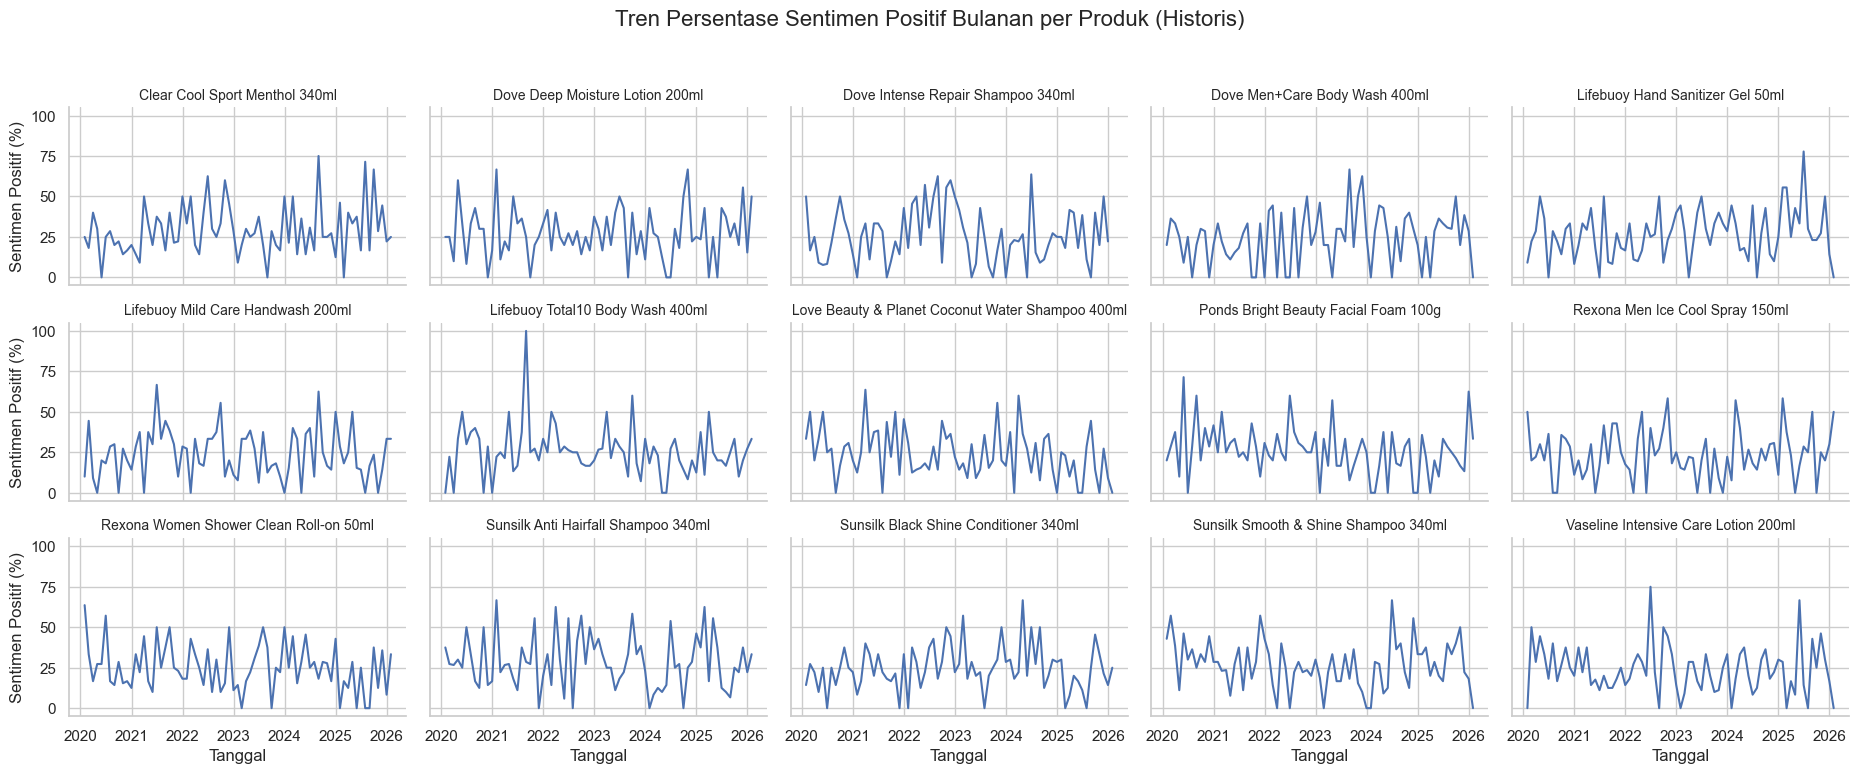

In [ ]:
from prophet import Prophet
sns.set_theme(style="whitegrid")

def forecast_product(product_name_target):    
    try:
        product_id_target = products_df[
            products_df['product_name'] == product_name_target
        ]['product_id'].iloc[0]
        
        product_sales = monthly_sales[
            monthly_sales['product_id'] == product_id_target
        ]

        prophet_df = product_sales.rename(columns={'date': 'ds', 'revenue': 'y'})
        
        if prophet_df.empty or len(prophet_df) < 2:
            print(f"Tidak ada/cukup data penjualan bulanan untuk {product_name_target}.")
            return

        m = Prophet()
        m.fit(prophet_df)
        future = m.make_future_dataframe(periods=12, freq='M')
        forecast = m.predict(future)

        fig = m.plot(forecast)
        plt.title(f'Prediksi Revenue 12 Bulan ke Depan:\n{product_name_target}', fontsize=16)
        plt.xlabel('Tanggal', fontsize=12)
        plt.ylabel('Revenue', fontsize=12)
        plt.show()

    except IndexError:
        print(f"!!! ERROR: Nama produk '{product_name_target}' tidak ditemukan di products_df. !!!")
    except NameError as e:
        print(f"\n!!! ERROR: Variabel tidak ditemukan: {e} !!!")
        print("Harap jalankan ulang Sel 2 (load data) dan Sel 8 (YoY growth) di bagian atas notebook.")
    except Exception as e:
        print(f"Terjadi error saat memprediksi {product_name_target}: {e}")

print("BAGIAN 1: Menjalankan Prediksi Produk Kunci")
all_product_names = products_df['product_name'].unique()
    
print(f"Total ditemukan {len(all_product_names)} produk unik untuk diprediksi.")

for product_name in all_product_names:
    forecast_product(product_name)

print("\n\nBAGIAN 2: Menganalisis Tren Persentase Sentimen Positif per Produk")

try:
    reviews_with_products_df = reviews_df.merge(
        products_df[['product_id', 'product_name']], 
        on='product_id', 
        how='left'
    )

    reviews_with_products_df['is_positive'] = (
        reviews_with_products_df['sentiment'] == 'Positive'
    ).astype(int)

    reviews_with_products_df['date'] = pd.to_datetime(reviews_with_products_df['date'])
    reviews_with_products_df.set_index('date', inplace=True)

    monthly_product_sentiment = reviews_with_products_df.groupby(
        'product_name'
    ).resample('M')['is_positive'].mean().reset_index()

    monthly_product_sentiment['positive_sentiment_pct'] = \
        monthly_product_sentiment['is_positive'] * 100

    print("--- Data Agregat Sentimen per Produk (Head) ---")
    print(monthly_product_sentiment.head())

    g = sns.relplot(
        data=monthly_product_sentiment,
        x='date',
        y='positive_sentiment_pct',
        col='product_name',  
        col_wrap=5,          
        kind='line',         
        height=2.5,          
        aspect=1.5,          
        facet_kws={'sharey': True} 
    )

    g.fig.suptitle('Tren Persentase Sentimen Positif Bulanan per Produk (Historis)', y=1.03, fontsize=16)
    g.set_axis_labels("Tanggal", "Sentimen Positif (%)")
    g.set_titles("{col_name}", size=10)
    
    min_pct = monthly_product_sentiment['positive_sentiment_pct'].min() - 5
    max_pct = monthly_product_sentiment['positive_sentiment_pct'].max() + 5
    g.set(ylim=(min_pct, max_pct)) 

    plt.tight_layout()
    plt.show()

except NameError as e:
    print(f"\n!!! ERROR: Variabel tidak ditemukan: {e} !!!")
    print("PASTIKAN Anda sudah menjalankan ulang Sel 2 (load data) di bagian atas notebook.")
except Exception as e:
    print(f"Terjadi error yang tidak terduga di Bagian 2: {e}")

### Tren Persentase Sentimen Positif Bulanan

1. Fluktuasi Ekstrem

- Garis-garis tren di semua panel **naik-turun sangat tajam** dari bulan ke bulan.
- Sangat umum bagi produk untuk:
  - naik hingga **75% bahkan 100% sentimen positif** di satu bulan,
  - lalu **jatuh ke 0% atau 25%** di bulan berikutnya.  
  (Contoh terlihat pada **Lifebuoy Total10 Body Wash** dan **Clear Cool Sport Menthol**.)

2. Kontras yang Jelas dengan Data Revenue

Ini adalah wawasan yang paling penting:

- Pada grafik revenue, **tren penjualan relatif stabil dan cukup dapat diprediksi**.
- Sebaliknya, **tren sentimen tampak kacau (chaotic) dan sulit diprediksi**.
- Hal ini menyiratkan bahwa:
  - **penjualan (revenue) saat ini tidak berkorelasi kuat dengan sentimen online** yang diukur,
  - pelanggan mungkin membeli karena **kebiasaan, ketersediaan produk, atau harga**,  
    dan tidak terlalu terpengaruh oleh “obrolan online” yang fluktuatif ini.

3. Tidak Ada Tren Jangka Panjang yang Jelas

- Berbeda dengan data revenue, di mana ada “pemenang” yang jelas (misalnya **Dove Men+Care** dengan tren pertumbuhan),
- Pada grafik sentimen **tidak ada satu pun produk yang terlihat sebagai “pemenang sentimen” jangka panjang**.
- Tidak ada produk yang berhasil membangun sentimen positif yang meningkat konsisten dari 2020 hingga 2026.
- Semua produk mengalami **“bulan-bulan baik” dan “bulan-bulan buruk”** secara acak.


4. Makna dari Volatilitas Sentimen yang Ekstrem

Kemungkinan #1: Volume Data Rendah (Paling Mungkin)
- Pola ekstrem seperti lonjakan ke **100%** lalu jatuh ke **0%** biasanya terjadi ketika:
  - **jumlah ulasan per bulan sangat kecil** (sample size rendah).
- Contoh:
  - Jika dalam satu bulan hanya ada 3 ulasan dan semua positif → skor **100%**.
  - Bulan berikutnya ada 4 ulasan (1 positif, 3 negatif) → skor turun ke **25%**.
- Artinya, **data sentimen sangat “berisik” (noisy)** dan:
  - mungkin **belum cukup kuat** untuk menunjukkan tren sebenarnya,
  - karena didasarkan pada volume ulasan yang terlalu sedikit setiap bulan.

Kemungkinan #2: Sifat Sentimen yang Reaktif
- Sentimen sering kali **sangat reaktif** terhadap kejadian sesaat, misalnya:
  - kampanye viral,
  - review dari influencer,
  - satu batch produk yang buruk, dll.
- Hal ini bisa menyebabkan:
  - lonjakan/penurunan tajam dalam waktu singkat,
  - yang kemudian **cepat kembali ke level sebelumnya** dan tidak membentuk tren jangka panjang yang stabil.


5. Kesimpulan Bisnis
- **Penjualan (revenue) terlihat stabil**, tetapi:
  - **loyalitas emosional** atau “cinta” pelanggan terhadap produk (seperti yang diukur melalui sentimen) tampak **sangat tidak stabil**  
    atau **mungkin tidak terukur dengan baik** oleh data ini.
- Ada **kesenjangan** antara:
  - apa yang orang **katakan secara online** (sentimen yang sangat fluktuatif),
  - dan apa yang mereka **lakukan di kasir** (pola pembelian yang relatif stabil).

Kesimpulannya, walaupun revenue memberikan gambaran yang stabil dan dapat diprediksi, data sentimen bulanan yang sangat volatil ini harus dibaca dengan hati-hati—kemungkinan besar dipengaruhi oleh **sample size yang kecil** dan sifat sentimen yang sangat reaktif terhadap momen tertentu.


Data untuk Prophet (Head)
          ds            y
0 2020-01-31 1.712455e+09
1 2020-02-29 1.619905e+09
2 2020-03-31 1.712016e+09
3 2020-04-30 1.645488e+09
4 2020-05-31 1.721387e+09


21:12:58 - cmdstanpy - INFO - Chain [1] start processing
21:12:59 - cmdstanpy - INFO - Chain [1] done processing



Plot Prediksi Penjualan 12 Bulan ke Depan


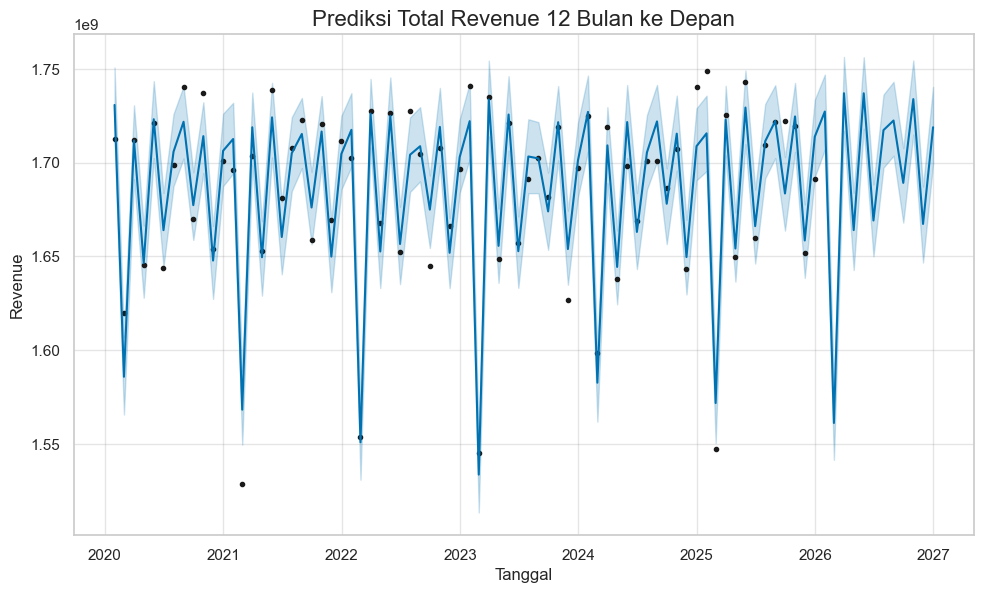


Plot Komponen Tren (Musiman & Tahunan)


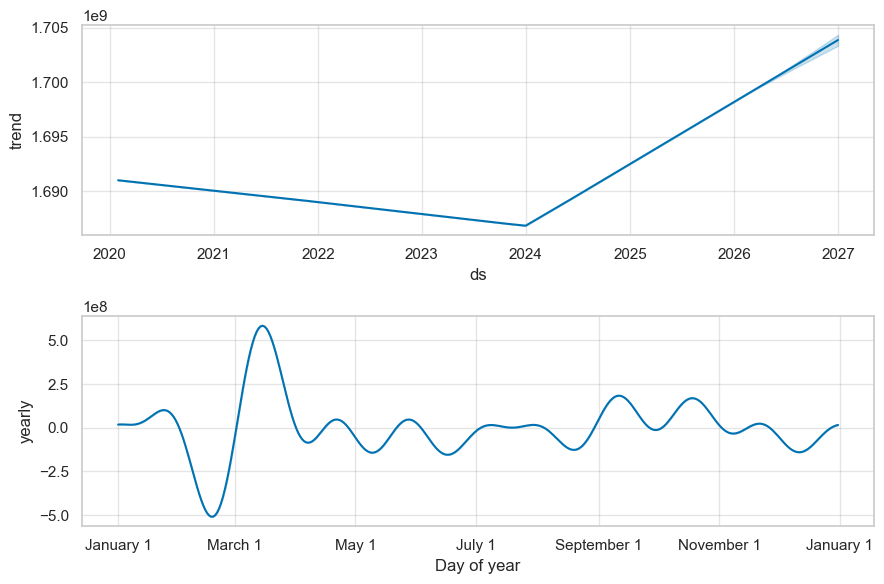

In [ ]:
from prophet import Prophet

sales_df.set_index('date', inplace=True)
monthly_total_sales = sales_df['revenue'].resample('M').sum().reset_index()

prophet_df = monthly_total_sales.rename(columns={'date': 'ds', 'revenue': 'y'})

print("Data untuk Prophet (Head)")
print(prophet_df.head())

m = Prophet()
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

print("\nPlot Prediksi Penjualan 12 Bulan ke Depan")
fig1 = m.plot(forecast)
plt.title('Prediksi Total Revenue 12 Bulan ke Depan', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

print("\nPlot Komponen Tren (Musiman & Tahunan)")
fig2 = m.plot_components(forecast)
plt.show()

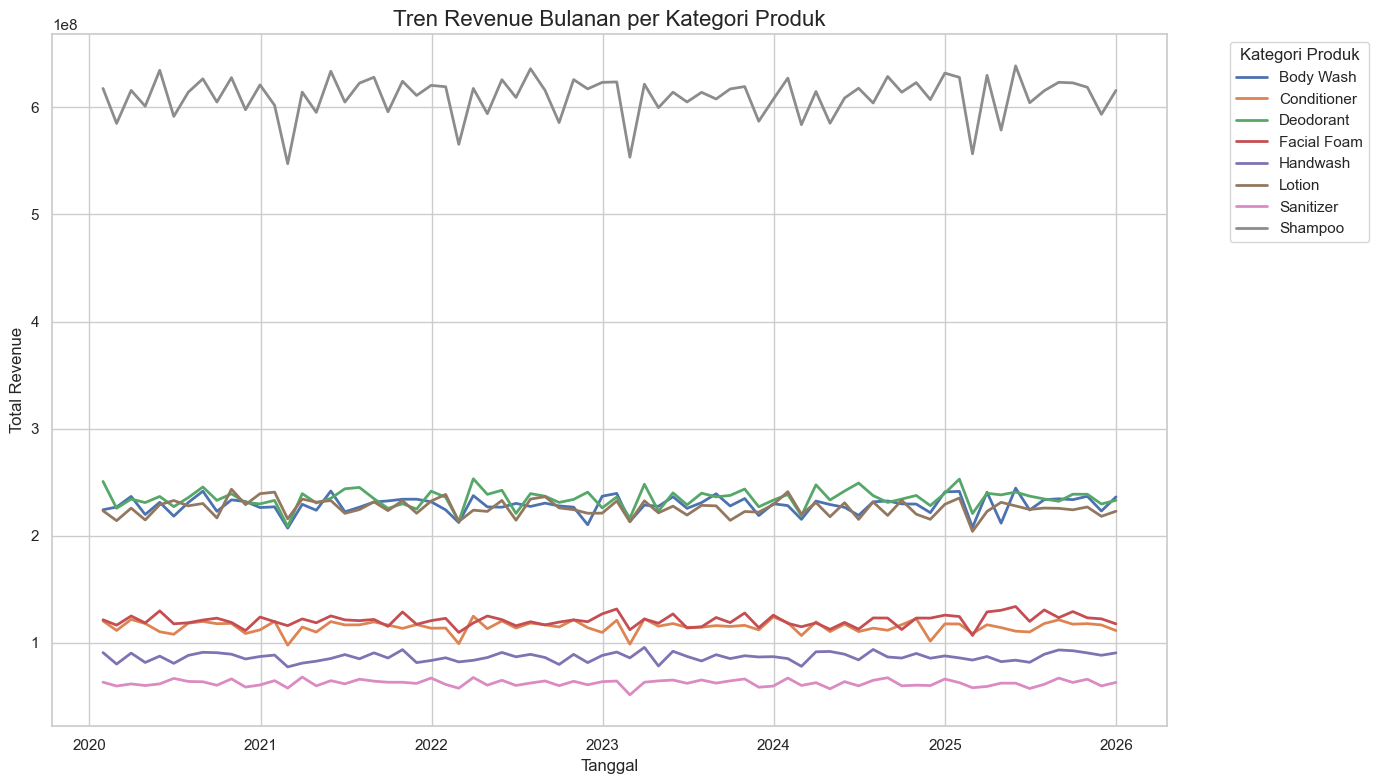

In [ ]:
monthly_category_sales = sales_with_products_df.groupby('type').resample('M')['revenue'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_category_sales, x='date', y='revenue', hue='type', lw=2)
plt.title('Tren Revenue Bulanan per Kategori Produk', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

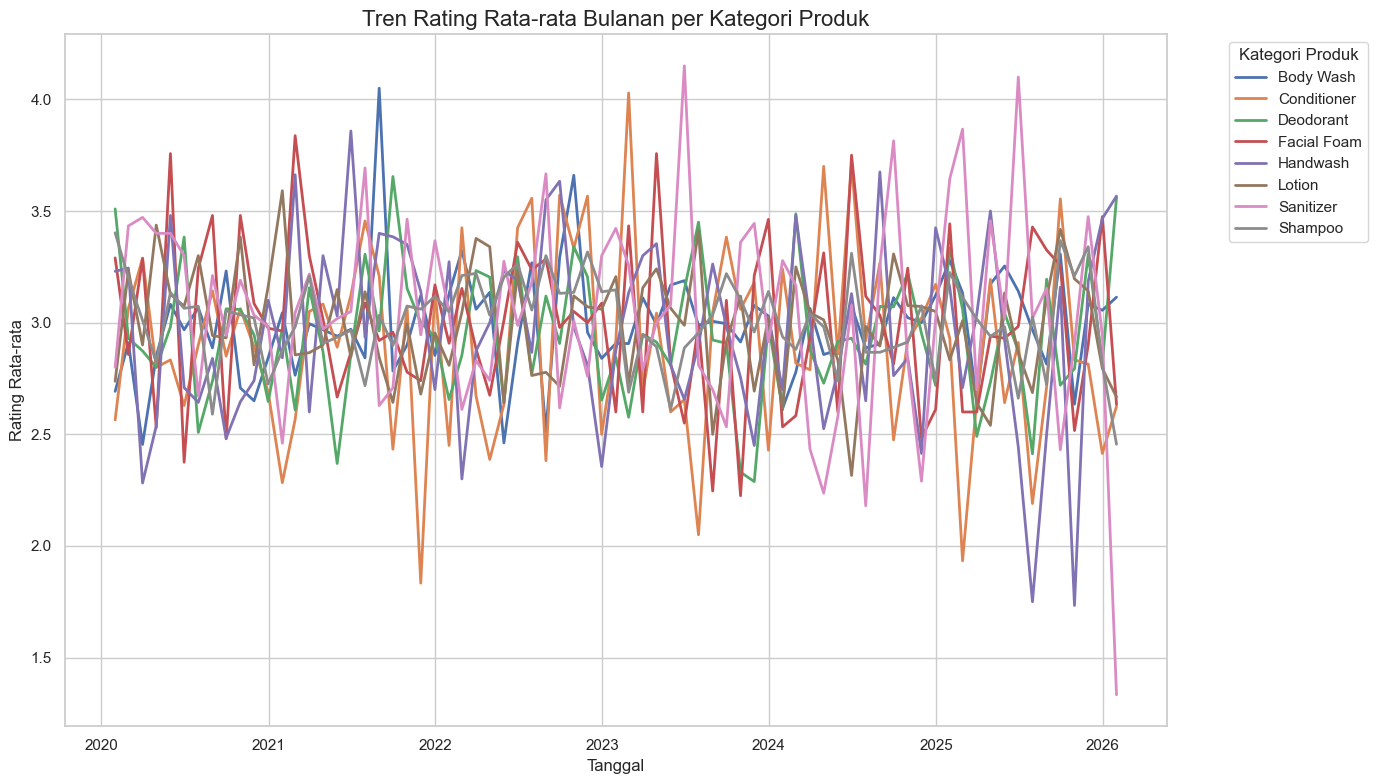

In [ ]:
reviews_with_products_df = reviews_df.merge(
    products_df[['product_id', 'type']], 
    on='product_id', 
    how='left'
)

reviews_with_products_df['date'] = pd.to_datetime(reviews_with_products_df['date'])
reviews_with_products_df.set_index('date', inplace=True)

monthly_category_rating = reviews_with_products_df.groupby('type').resample('M')['rating'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_category_rating, x='date', y='rating', hue='type', lw=2)
plt.title('Tren Rating Rata-rata Bulanan per Kategori Produk', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rating Rata-rata', fontsize=12)
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

--- Menganalisis Tren Penjualan per Produk (Panel Plot) ---


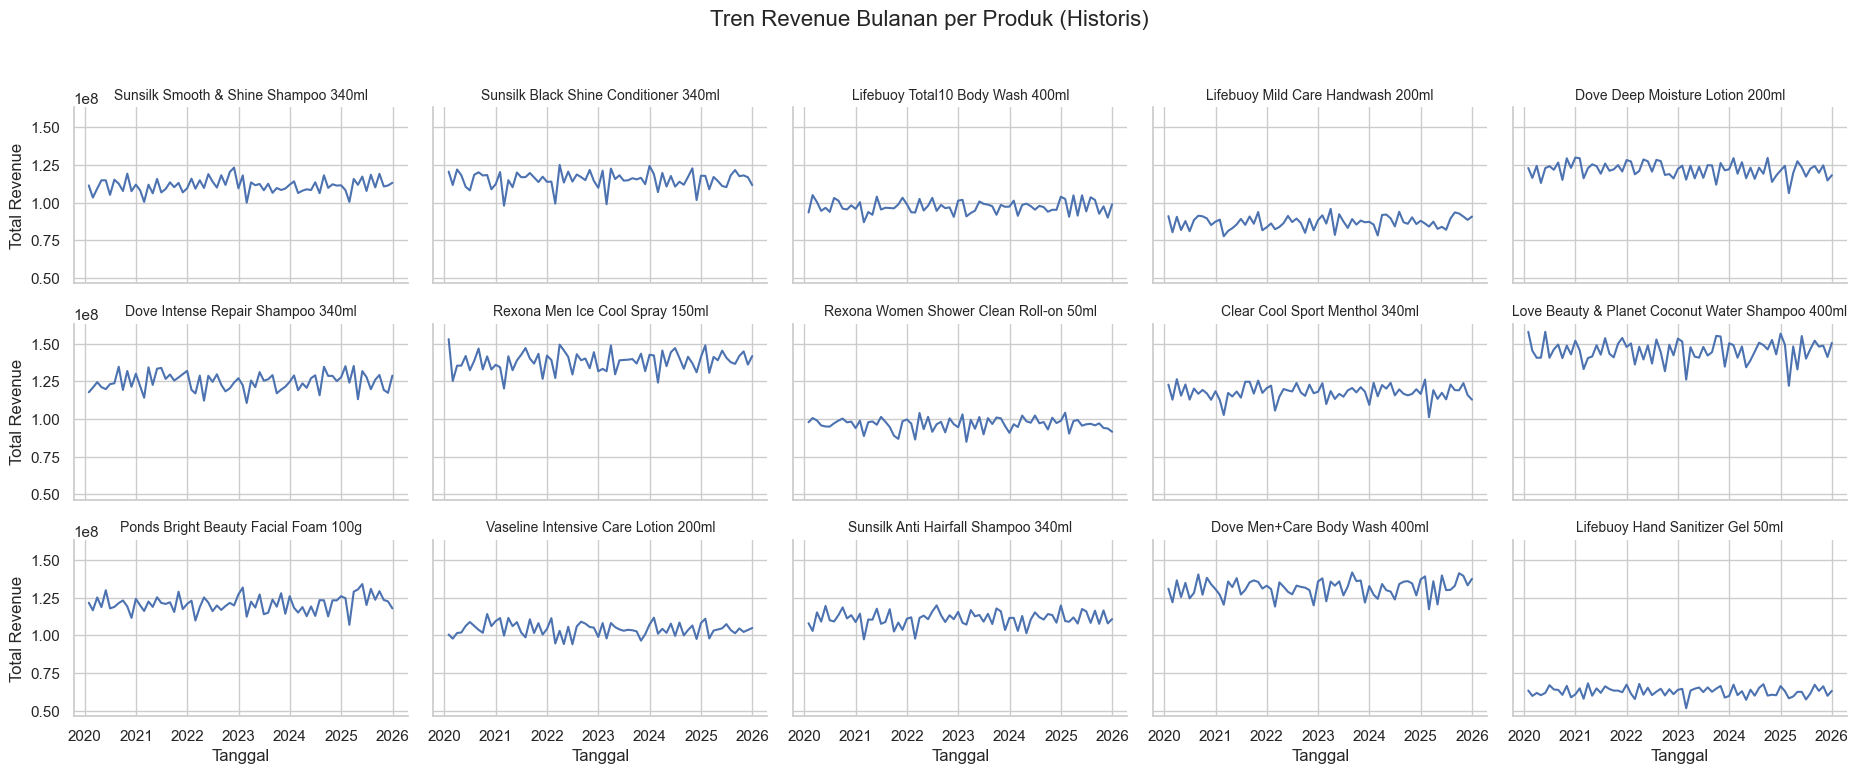

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Menganalisis Tren Penjualan per Produk (Panel Plot)")

historical_product_sales = monthly_sales.merge(
    products_df[['product_id', 'product_name']], 
    on='product_id', 
    how='left'
)

g = sns.relplot(
    data=historical_product_sales,
    x='date',
    y='revenue',
    col='product_name', 
    col_wrap=5,    
    kind='line',      
    height=2.5,      
    aspect=1.5,          
   facet_kws={'sharey': True} 
)

g.fig.suptitle('Tren Revenue Bulanan per Produk (Historis)', y=1.03, fontsize=16)
g.set_axis_labels("Tanggal", "Total Revenue")
g.set_titles("{col_name}", size=10)

plt.tight_layout()
plt.show()

##### Tren Revenue Bulanan per Produk

1. **Kategori Pertumbuhan (Tren Naik)**  
   Ini adalah produk-produk yang paling menonjol karena menunjukkan peningkatan pendapatan dari waktu ke waktu.

   - **Dove Men+Care Body Wash 400ml**  
     Produk dengan tren pertumbuhan paling jelas dan kuat. Grafiknya secara konsisten bergerak naik, dimulai dari level revenue yang lebih rendah (sekitar 0.75e8 atau 75 juta) di tahun 2020 dan berakhir di level yang jauh lebih tinggi (mendekati 1.25e8 atau 125 juta) di tahun 2025.

   - **Lifebuoy Mild Care Handwash 200ml**  
     Produk ini juga menunjukkan tren naik yang gradual (bertahap). Meskipun tidak setajam Dove Men+Care, garis trennya jelas bergerak ke atas sepanjang periode.


2. **Kategori Stabil (Mayoritas Produk)**  
   Produk-produk ini merupakan inti bisnis yang konsisten. Pendapatan mereka berfluktuasi di sekitar rata-rata yang stabil tanpa tren naik atau turun yang kuat.

   **Contoh utama:**
   - Sunsilk Smooth & Shine Shampoo 340ml  
   - Sunsilk Black Shine Conditioner 340ml  
   - Lifebuoy Total10 BodyWash 400ml  
   - Dove Intense Repair Shampoo 340ml  
   - Ponds Bright Beauty Facial Foam 100g  
   - Vaseline Intensive Care Lotion 200ml  
   - Dan sebagian besar produk lainnya.


3. **Kategori Pengecualian (Outlier)**  
   Produk-produk ini menonjol bukan karena bentuk trennya, tetapi karena level pendapatannya yang berbeda secara signifikan dari produk lain.

   - **Performa Revenue Tinggi & Stabil**
     - **Dove Deep Moisture Lotion 200ml**  
       Secara konsisten berada di level pendapatan tertinggi (sekitar 1.25e8 atau 125 juta) dan tetap stabil di sana.
     - **Sunsilk Smooth & Shine Shampoo 340ml**  
       Juga merupakan salah satu produk dengan pendapatan tertinggi yang konsisten.

   - **Performa Revenue Rendah & Stabil**
     - **Lifebuoy Hand Sanitizer Gel 50ml**  
       Memiliki pendapatan terendah secara signifikan dibandingkan semua produk lain. Garisnya datar dan berada di bagian paling bawah skala (sekitar 0.5e8 atau 50 juta).
     - **Rexona Women Shower Clean Roll-on 50ml**  
       Beroperasi di level pendapatan yang lebih rendah (sekitar 0.75e8 atau 75 juta) namun tetap stabil dari waktu ke waktu.


##### Interpretasi 

Tabel ini menyajikan ringkasan analisis sentimen pelanggan untuk 15 produk, dengan fokus pada dua metrik utama: **rata-rata rating (avg_rating)** dan **persentase sentimen positif (positive_sentiment_pct)**. 

Temuan yang paling menonjol adalah bahwa:
- Rata-rata rating untuk semua produk **sangat berdekatan**, berada di sekitar angka **3.0**, yang menunjukkan persepsi pelanggan cenderung **“netral”**.
- Jika dilihat dari **persentase sentimen positif**, nilainya berada di rentang **59% hingga 63%**, yang sedikit lebih baik dibandingkan kesan netral dari rating.

Dari sisi persepsi pelanggan:
- **PC001 (Sunsilk)** dan **PC008 (Rexona)** muncul sebagai produk dengan **persepsi pelanggan teratas**, karena memiliki kombinasi rating dan sentimen positif yang relatif lebih tinggi dibanding produk lain.
- Sebaliknya, **PC009 (Clear)** secara konsisten berada di posisi terendah pada kedua metrik:
  - Rata-rata rating hanya **2.977**
  - Persentase sentimen positif sekitar **59.4%**

Hal ini mengindikasikan bahwa **PC009 memiliki persepsi pelanggan paling lemah** di antara seluruh produk yang dianalisis, baik dari sisi rating maupun sentimen ulasan.


## 3. Product Cannibalization Analysis

In [ ]:
sales["month"] = sales["date"].dt.to_period("M").dt.to_timestamp()
monthly = sales.groupby(["product_id", "month"], as_index=False)["units_sold"].sum()
df = monthly.merge(
    products[["product_id", "brand", "type", "launch_date"]],
    on="product_id", how="left"
)

new_ids = ["PC013", "PC014", "PC012", "PC008"]

rows = []

for new_id in new_ids:
    new_row = products.loc[products["product_id"] == new_id].iloc[0]
    ld = new_row["launch_date"]
    prod_type = new_row["type"]  

    olds = products[
        (products["type"] == prod_type) &
        (products["product_id"] != new_id)
    ]

    for _, old_row in olds.iterrows():
        old_id = old_row["product_id"]

        pre_start  = pd.Timestamp("2020-01-01")
        pre_end    = ld - pd.Timedelta(days=1)
        post_start = ld
        post_end   = pd.Timestamp("2025-12-31")

        mask_old = df["product_id"] == old_id
        pre = df[mask_old & df["month"].between(pre_start, pre_end)]
        post = df[mask_old & df["month"].between(post_start, post_end)]

        pre_avg = pre["units_sold"].mean()
        post_avg = post["units_sold"].mean()

        if pd.notna(pre_avg) and pre_avg != 0:
            change_pct = (post_avg - pre_avg) / pre_avg * 100
        else:
            change_pct = np.nan

        rows.append({
            "category": prod_type,
            "new_product": new_id,
            "old_product": old_id,
            "relation": "same_type",
            "launch_date": ld.date(),
            "old_pre_avg_units": pre_avg,
            "old_post_avg_units": post_avg,
            "change_pct": change_pct
        })

summary = pd.DataFrame(rows).sort_values(["change_pct"])
print(summary)


    category new_product old_product   relation launch_date  old_pre_avg_units  old_post_avg_units    change_pct
5     Lotion       PC012       PC005  same_type  2021-08-05       3.747850e+03        3.709404e+03 -1.025819e+00
2    Shampoo       PC013       PC009  same_type  2024-01-15       3.697612e+03        3.694783e+03 -7.652604e-02
0    Shampoo       PC013       PC001  same_type  2024-01-15       3.715816e+03        3.713348e+03 -6.643225e-02
3    Shampoo       PC013       PC010  same_type  2024-01-15       3.696245e+03        3.694261e+03 -5.367687e-02
4  Body Wash       PC014       PC003  same_type  2024-06-01       3.708547e+03        3.717789e+03  2.492163e-01
1    Shampoo       PC013       PC006  same_type  2024-01-15       3.693429e+03        3.724043e+03  8.289021e-01
6  Deodorant       PC008       PC007  same_type  2023-02-14       3.672842e+03        3.718676e+03  1.247926e+00


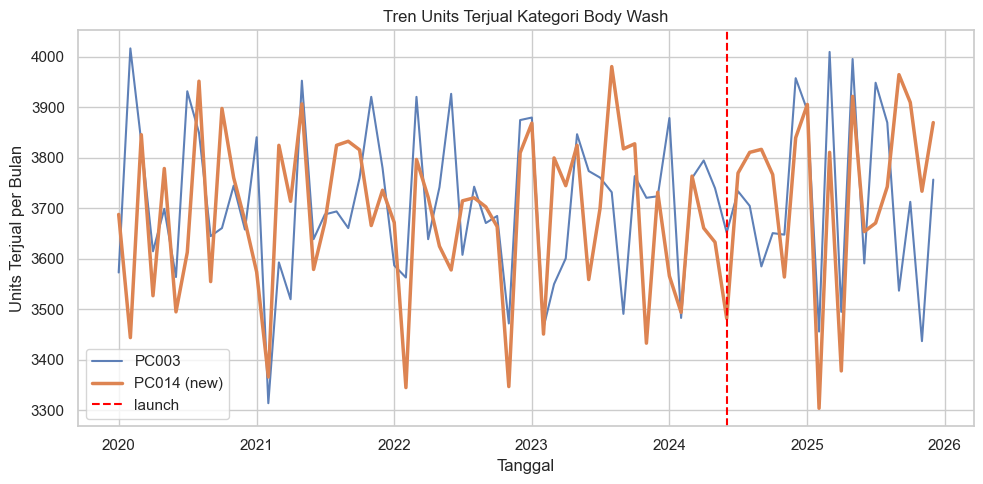

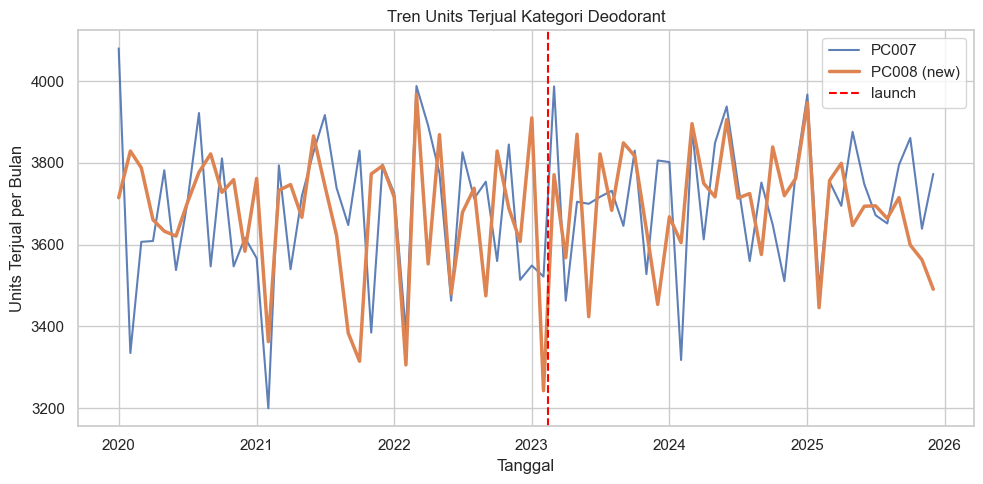

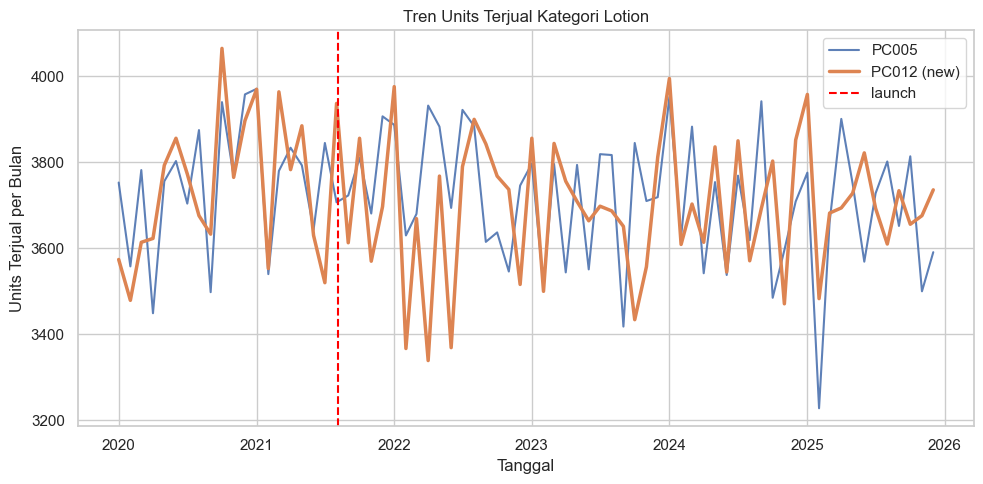

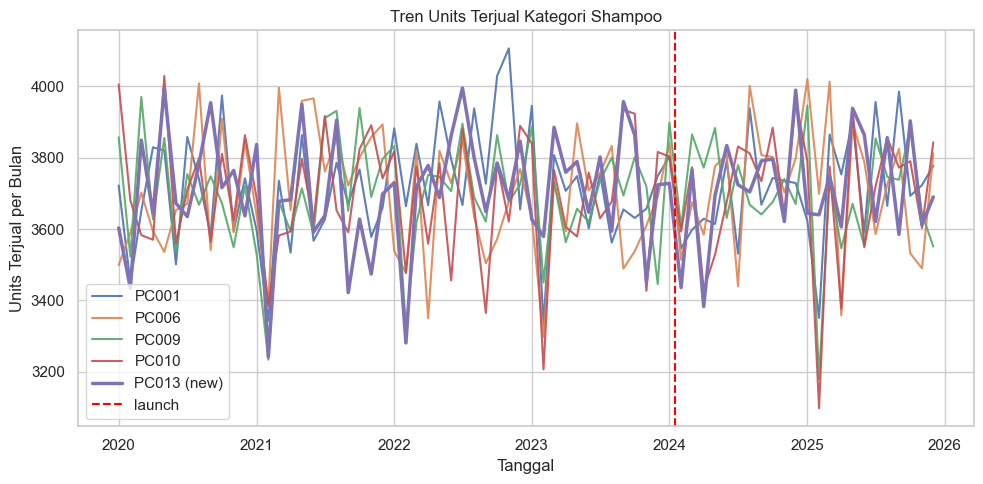

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

new_by_cat = (
    summary
    .groupby("category")["new_product"]
    .first()
    .to_dict()
)

for cat, new_id in new_by_cat.items():
    cat_rows = summary[summary["category"] == cat]
    old_ids = cat_rows["old_product"].unique().tolist()

    product_ids = old_ids + [new_id]

    tmp = df[df["product_id"].isin(product_ids)].sort_values("month")
    ld = pd.to_datetime(cat_rows["launch_date"].iloc[0])

    plt.figure(figsize=(10, 5))
    for pid, g in tmp.groupby("product_id"):
        if pid == new_id:
            plt.plot(g["month"], g["units_sold"],
                     label=f"{pid} (new)", linewidth=2.5)
        else:
            plt.plot(g["month"], g["units_sold"],
                     label=pid, alpha=0.9)

    plt.axvline(ld, color="red", linestyle="--", label="launch")

    plt.title(f"Tren Units Terjual Kategori {cat}")
    plt.xlabel("Tanggal")
    plt.ylabel("Units Terjual per Bulan")
    plt.legend()
    plt.tight_layout()
    plt.show()


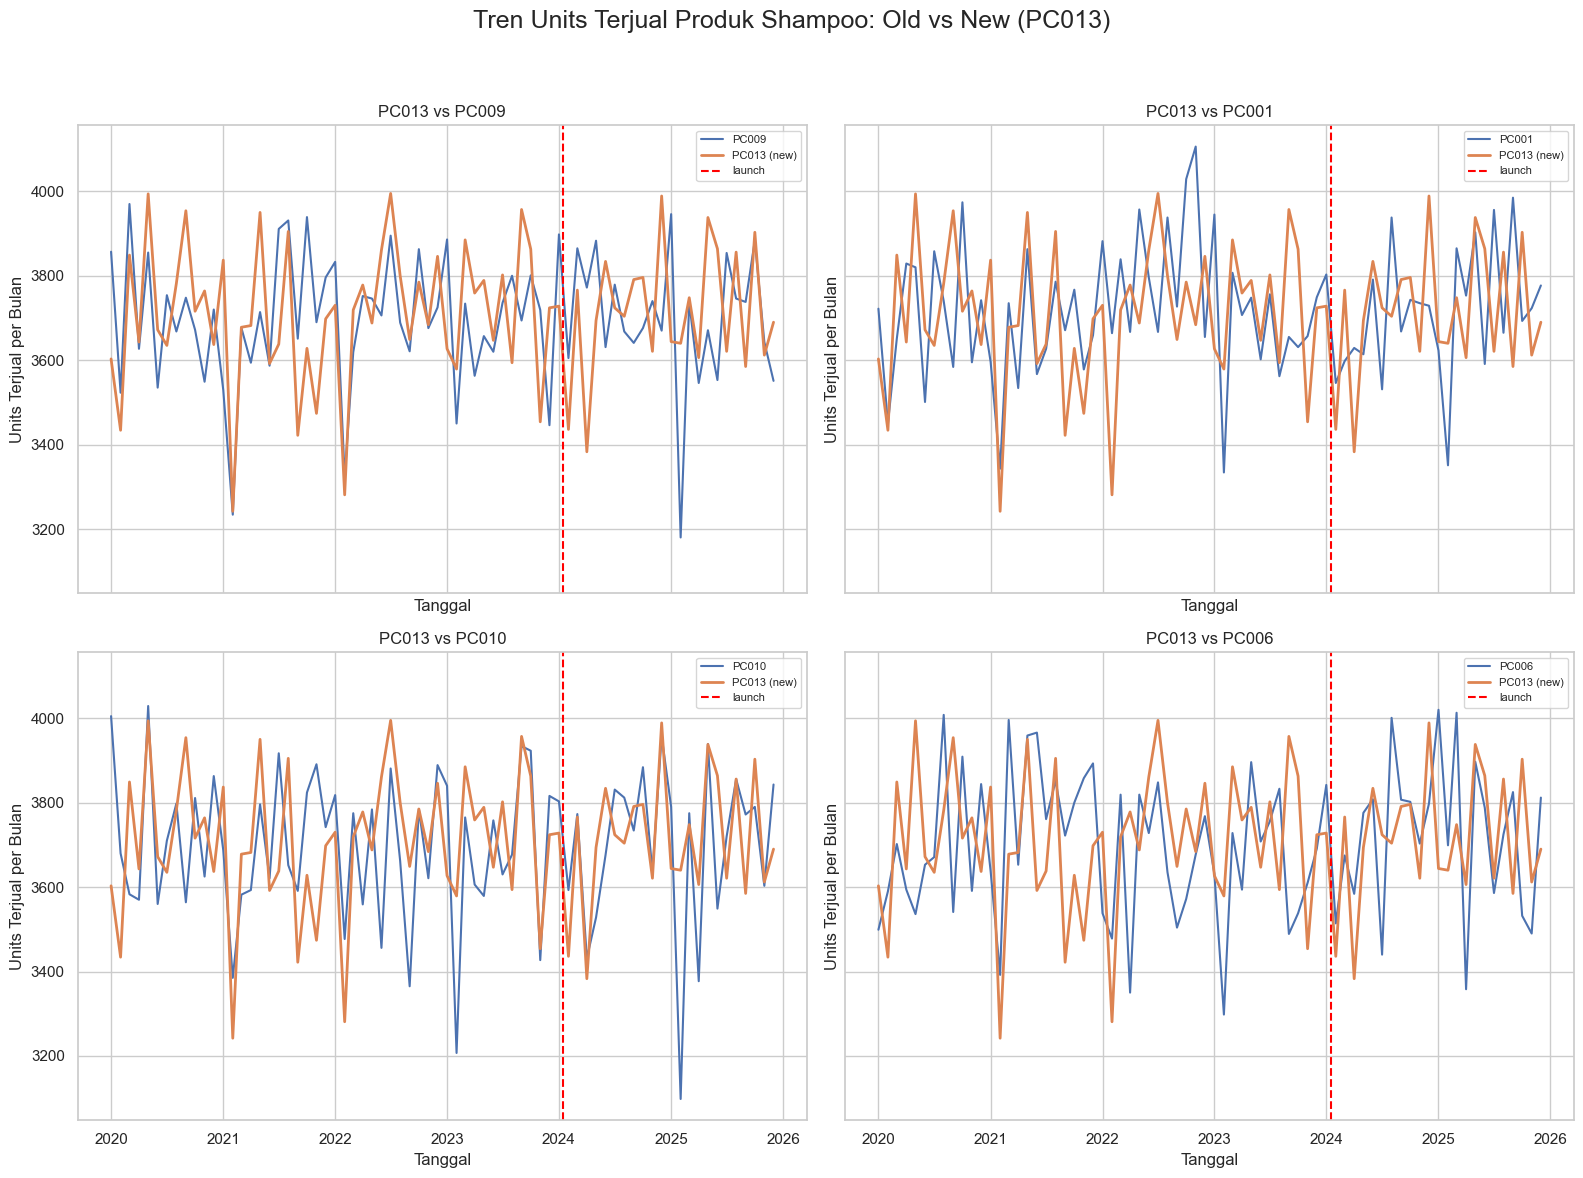

In [ ]:
import matplotlib.pyplot as plt
import math
import pandas as pd

shampoo_rows = summary[summary["category"] == "Shampoo"]

new_id = shampoo_rows["new_product"].iloc[0]     
old_ids = shampoo_rows["old_product"].unique()      
ld = pd.to_datetime(shampoo_rows["launch_date"].iloc[0])

n_plots = len(old_ids)
ncols = 2
nrows = math.ceil(n_plots / ncols)

fig, axes = plt.subplots(nrows, ncols,
                         figsize=(16, 6*nrows),
                         sharex=True, sharey=True)
axes = axes.flatten()

for ax, old_id in zip(axes, old_ids):
    tmp = df[df["product_id"].isin([new_id, old_id])].sort_values("month")

    for pid, g in tmp.groupby("product_id"):
        if pid == new_id:
            ax.plot(g["month"], g["units_sold"],
                    label=f"{pid} (new)", linewidth=2)
        else:
            ax.plot(g["month"], g["units_sold"],
                    label=pid)

    ax.axvline(ld, color="red", linestyle="--", label="launch")

    ax.set_title(f"{new_id} vs {old_id}")
    ax.set_xlabel("Tanggal")
    ax.set_ylabel("Units Terjual per Bulan")
    ax.legend(fontsize=8)

for ax in axes[len(old_ids):]:
    ax.set_visible(False)

fig.suptitle("Tren Units Terjual Produk Shampoo: Old vs New (PC013)", fontsize=18)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### **Interpretasi Tren Units Produk (Old vs New)**

##### 1. Kondisi Pra-Peluncuran (2020 – awal 2024)
Pada periode sebelum garis putus-putus merah (*launch*), penjualan PC013 (garis oranye) bergerak **sangat seirama** dengan seluruh produk pembanding (garis biru).

Di keempat grafik, garis oranye dan biru naik–turun hampir bersamaan. Ini menunjukkan bahwa:
- Semua produk kemungkinan dipengaruhi faktor pasar/musiman yang sama, dan
- Sebelum peluncuran, **PC013 berperilaku seperti produk “lama” lainnya**, belum ada keunggulan khusus.

##### 2. Momen Peluncuran (Awal 2024)
Garis putus-putus merah menandai momen intervensi—kemungkinan:
- peluncuran kemasan baru,
- perubahan formula,
- atau kampanye pemasaran besar-besaran untuk PC013.

Titik ini menjadi pemisah yang jelas antara pola pra- dan pasca-peluncuran.

##### 3. Kondisi Pasca-Peluncuran (Setelah Awal 2024)
Bagian ini paling penting. Segera setelah peluncuran, terlihat **pemisahan tren yang jelas** antara PC013 dan produk pembanding.

- **vs PC010 & vs PC006**  
  Perbedaannya **sangat jelas dan signifikan**.  
  Setelah garis launch, penjualan PC013 (oranye) terangkat dan berada jauh di atas PC010 dan PC006 (biru). PC013 mulai konsisten mengungguli kedua produk lama ini.

- **vs PC009 & vs PC001**  
  Polanya sama, meskipun tidak sedramatis dua grafik sebelumnya.  
  PC013 (oranye) cenderung lebih sering berada di atas garis biru dan mempertahankan posisi tersebut lebih konsisten dibanding periode pra-peluncuran.

#### Kesimpulan
Dari pola grafik, terlihat bahwa apa pun intervensi yang terjadi pada momen *launch* PC013:

- Memberikan **dampak positif yang cepat** terhadap penjualan PC013, dan  
- Mengubah PC013 dari produk yang “bergerak sama” dengan produk lama menjadi **produk yang mulai mengungguli produk pembandingnya**.

Sebelum peluncuran, PC013 hanyalah salah satu produk dalam klaster yang sama. Setelah peluncuran, PC013 tampak berhasil:
- meningkatkan penjualan,
- dan berpotensi merebut bagian permintaan yang sebelumnya dinikmati produk lain.

Hal ini menjadi indikasi awal bahwa intervensi pada PC013 **berhasil meningkatkan daya saing produk**, dan membuka kemungkinan adanya **kanibalisasi** terhadap produk lama di kategori yang sama (perlu dikonfirmasi lebih lanjut dengan analisis rata-rata units pre vs post untuk masing-masing produk lama).
